# Introduction

Jupyter notebook for the simplest model scratch. By convention, all exogenous variables are presented with a overline line (*e.g.* $\overline a$) and the parameters are represented by greek letters (*e.g.* $\alpha$). The code in this document is executable and is strongly recommend to do the follow to ensure that the output is corrected and updated:

Run time > Restart and run all...

## Loading libraries

In [1]:
#!pip install pysolve3
%config InlineBackend.figure_format = 'retina'

from SFC_Setup import *
df = SolveSFC(model(), time=1000)

/home/gpetrini/.local/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
t_check = 1
print('Evaluating at time = {}'.format(t_check))

test = model()
SolveSFC(test, time=t_check, table = False)
evaldf = pd.DataFrame({
    'Cw' : test.evaluate('Cw'),
    'Ck' : test.evaluate('Ck'),
    'I_h' : test.evaluate('I_h'),
    'I_f' : test.evaluate('I_f'),
    'K_f(-1)' : test.evaluate('K_f(-1)'),
    'Yk' : test.evaluate('Yk'),
    'Y' : test.evaluate('Y'),
    'gk' : test.evaluate('gk'),
    'u' : test.evaluate('u'),
    "Residual" : test.evaluate('d(L) + d(MO) - d(M)')
}, index = ['Sum'])
evaldf = evaldf.transpose()
evaldf.round(5)

Evaluating at time = 1


Sum
Cw         118.41528
Ck         238.93301
I_h        102.40000
I_f         13.91363
K_f(-1)   1013.91363
Yk         833.33333
Y          473.66112
gk           0.01391
u            0.56839
Residual     0.00000

# Solving

<ipython-input-3-96a39f965d59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIME"] = [i+1 for i in range(len(df.index))]
<ipython-input-3-96a39f965d59>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ih/Y"] = df["I_h"]/df["Y"]
<ipython-input-3-96a39f965d59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

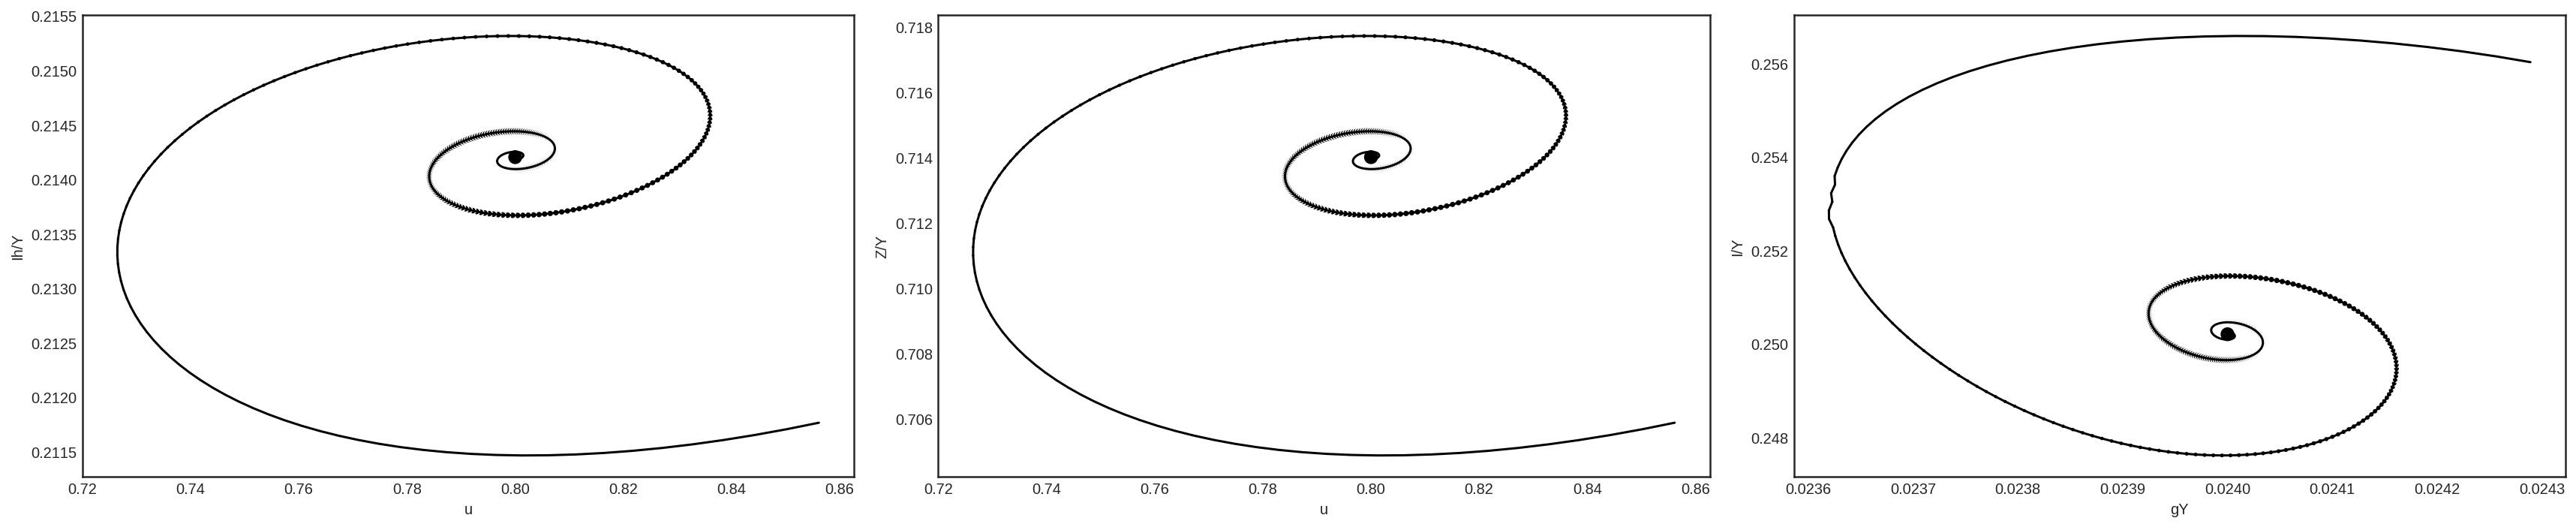

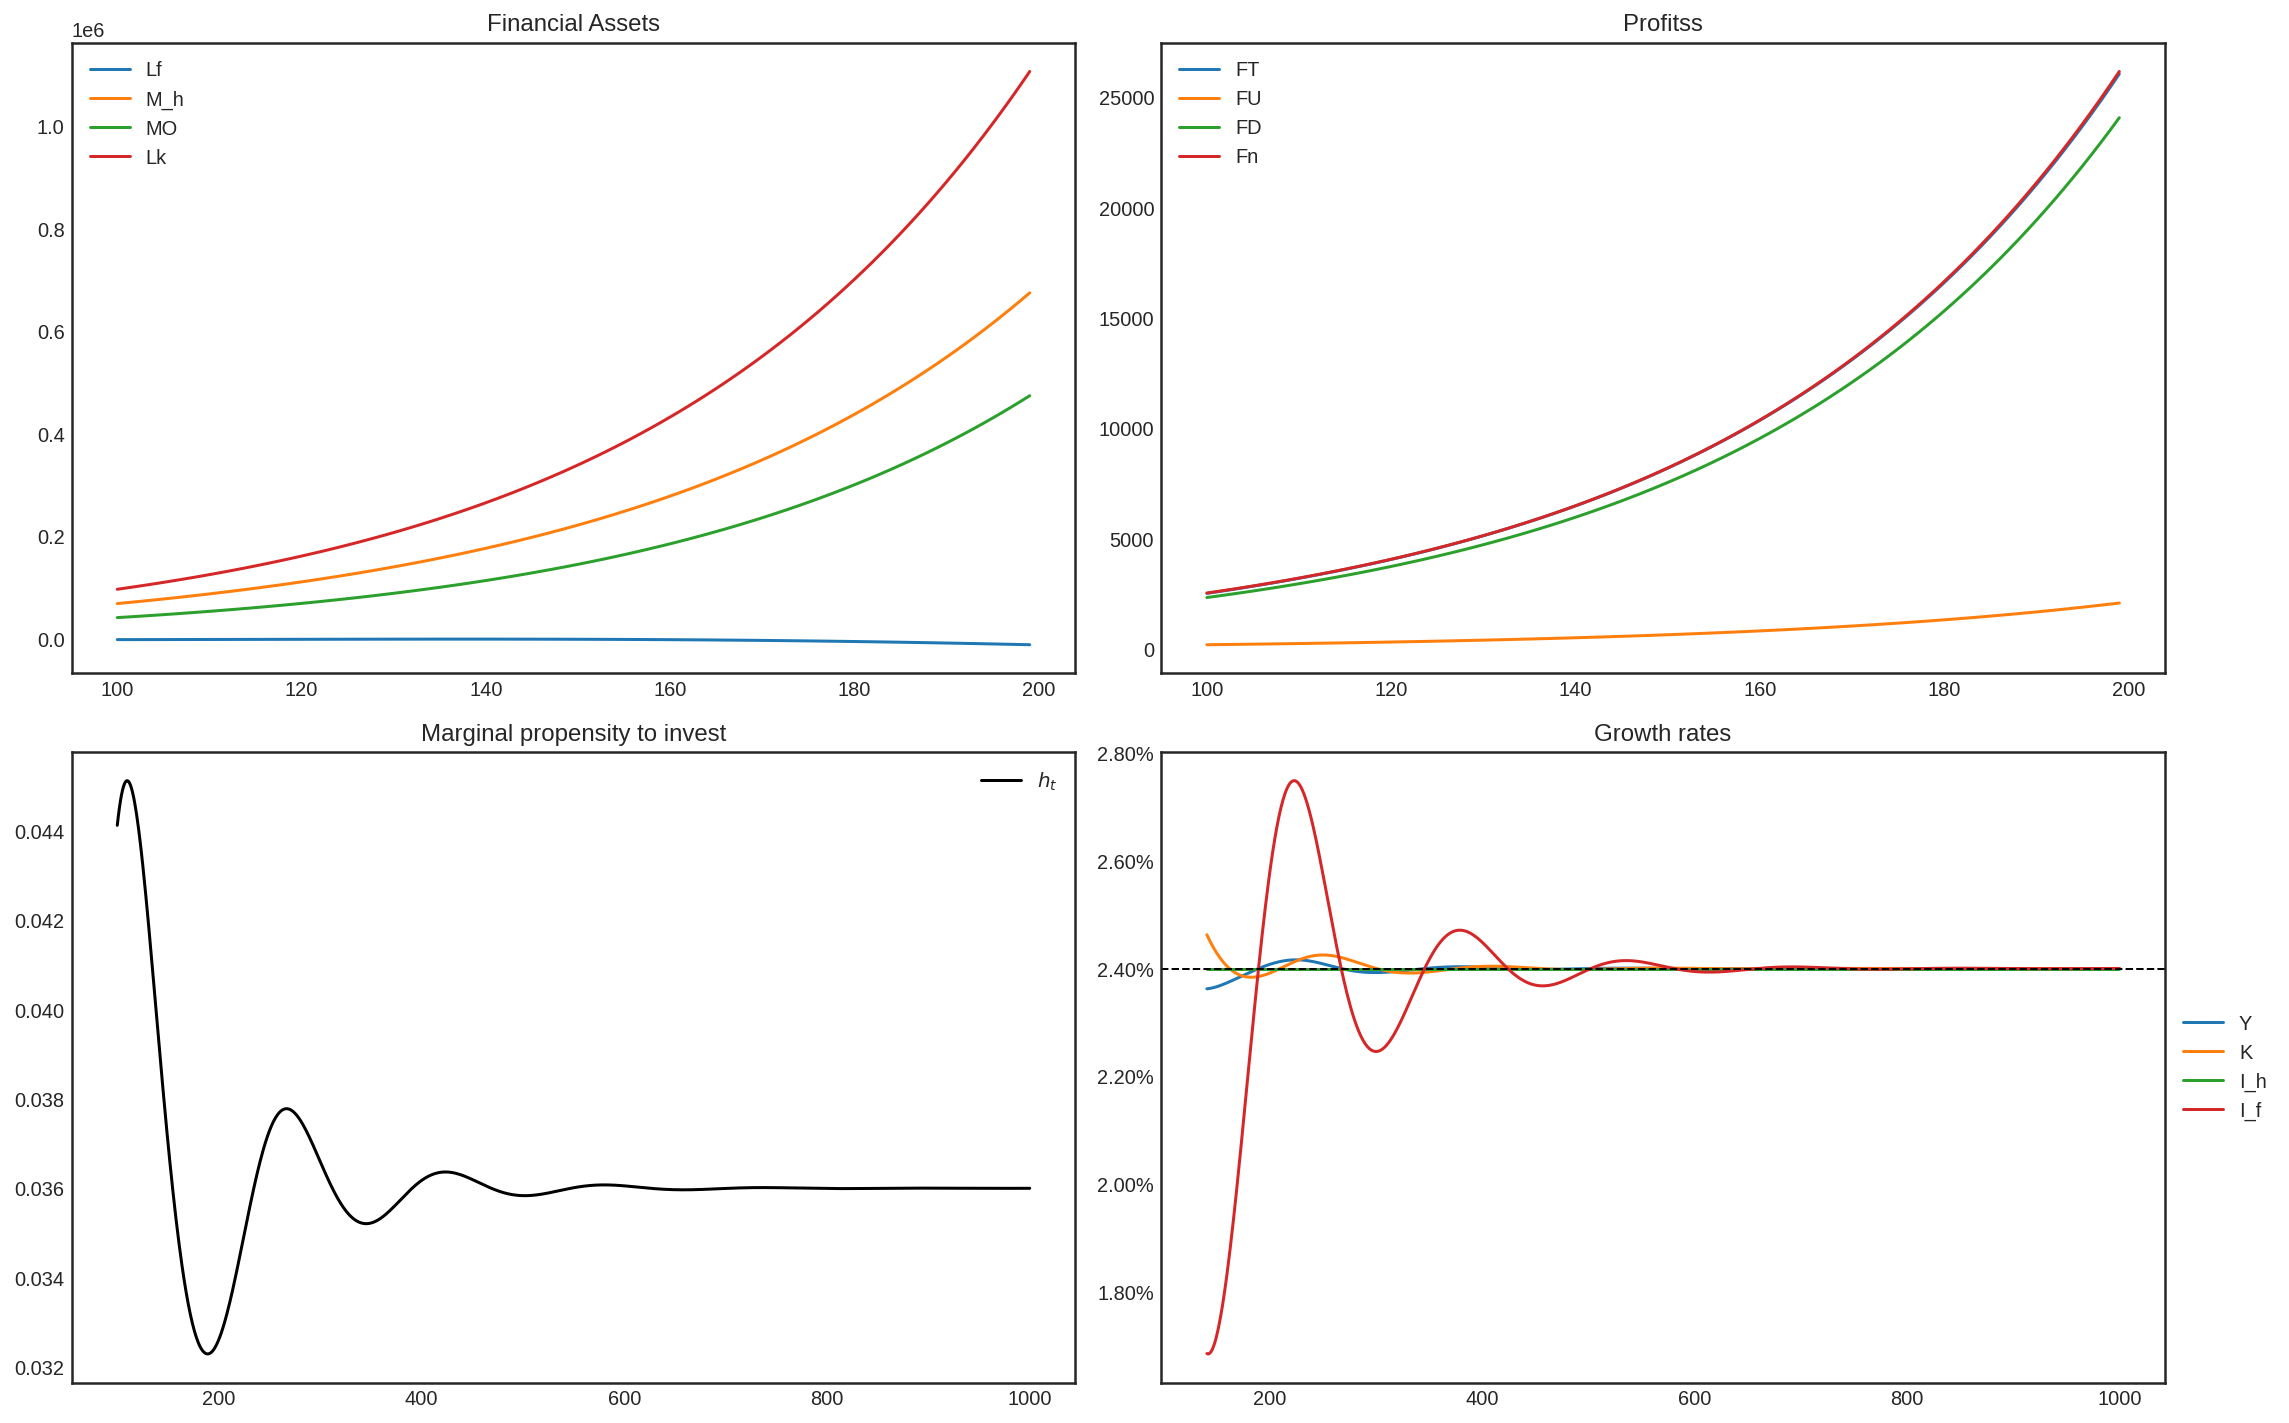

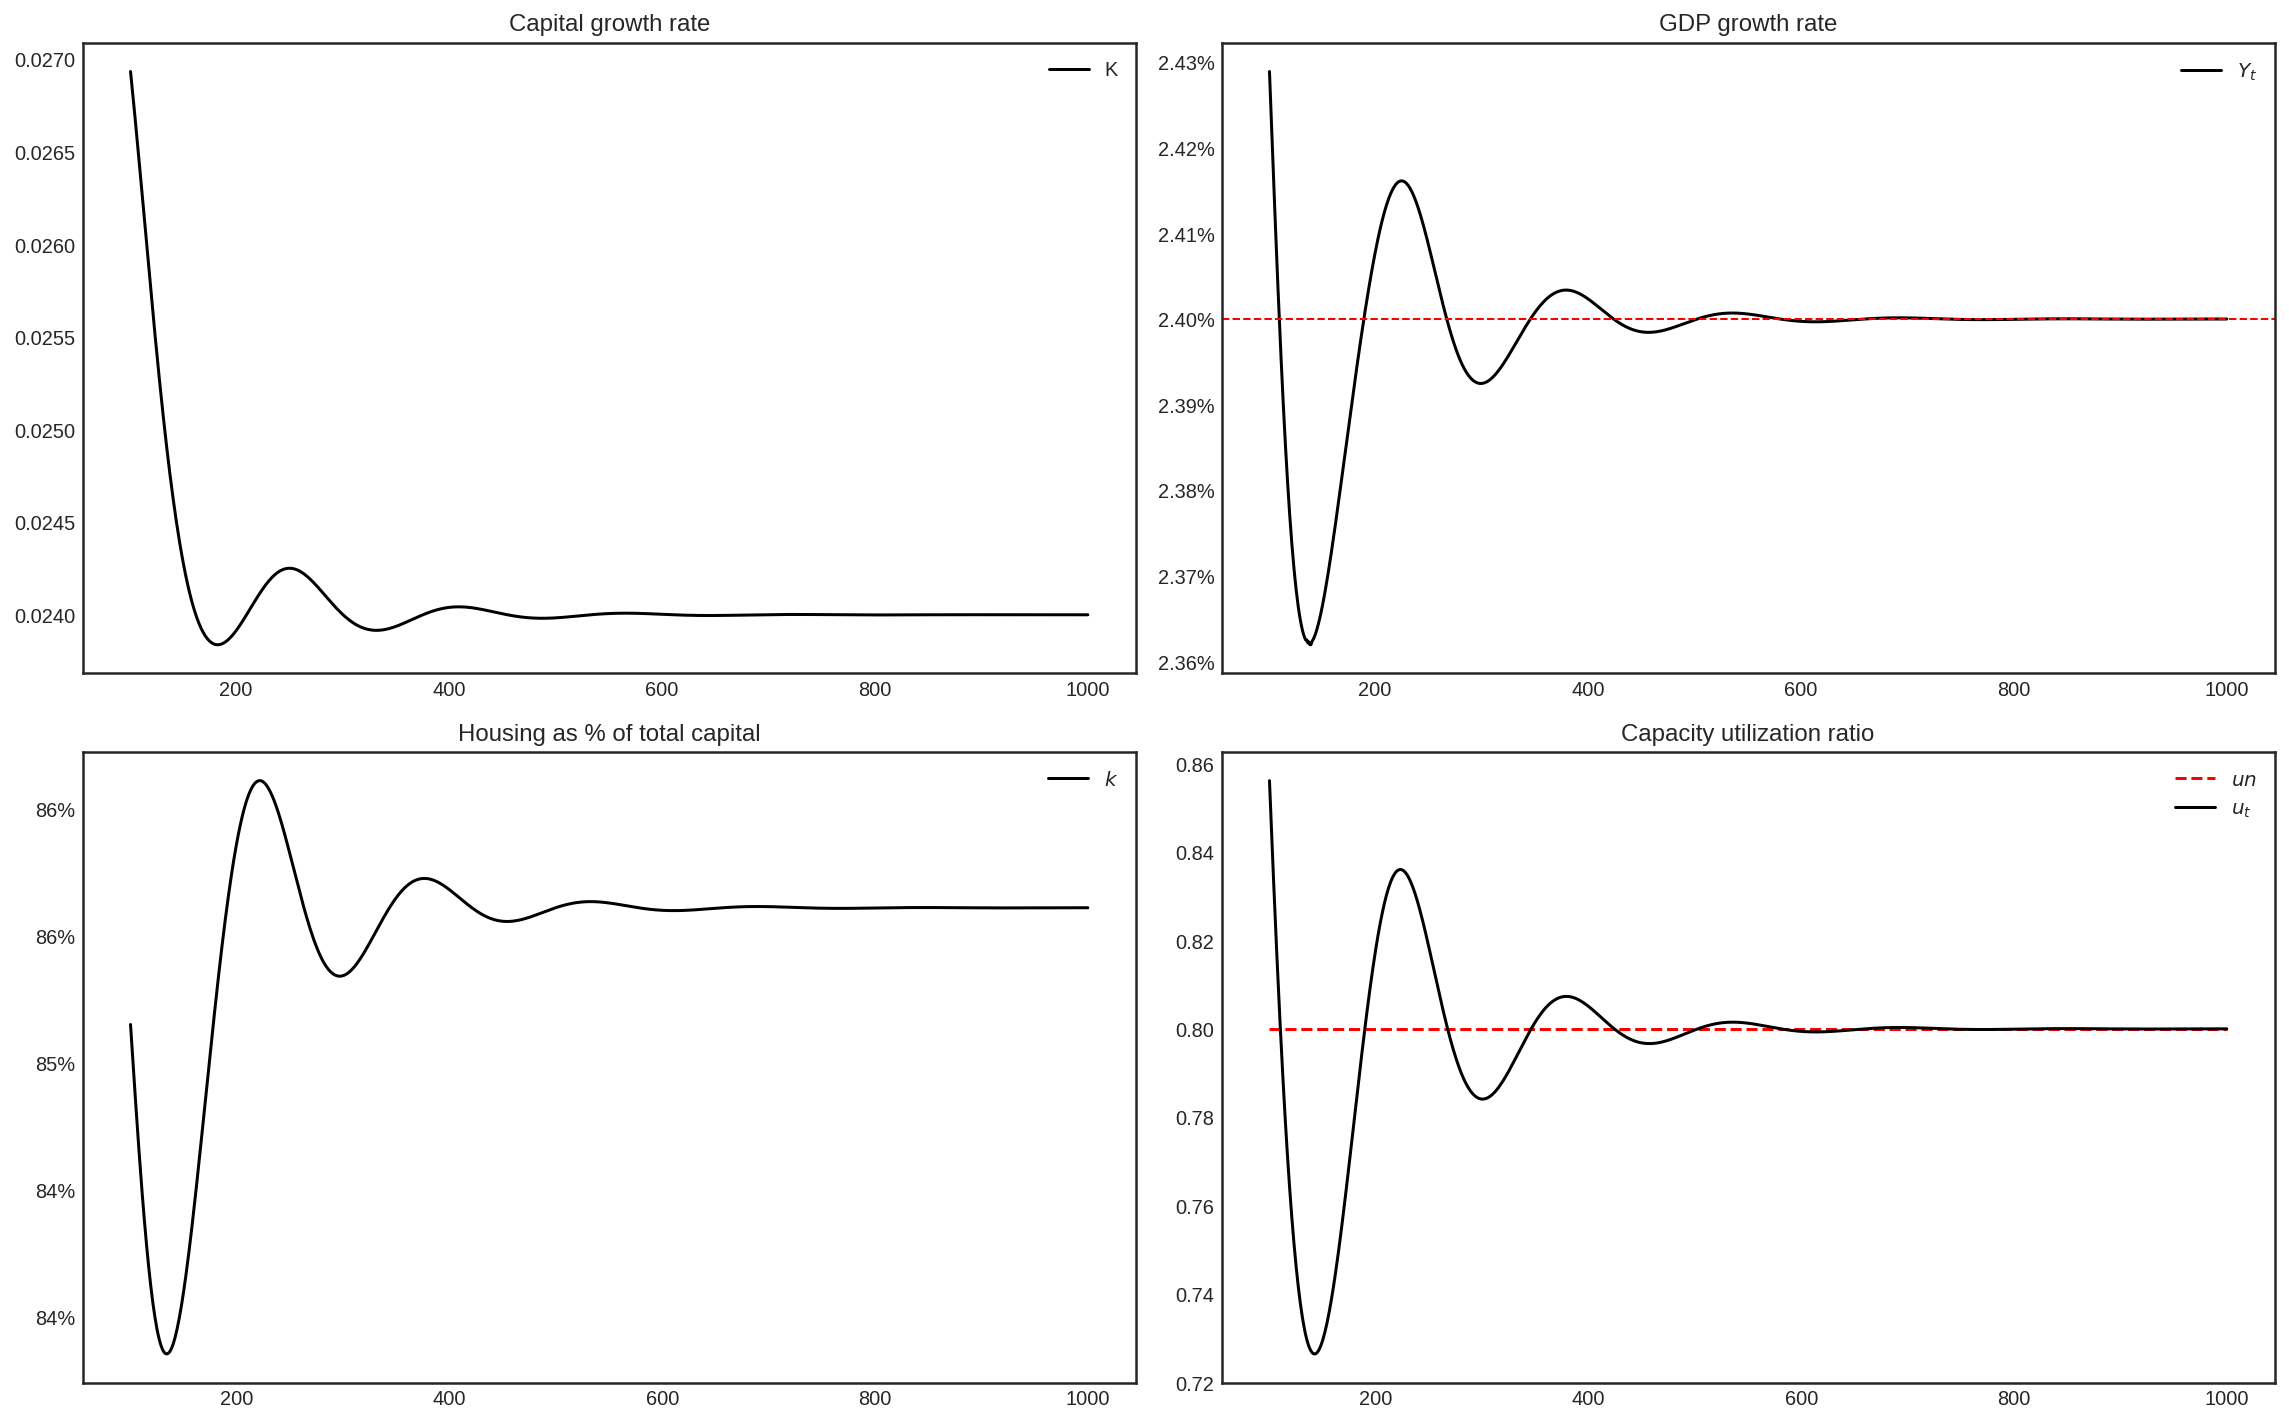

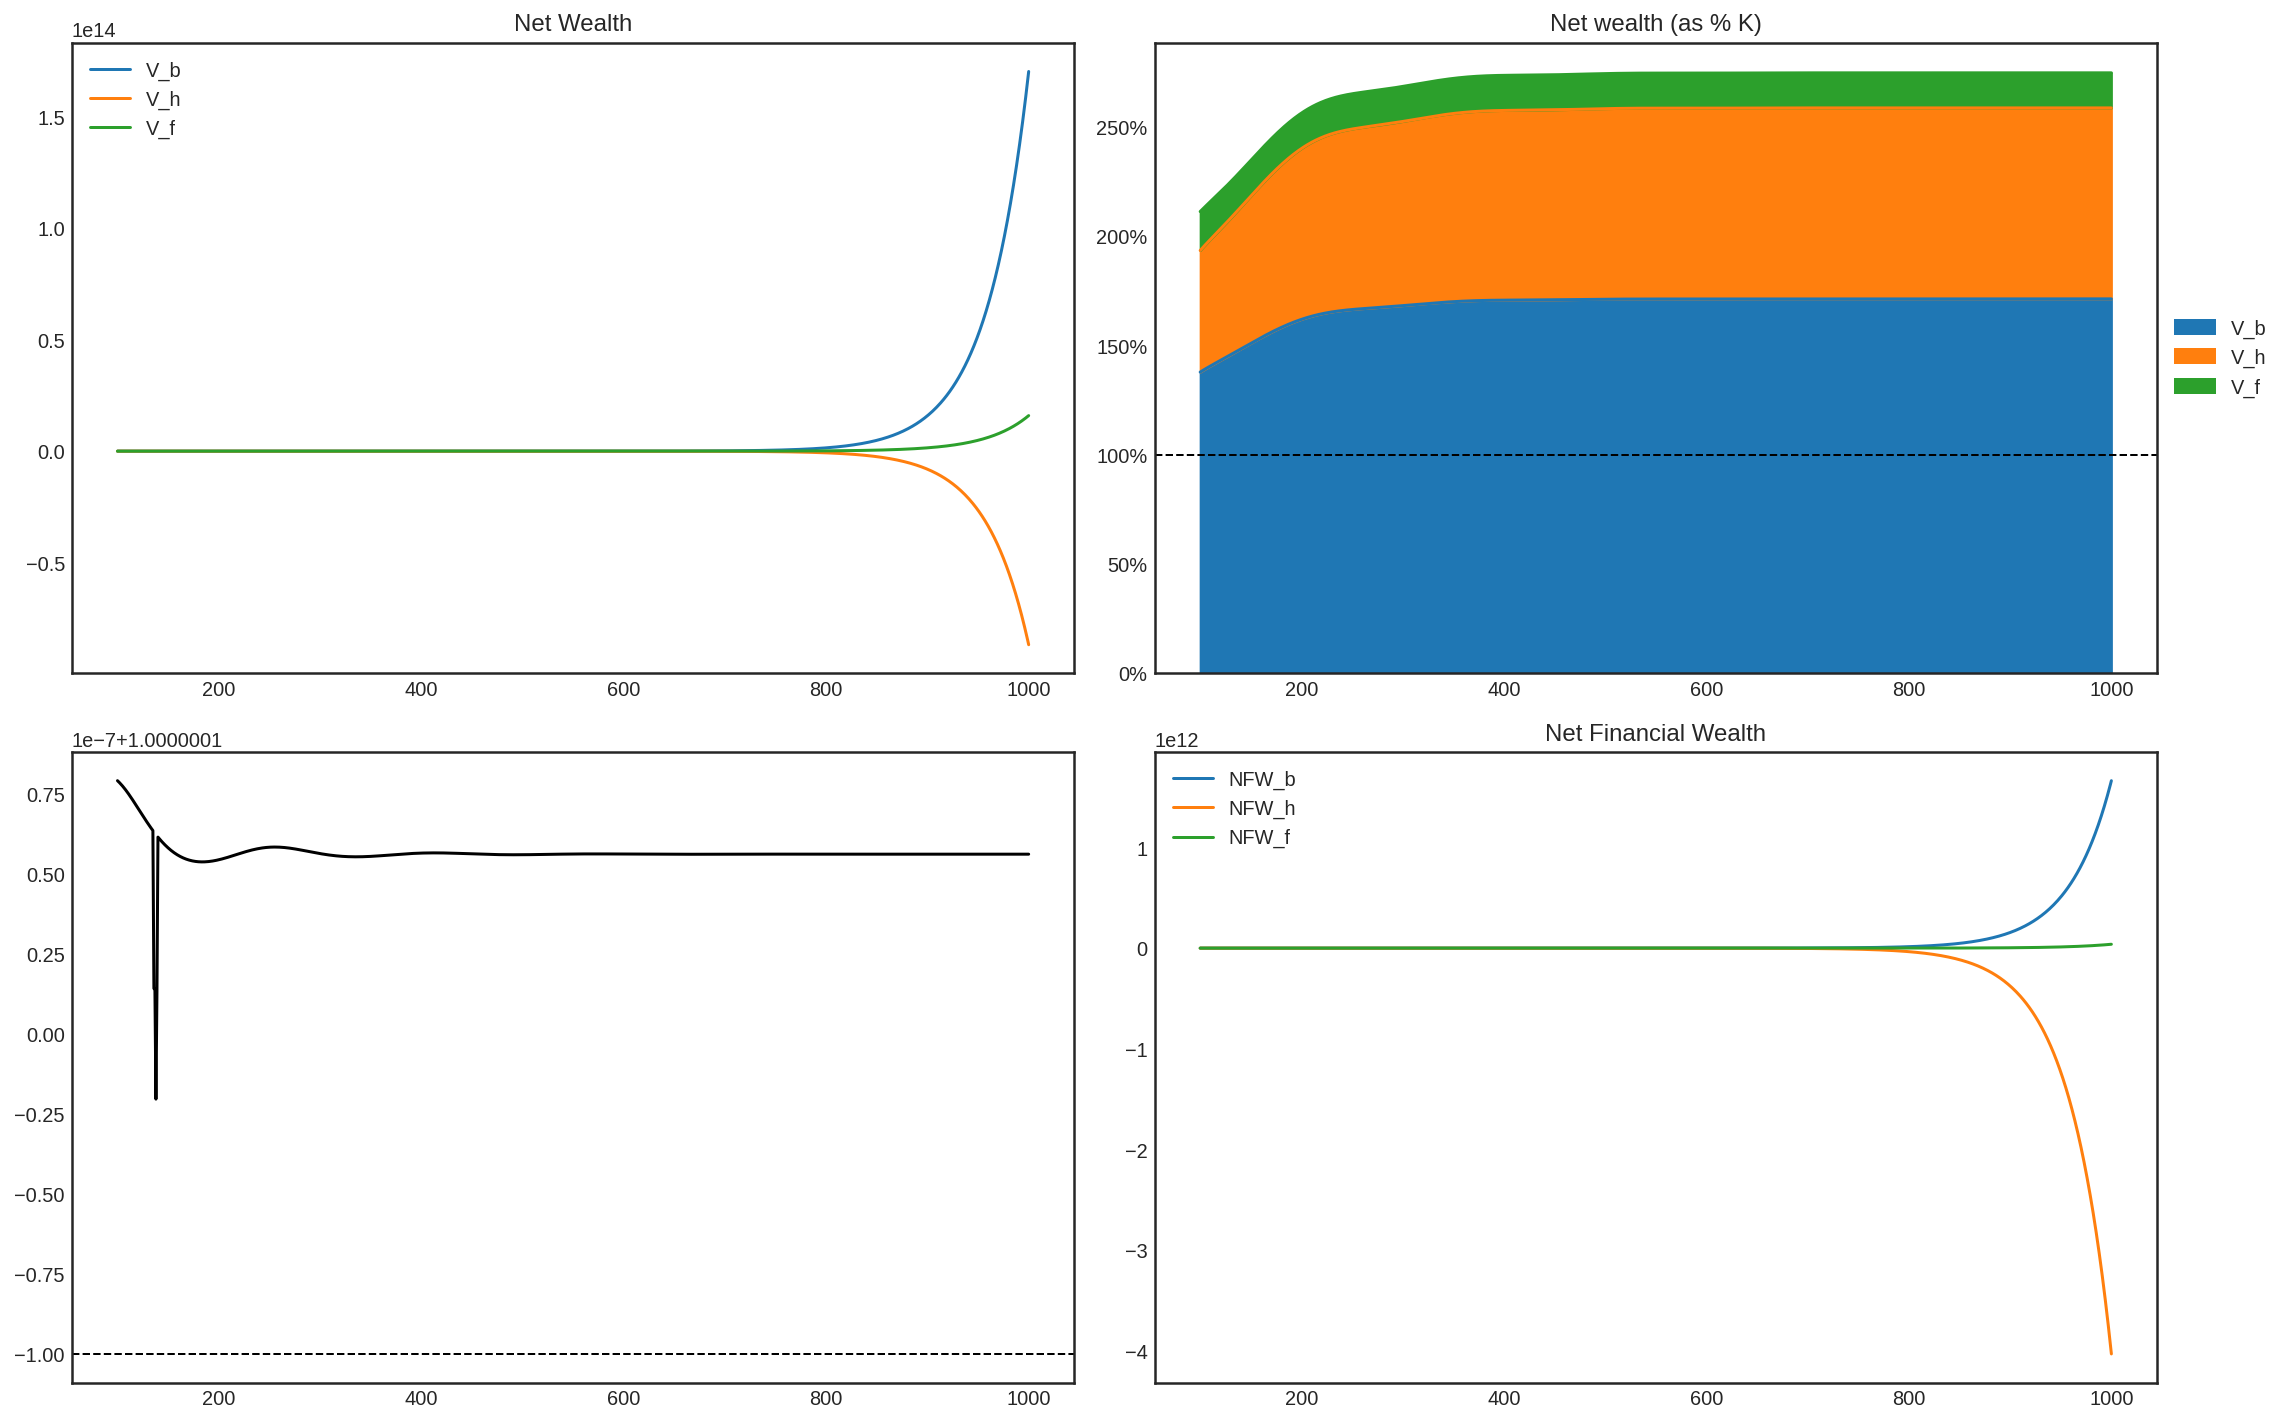

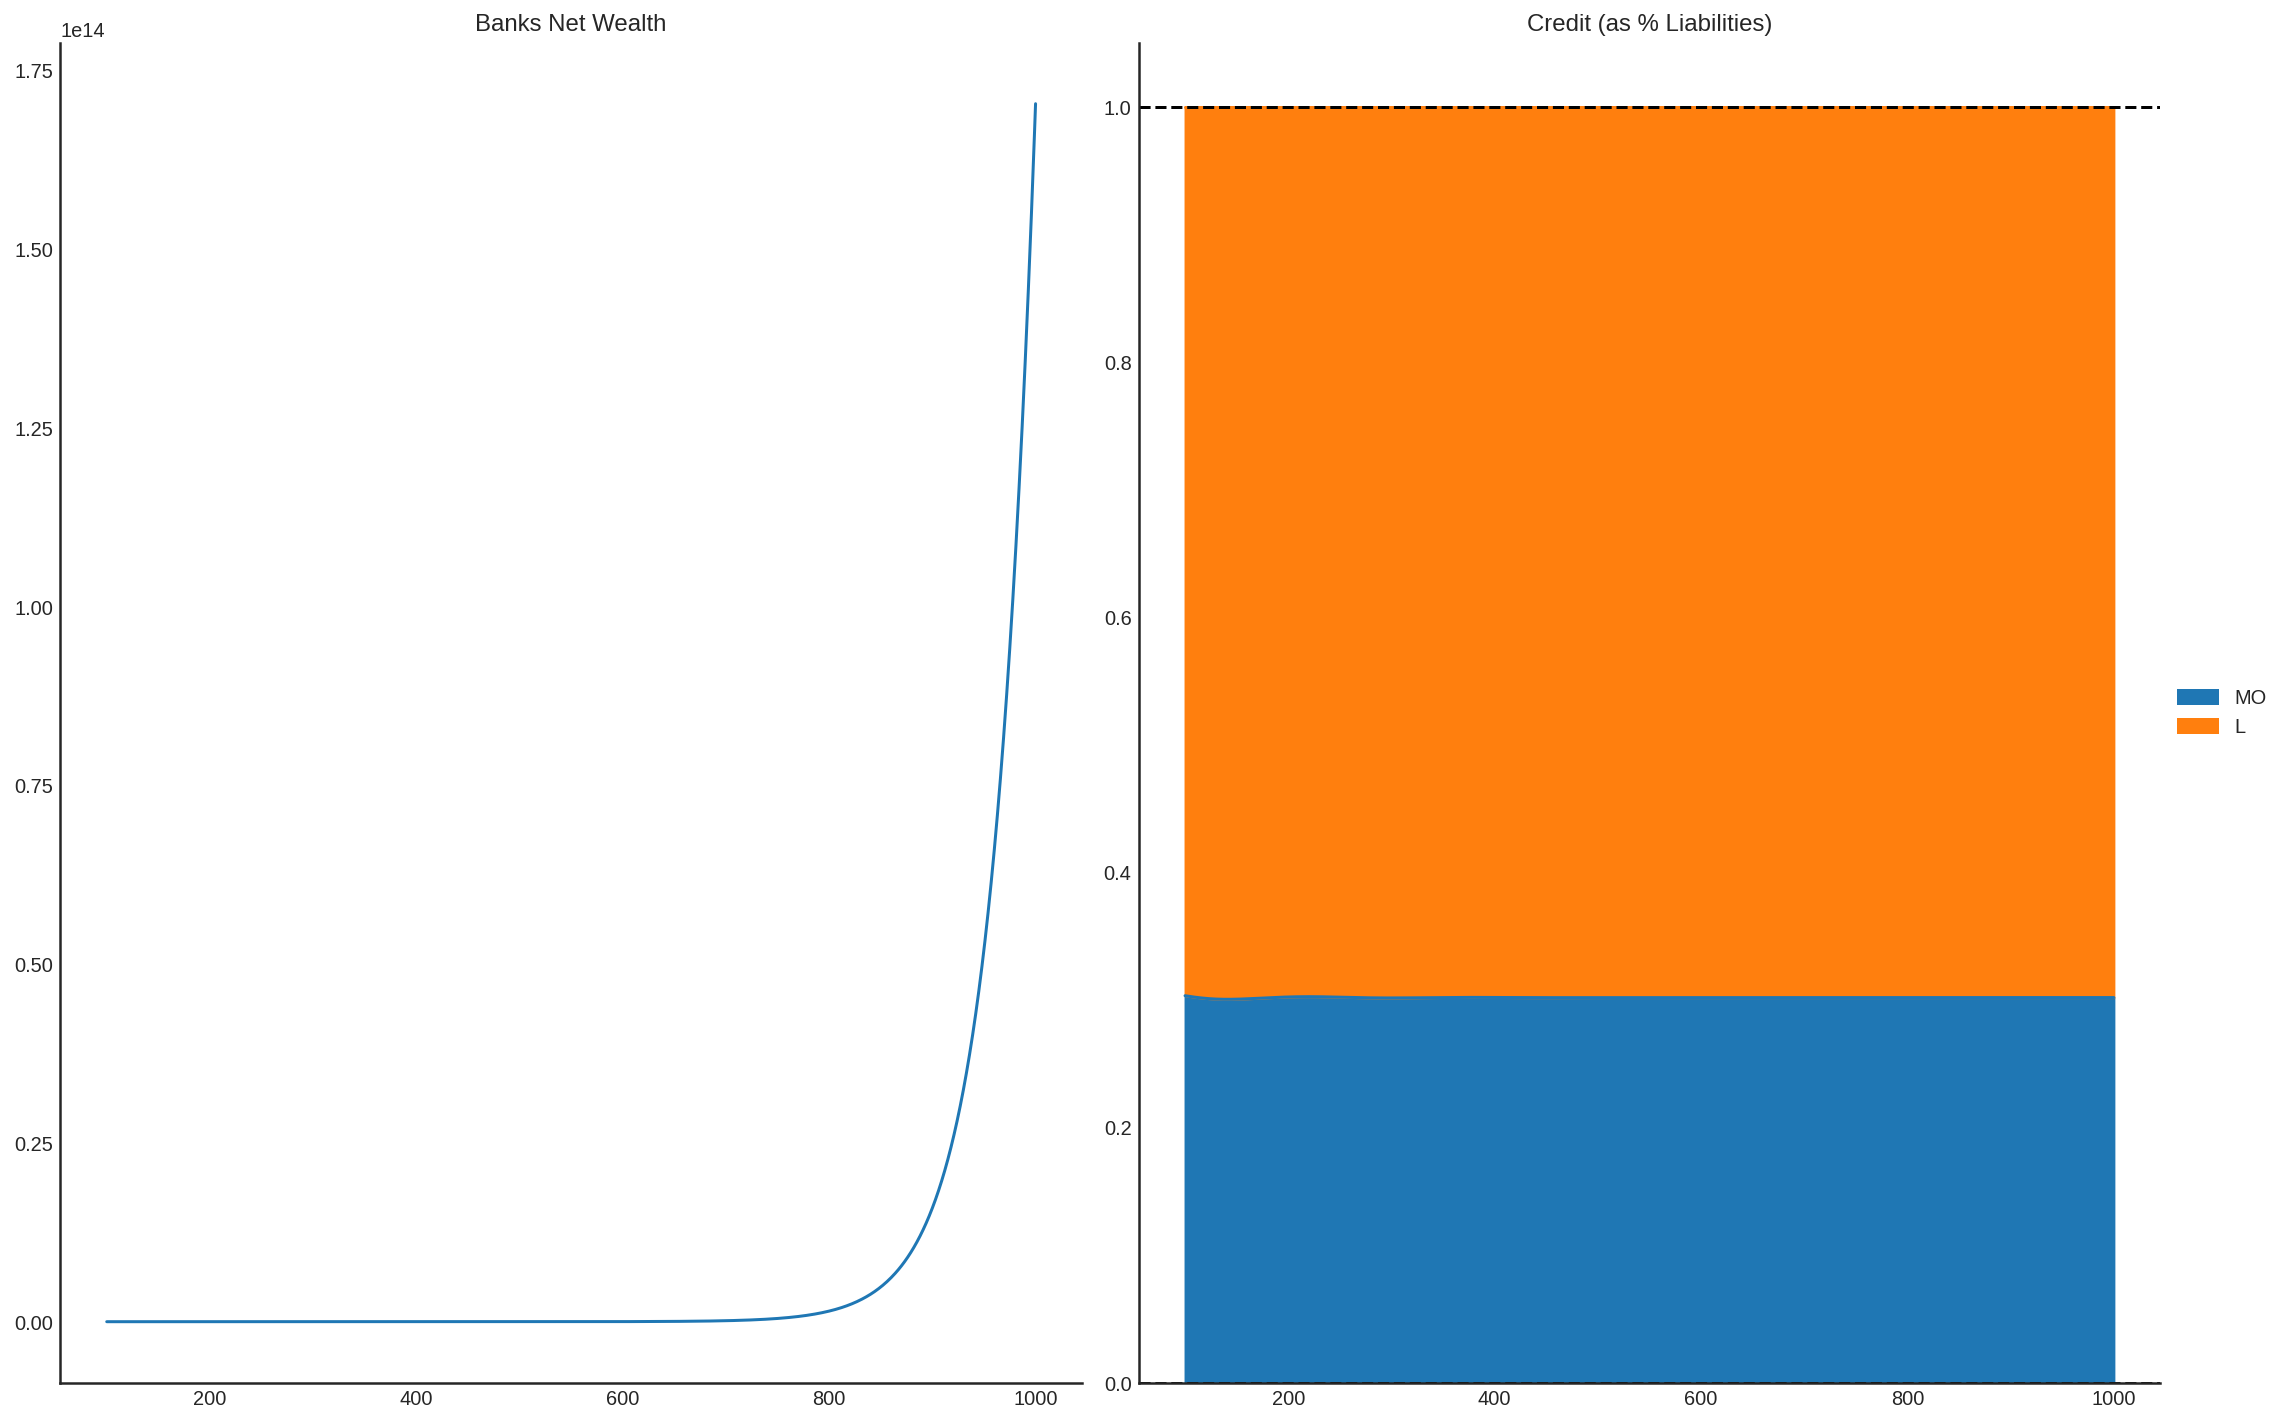

100          101          102          103          104   \
C     3765.144808  3855.874059  3948.747303  4043.814247  4141.125898   
Cw    1264.973681  1295.698829  1327.127871  1359.275953  1392.158688   
Ck    2500.178891  2560.183184  2621.627581  2684.546643  2748.975762   
FD    2341.125488  2397.478721  2455.112811  2514.056151  2574.338052   
Fn    2544.701617  2605.955131  2668.600882  2732.669729  2798.193535   
...           ...          ...          ...          ...          ...   
TIME     1.000000     2.000000     3.000000     4.000000     5.000000   
Ih/Y     0.211765     0.211705     0.211652     0.211606     0.211566   
I/Y      0.255887     0.256027     0.256150     0.256258     0.256351   
Z/Y      0.705881     0.705682     0.705505     0.705351     0.705219   
gY            NaN     0.024289     0.024256     0.024224     0.024191   

             105          106          107          108          109   ...  \
C     4240.734599  4342.694067  4447.059428  4553.887258  4663.235617  ...   
Cw    1425.792178  1460.193029  1495.378366  1531.365852  1568.173697  ...   
Ck    2814.951180  2882.510009  2951.690249  3022.530815  3095.071555  ...   
FD    2635.988784  2699.039597  2763.522753  2829.471554  2896.920366  ...   
Fn    2865.205200  2933.738692  3003.829080  3075.512559  3148.826485  ...   
...           ...          ...          ...          ...          ...  ...   
TIME     6.000000     7.000000     8.000000     9.000000    10.000000  ...   
Ih/Y     0.211534     0.211507     0.211487     0.211474     0.211466  ...   
I/Y      0.256427     0.256489     0.256535     0.256567     0.256584  ...   
Z/Y      0.705110     0.705022     0.704955     0.704910     0.704885  ...   
gY       0.024159     0.024128     0.024096     0.024066     0.024036  ...   

              991           992           993           994           995   \
C     5.641309e+12  5.776700e+12  5.915341e+12  6.057309e+12  6.202685e+12   
Cw    1.880934e+12  1.926076e+12  1.972302e+12  2.019638e+12  2.068109e+12   
Ck    3.760386e+12  3.850635e+12  3.943051e+12  4.037684e+12  4.134588e+12   
FD    3.472854e+12  3.556203e+12  3.641552e+12  3.728949e+12  3.818444e+12   
Fn    3.774841e+12  3.865438e+12  3.958208e+12  4.053206e+12  4.150483e+12   
...            ...           ...           ...           ...           ...   
TIME  8.920000e+02  8.930000e+02  8.940000e+02  8.950000e+02  8.960000e+02   
Ih/Y  2.142020e-01  2.142020e-01  2.142020e-01  2.142020e-01  2.142020e-01   
I/Y   2.502008e-01  2.502008e-01  2.502008e-01  2.502009e-01  2.502009e-01   
Z/Y   7.140044e-01  7.140044e-01  7.140043e-01  7.140043e-01  7.140043e-01   
gY    2.400005e-02  2.400005e-02  2.400005e-02  2.400006e-02  2.400006e-02   

              996           997           998           999           1000  
C     6.351549e+12  6.503987e+12  6.660083e+12  6.819925e+12  6.983603e+12  
Cw    2.117744e+12  2.168570e+12  2.220616e+12  2.273911e+12  2.328485e+12  
Ck    4.233818e+12  4.335430e+12  4.439480e+12  4.546028e+12  4.655133e+12  
FD    3.910087e+12  4.003930e+12  4.100024e+12  4.198425e+12  4.299187e+12  
Fn    4.250095e+12  4.352097e+12  4.456548e+12  4.563505e+12  4.673030e+12  
...            ...           ...           ...           ...           ...  
TIME  8.970000e+02  8.980000e+02  8.990000e+02  9.000000e+02  9.010000e+02  
Ih/Y  2.142019e-01  2.142019e-01  2.142019e-01  2.142019e-01  2.142019e-01  
I/Y   2.502009e-01  2.502009e-01  2.502010e-01  2.502010e-01  2.502010e-01  
Z/Y   7.140042e-01  7.140042e-01  7.140041e-01  7.140041e-01  7.140040e-01  
gY    2.400006e-02  2.400006e-02  2.400006e-02  2.400006e-02  2.400006e-02  

[77 rows x 901 columns]

In [3]:
base = model()
df = SolveSFC(base, time=1000)
df_base = df
df = df[100:]
fig, ax = plt.subplots(1,3, figsize=(24,5))

df["TIME"] = [i+1 for i in range(len(df.index))]
df["Ih/Y"] = df["I_h"]/df["Y"]
df["I/Y"] = df["I_t"]/df["Y"]
df["Z/Y"] = df["Z"]/df["Y"]
df["gY"] = df["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False, ax=ax[0])
sns.lineplot(y = 'Ih/Y', x='u', data=df, sort=False, color = 'black', ax=ax[0])

sns.scatterplot(y = 'Z/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False, ax=ax[1])
sns.lineplot(y = 'Z/Y', x='u', data=df, sort=False, color = 'black', ax=ax[1])

sns.scatterplot(y = 'I/Y', x='gY', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False, ax=ax[2])
sns.lineplot(y = 'I/Y', x='gY', data=df, sort=False, color = 'black', ax=ax[2])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2,2, figsize=(16,10))

df[['Lf', "M_h", "MO", "Lk"]][:100].plot(ax=ax[0,0], title='Financial Assets')

df[['FT', "FU", "FD", "Fn"]][:100].plot(title='Profitss', ax=ax[0,1])

df['h'].plot(color = "black", ls="-",  title = "Marginal propensity to invest", 
             label = "$h_t$", legend = True,ax=ax[1,0])

df[["Y", "K", "I_h", "I_f"]][40:].pct_change().plot(title = "Growth rates",ax=ax[1,1])
ax[1,1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,1].get_yticks()])
ax[1,1].axhline(y=df["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()


fig, ax = plt.subplots(2,2, figsize=(16,10))


df[["K"]].pct_change().plot(ax=ax[0,0], color='black', title='Capital growth rate')

df['Y'].pct_change().plot(color = "black", title = "GDP growth rate", label = "$Y_t$", legend = True, ax=ax[0,1])
ax[0,1].axhline(y=df["g_Z"].iloc[-1], color = "red", ls = "--", lw=1, label = "Autonomous growth rate")
ax[0,1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0,1].get_yticks()])

df['K_k'].plot(color = "black", title = "Housing as % of total capital", label = "$k$", legend = True, ax=ax[1,0])
ax[1,0].set_yticklabels(['{:,.0%}'.format(x) for x in ax[1,0].get_yticks()])

df['un'].plot(color = "red", ls="--",  title = "Capacity utilization ratio", label = "$un$", legend = True,ax=ax[1,1])
df['u'].plot(color = "black", title = "Capacity utilization ratio", label = "$u_t$", legend = True, ax=ax[1,1])
#ax[1,1].set_yticklabels(['{:,.1%}'.format(x) for x in ax[1,1].get_yticks()])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2,2, figsize=(16,10))

df[["V_b", "V_h", "V_f"]].plot(title = "Net Wealth", ax=ax[0,0])

df[['V_b', 'V_h', 'V_f']].apply(lambda x: np.abs(x)/df['K']).plot(kind = 'area', stacked = True, 
                                                                  title = "Net wealth (as % K)", ax=ax[0,1])
ax[0,1].set_yticklabels(['{:,.0%}'.format(x) for x in ax[0,1].get_yticks()])
ax[0,1].axhline(y=1, color = "black", ls = "--", lw=1)
ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

((df['V_b'] + df['V_f'] + df['V_h'])/df['K']).plot(label='Consistensy check', color='black', ax=ax[1,0])
ax[1,0].axhline(y=1, color = "black", ls = "--", lw=1)

df[["NFW_b", "NFW_h", "NFW_f"]].plot(title = "Net Financial Wealth", ax=ax[1,1])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1,2, figsize=(16,10))

df['V_b'].plot(title = "Banks Net Wealth", ax=ax[0])
df[["MO", "L"]].apply(lambda x: x/(df["MO"] + df['L'])).plot(kind = "area",stacked = True ,
                                                             title = "Credit (as % Liabilities)", ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].axhline(y = 1, color = "black", ls = "--")
ax[1].axhline(y = 0, color = "black", ls = "--")

sns.despine()
plt.tight_layout()
plt.show()

df.transpose()

# Shocks

## Increase in autonomous growth rate ($g_z$)

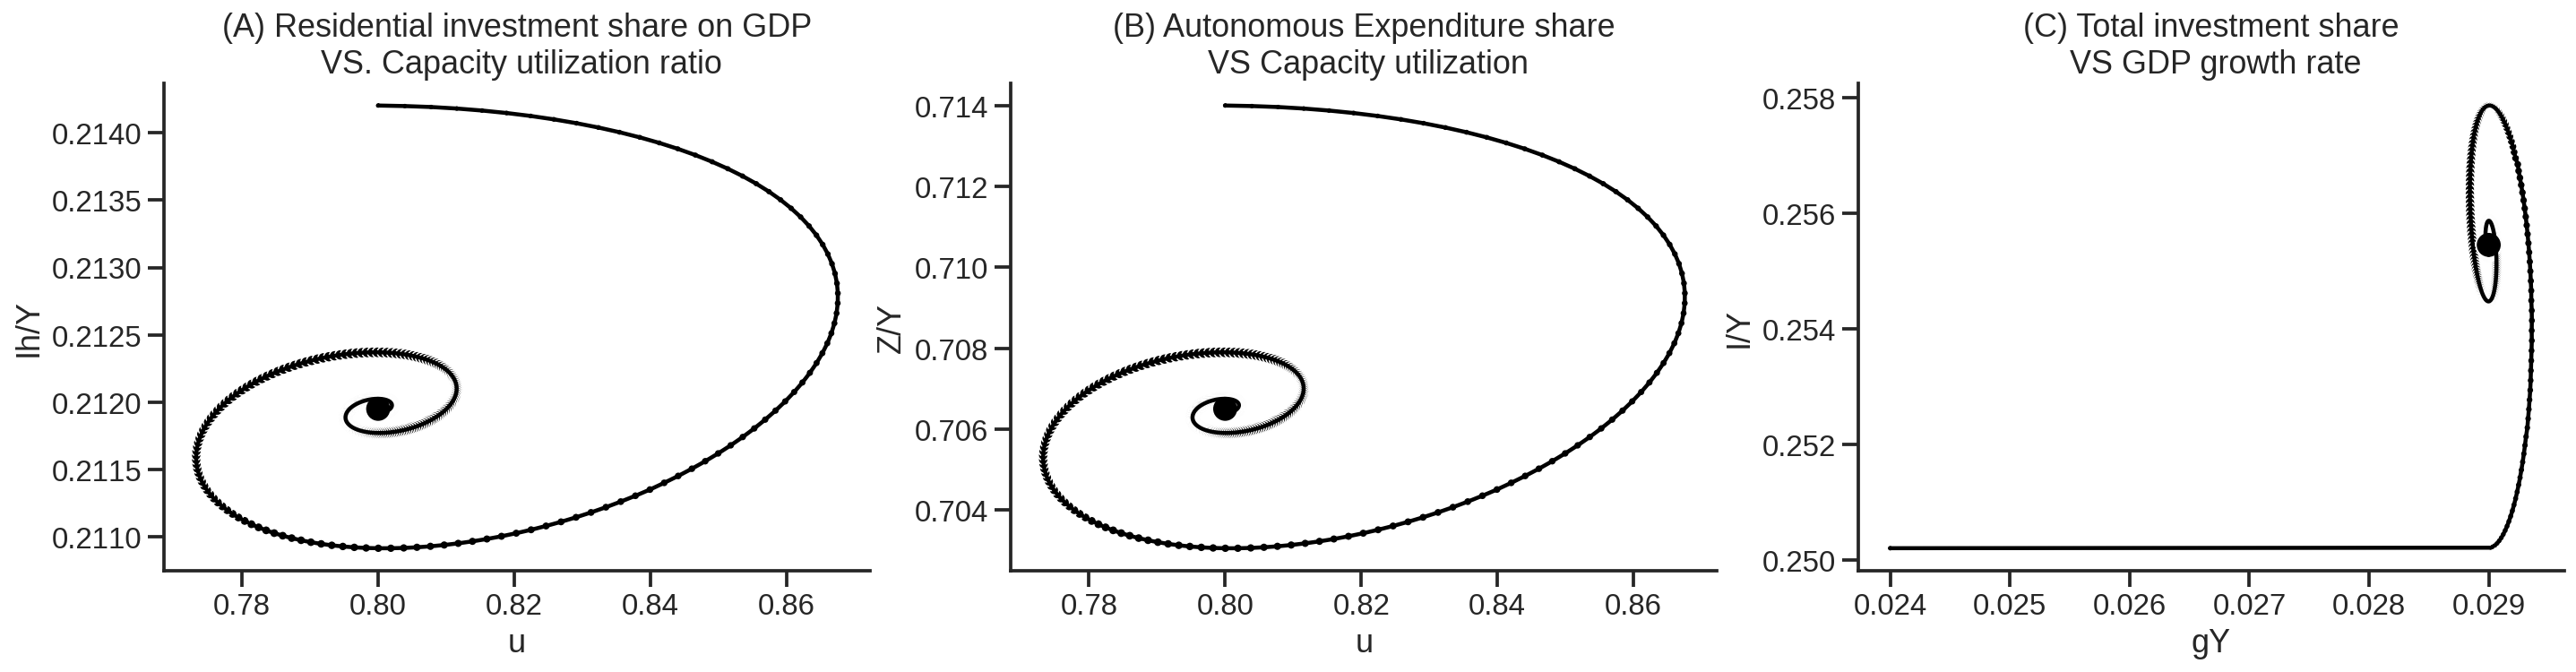

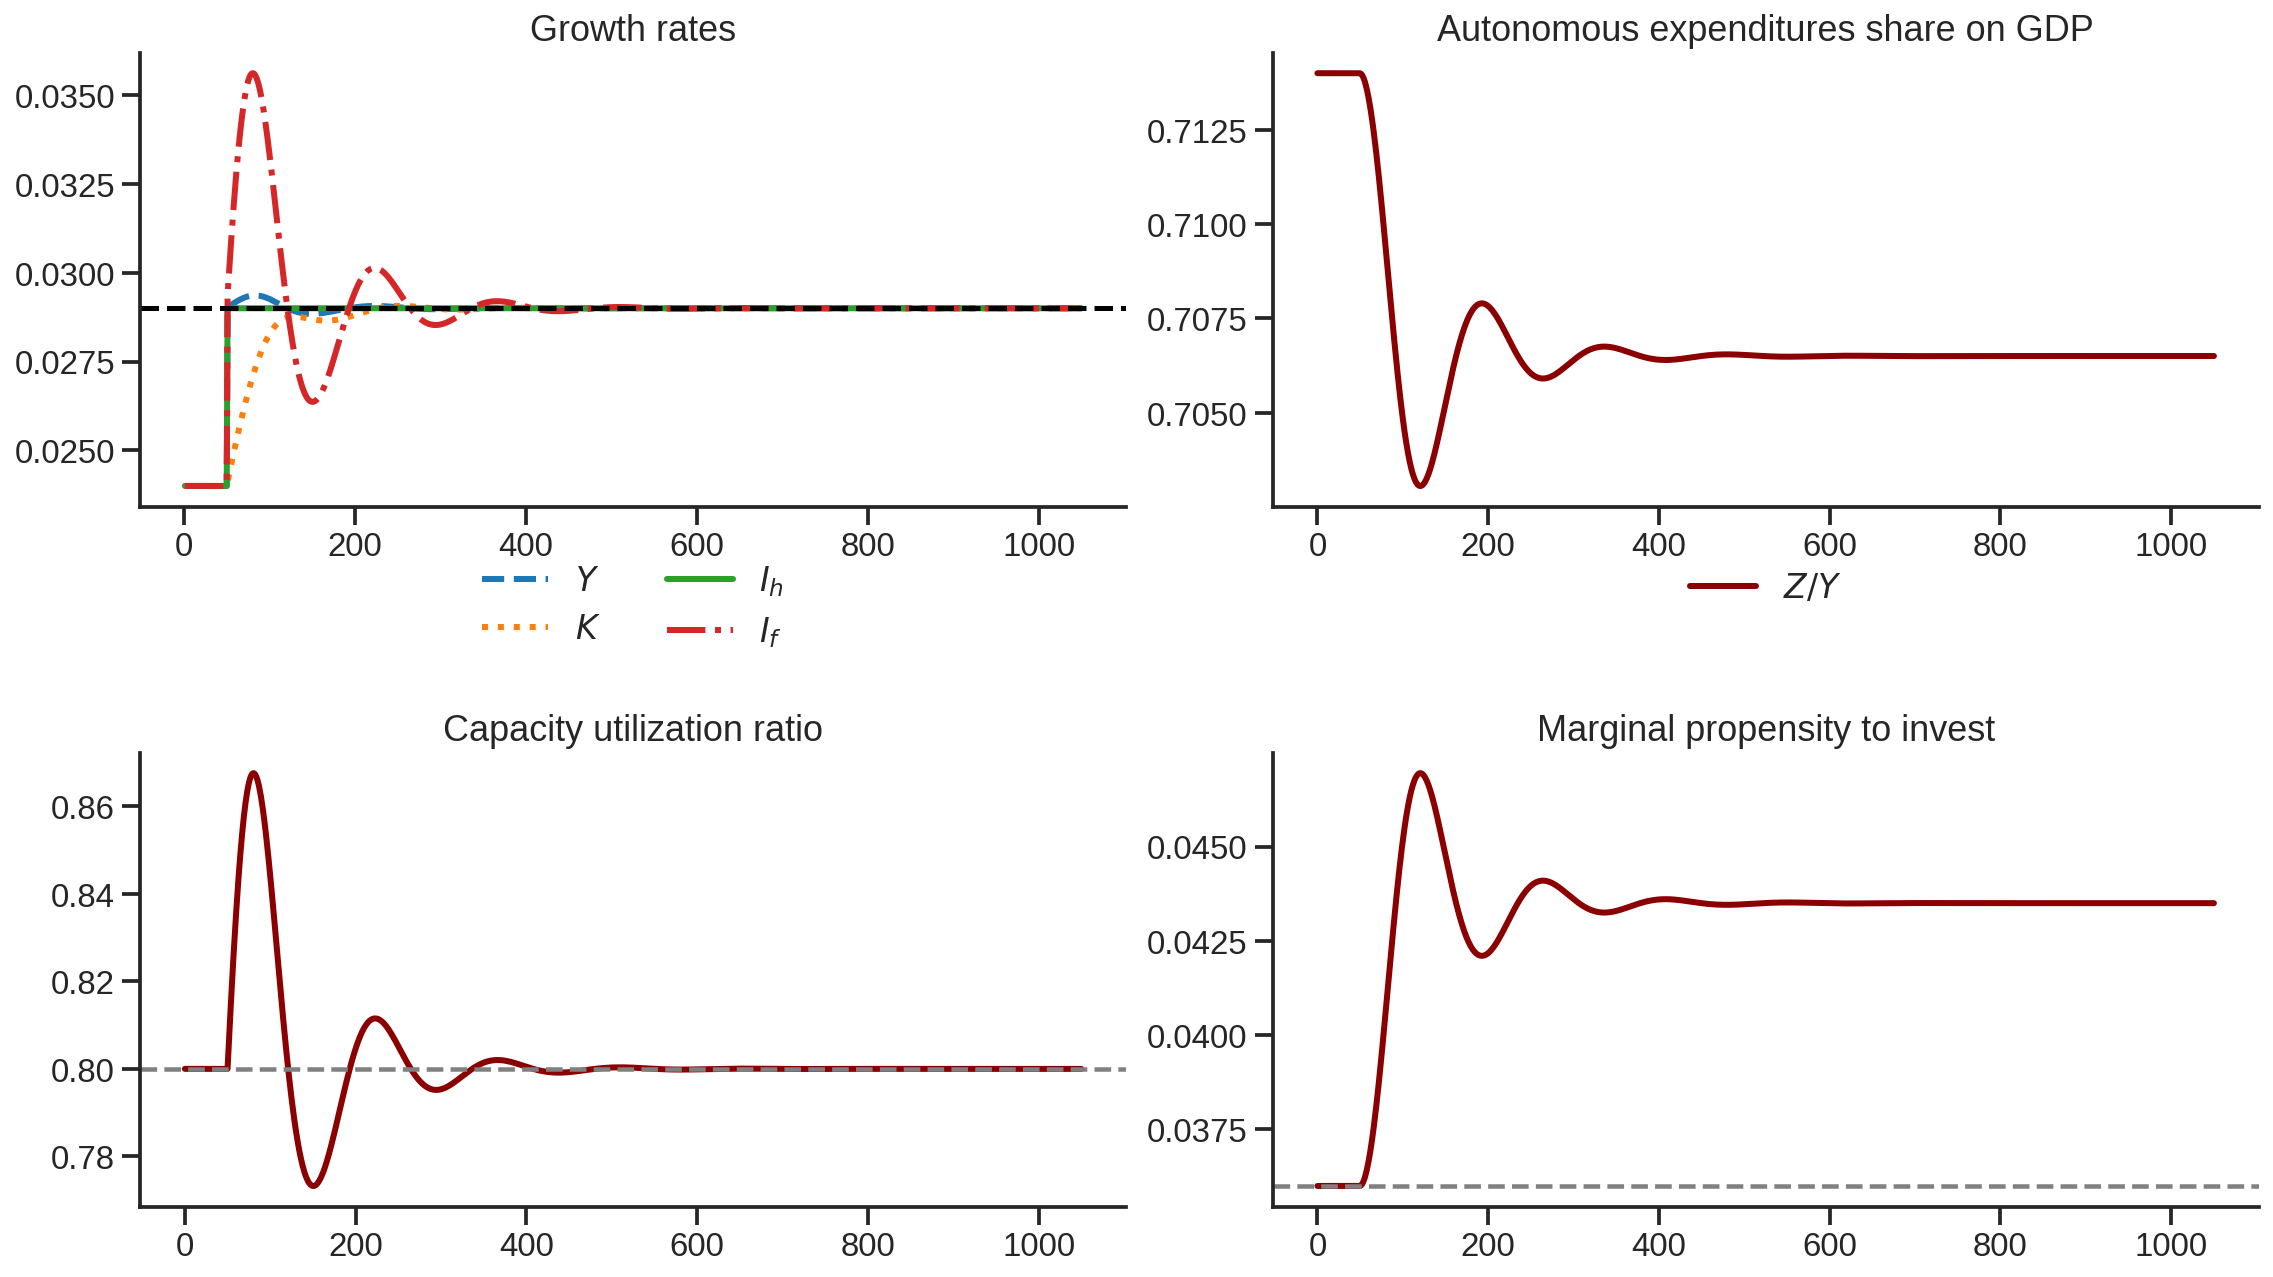

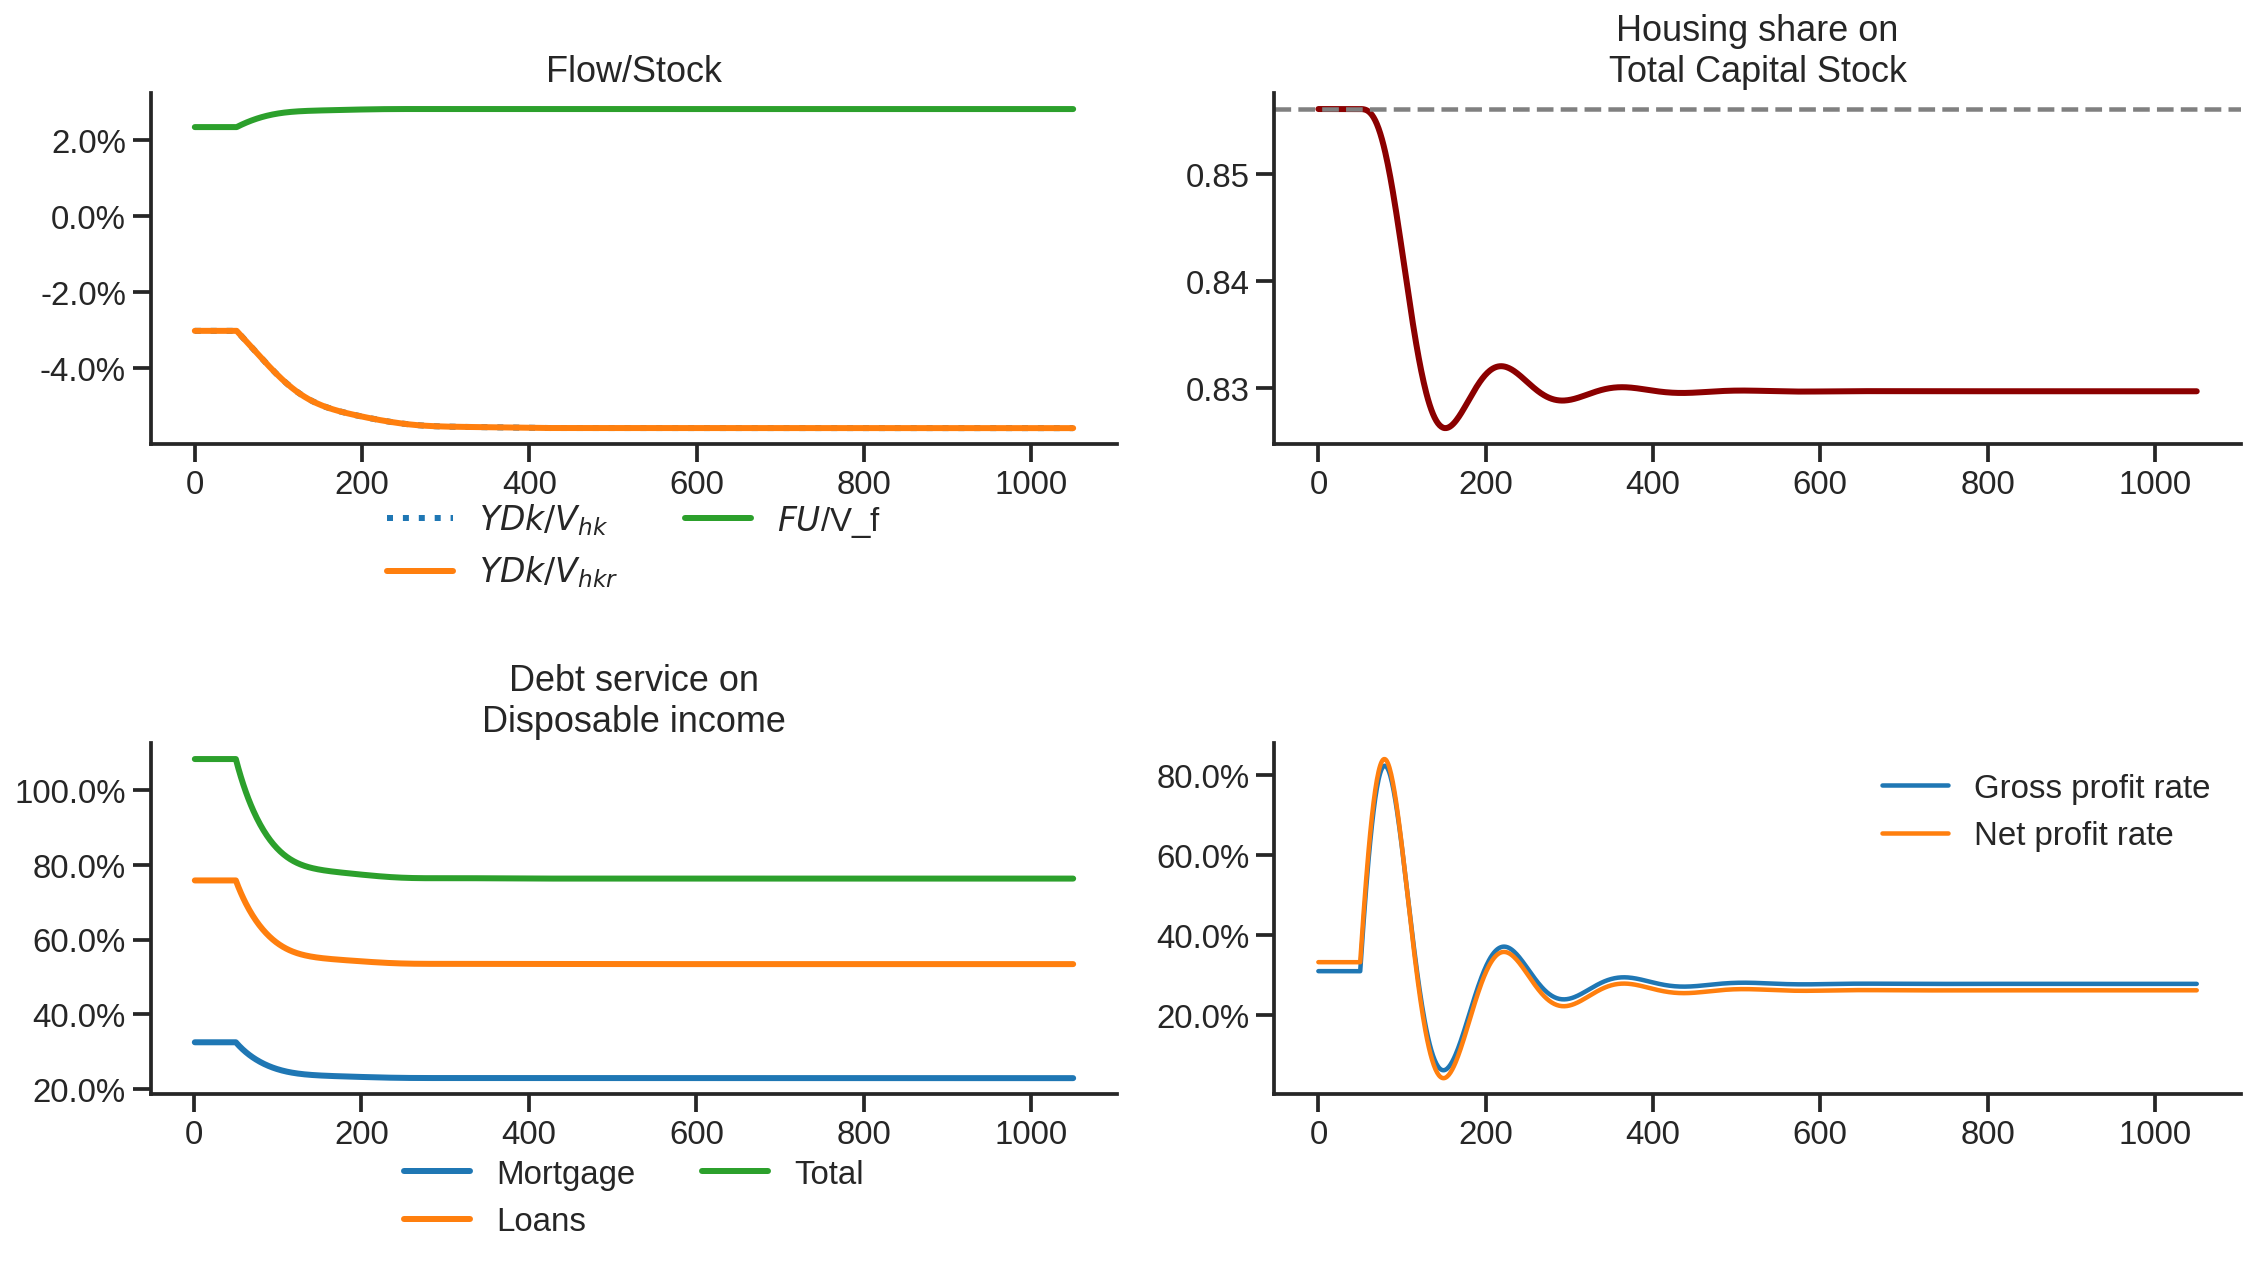

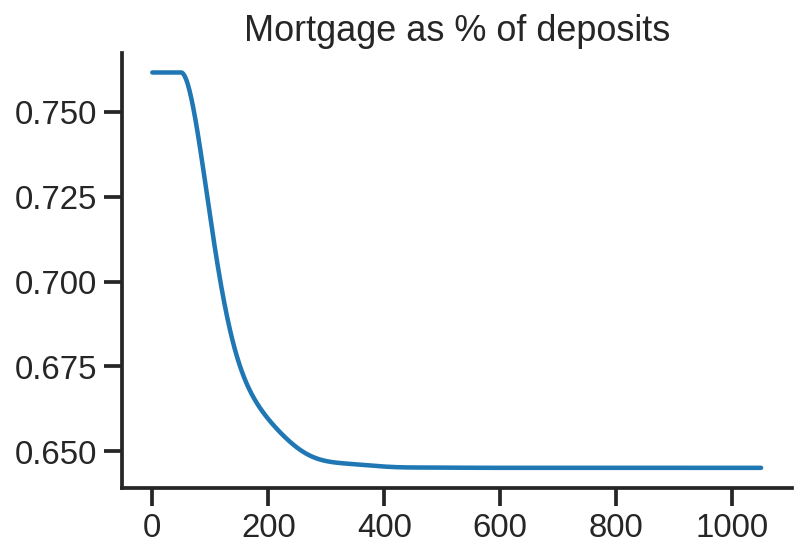

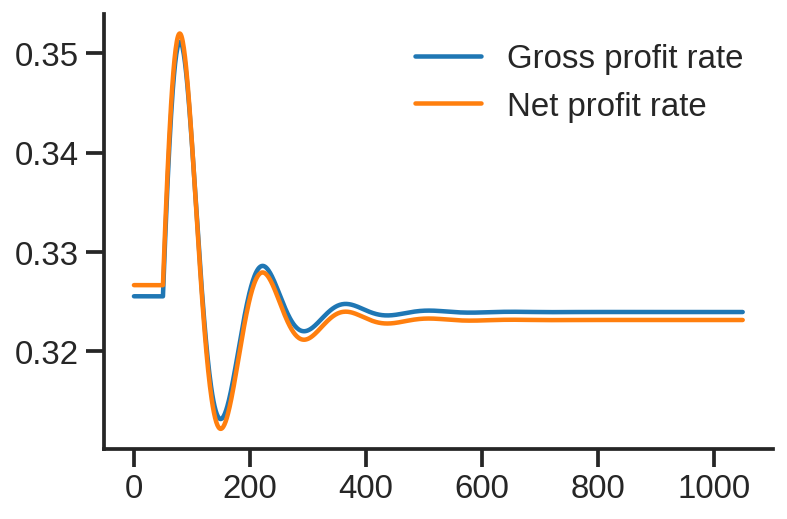

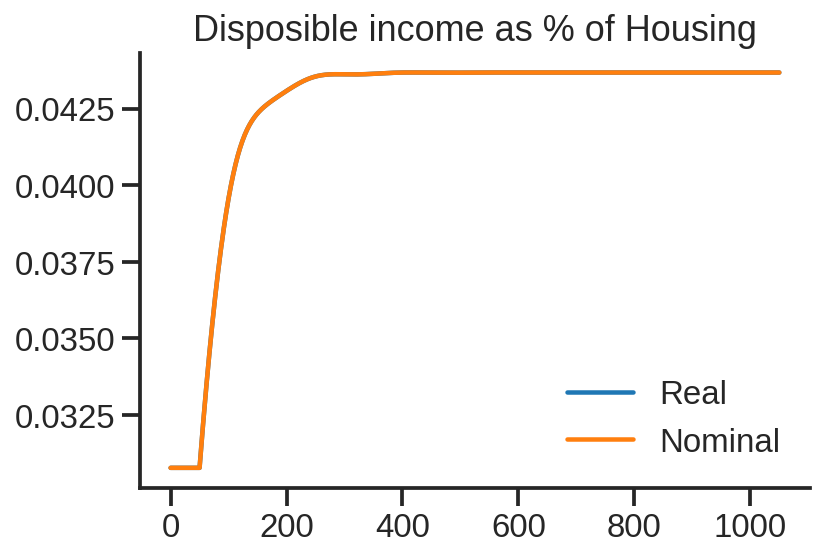

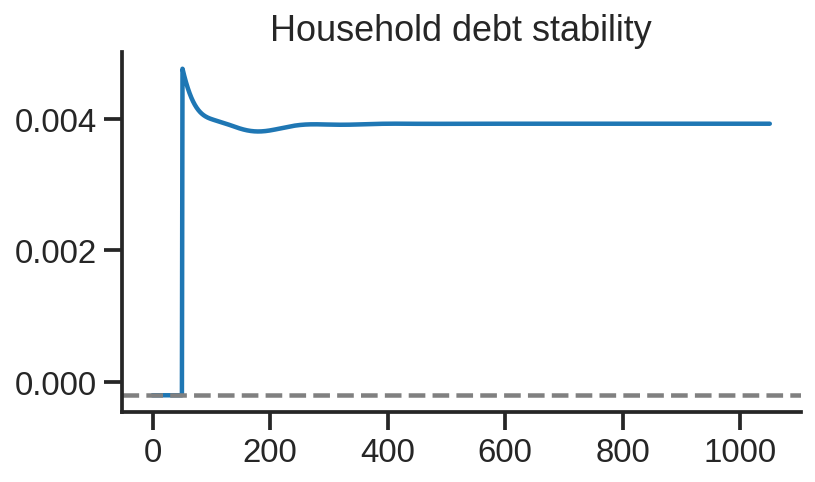

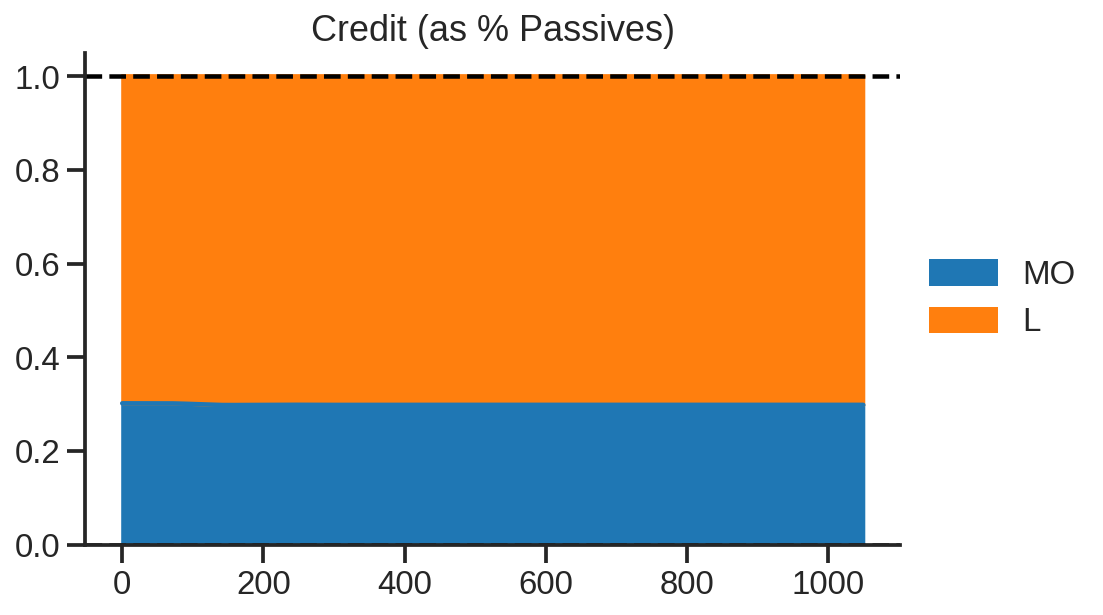

0         Shock             1             2             3  \
C     2.286008e+13  2.352317e+13  2.420558e+13  2.490798e+13  2.563090e+13   
Cw    7.622054e+12  7.843239e+12  8.070959e+12  8.305453e+12  8.546904e+12   
Ck    1.523807e+13  1.567998e+13  1.613468e+13  1.660259e+13  1.708406e+13   
FD    1.407294e+13  1.448108e+13  1.490128e+13  1.533396e+13  1.577947e+13   
Fn    1.529667e+13  1.574031e+13  1.619704e+13  1.666735e+13  1.715160e+13   
...            ...           ...           ...           ...           ...   
TIME  5.100000e+01  5.200000e+01  5.300000e+01  5.400000e+01  5.500000e+01   
Ih/Y  2.142015e-01  2.141975e-01  2.141904e-01  2.141792e-01  2.141643e-01   
I/Y   2.502020e-01  2.502108e-01  2.502288e-01  2.502551e-01  2.502898e-01   
Z/Y   7.140026e-01  7.139896e-01  7.139654e-01  7.139279e-01  7.138784e-01   
gY    2.400000e-02  2.901908e-02  2.903391e-02  2.905401e-02  2.907140e-02   

               t-1             t    difference  
C     5.801921e+25  5.970176e+25  1.682557e+24  
Cw    1.948128e+25  2.004624e+25  5.649571e+23  
Ck    3.853803e+25  3.965563e+25  1.117603e+24  
FD    3.575658e+25  3.679352e+25  1.036941e+24  
Fn    3.886584e+25  3.999295e+25  1.127110e+24  
...            ...           ...           ...  
TIME  1.050000e+03  1.051000e+03  1.000000e+00  
Ih/Y  2.119514e-01  2.119514e-01  1.095145e-10  
I/Y   2.554513e-01  2.554513e-01 -2.555355e-10  
Z/Y   7.065030e-01  7.065030e-01  3.650475e-10  
gY    2.900000e-02  2.900000e-02  1.419067e-10  

[77 rows x 8 columns]

In [4]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='phi_0', increase=0.005, time = 1000)
clock_plots(shock = shock, filename = 'Clock_1.svg', variable='g_Z')
plot_shock(shock = shock, filename = 'Shock_1.svg', df=df)
plot_norms(shock = shock, filename = 'Shock_1Norms.svg', df=df)
other_plots(shock, df=df)

shock1 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock1.columns = ['$\Delta \phi_0$']

summary = SummaryShock(shock)
summary

## Decrease in wage-share ($\omega$)

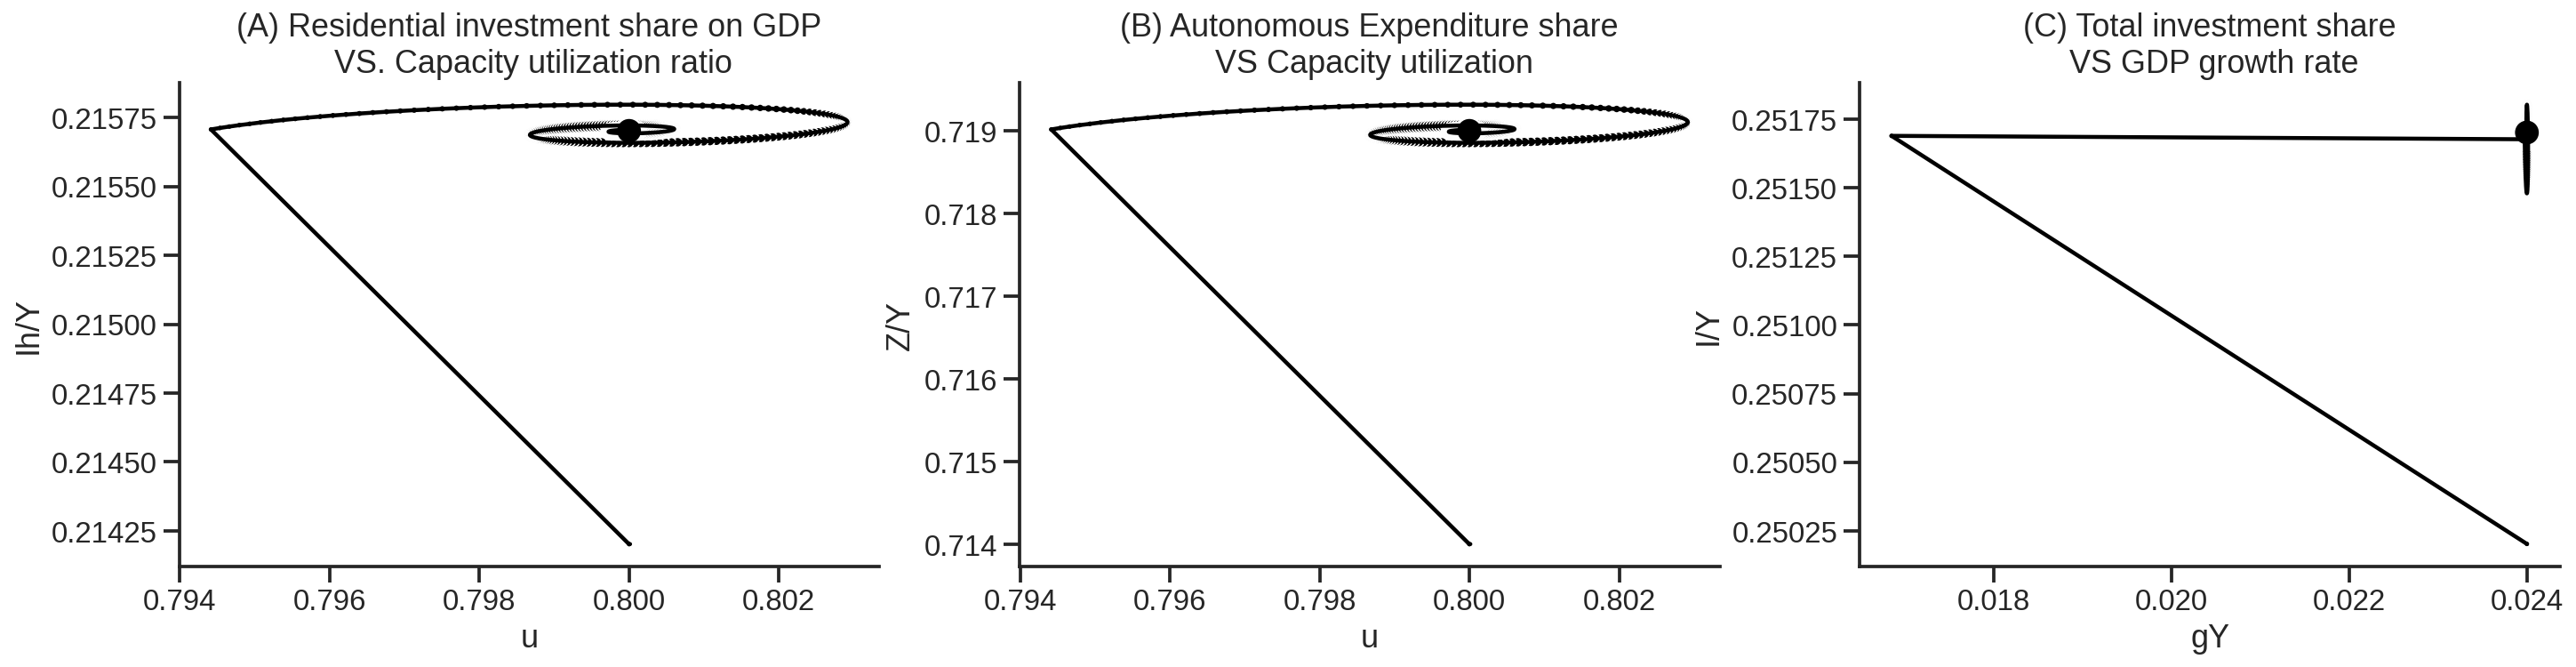

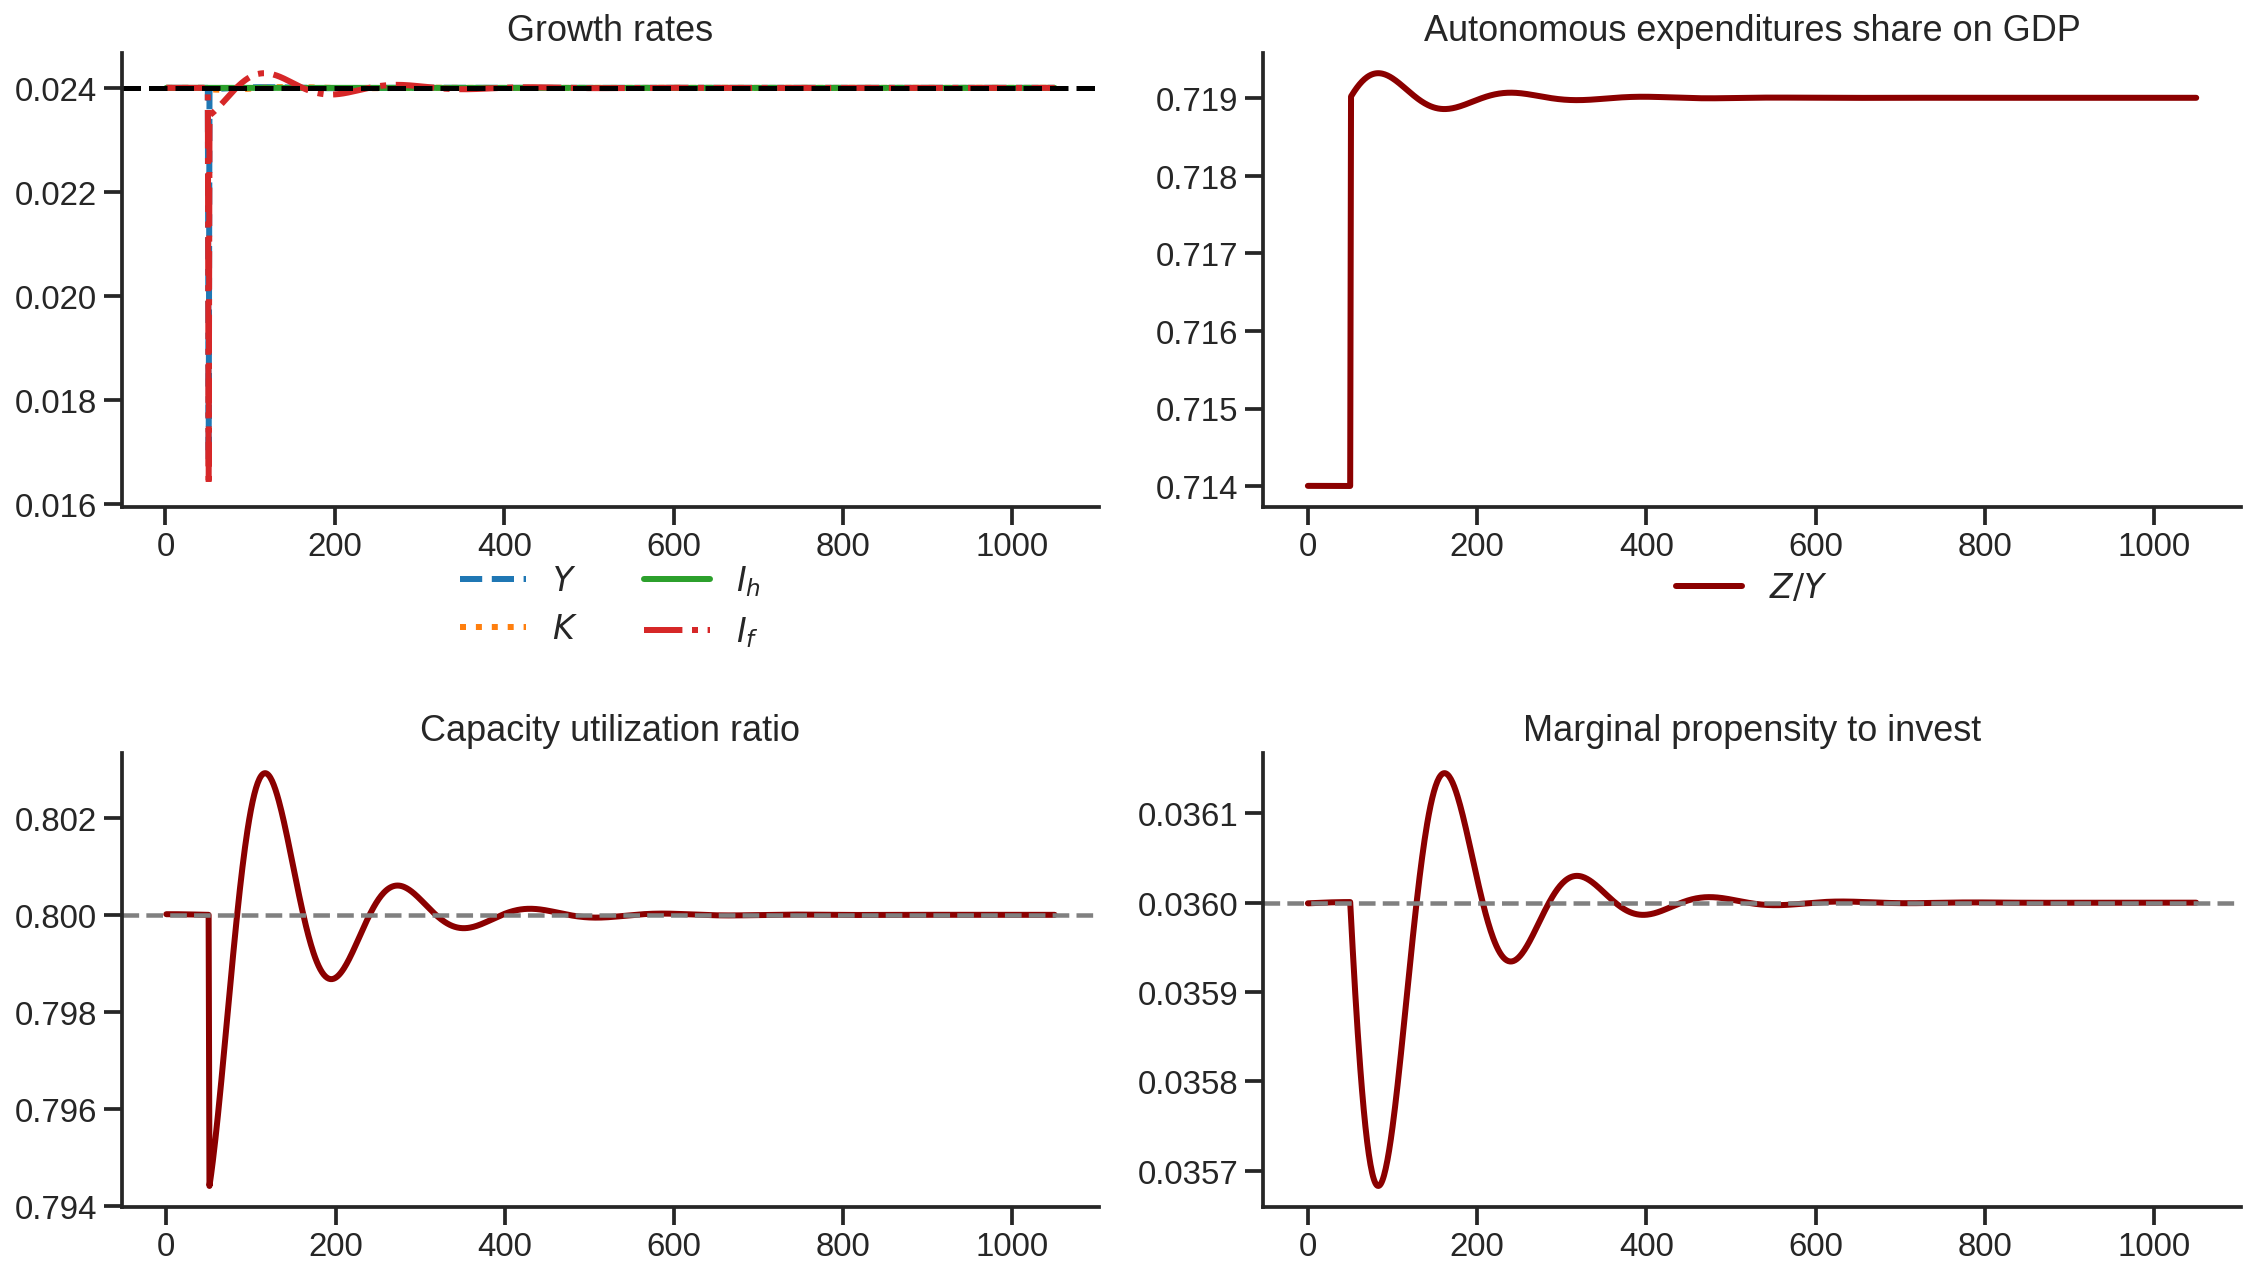

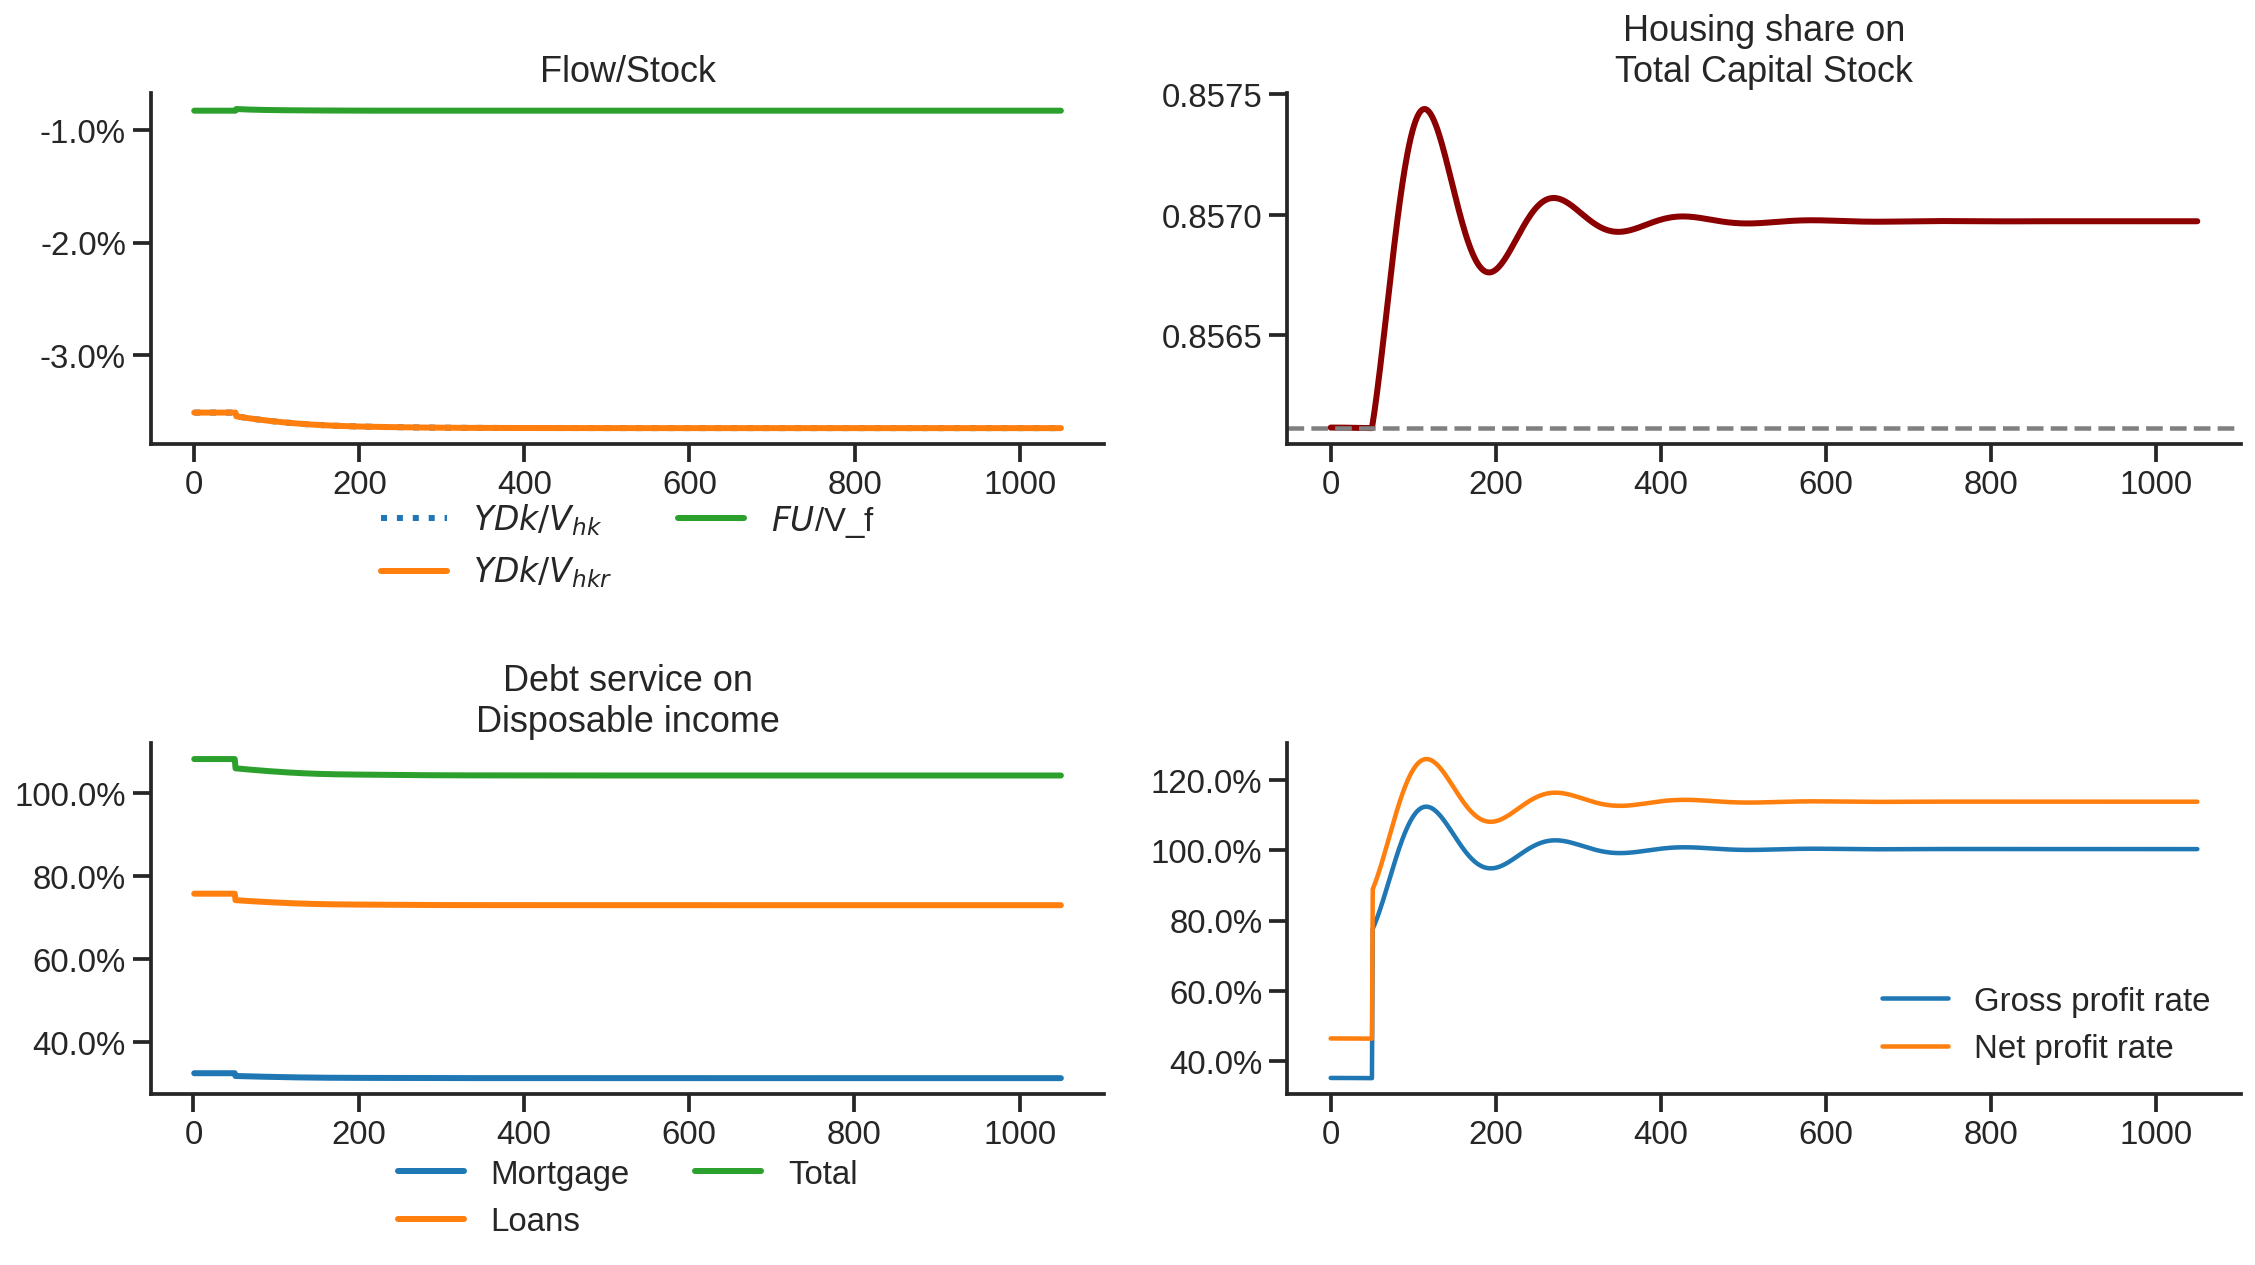

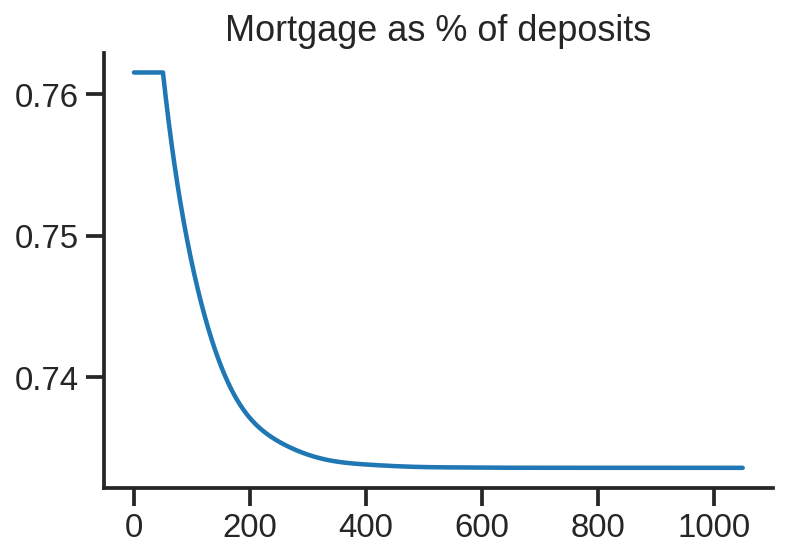

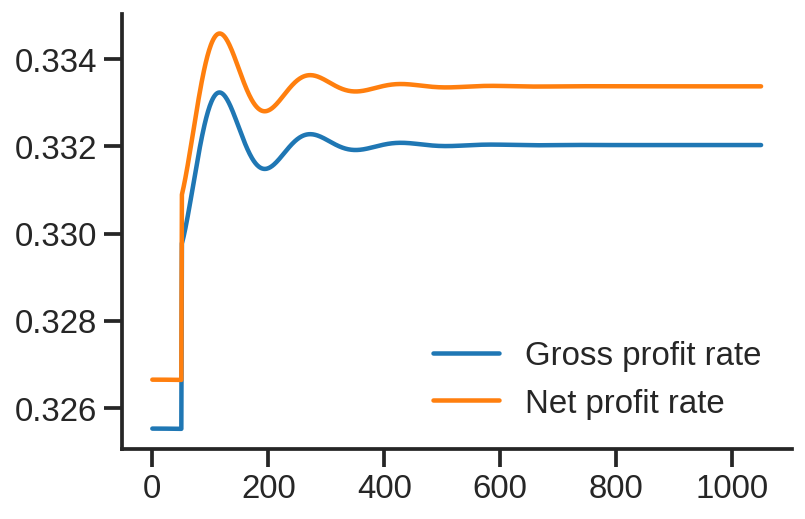

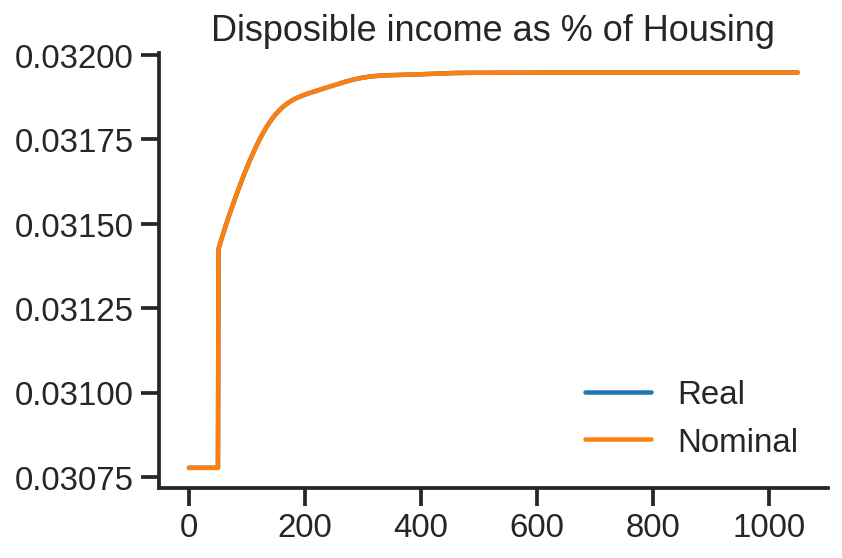

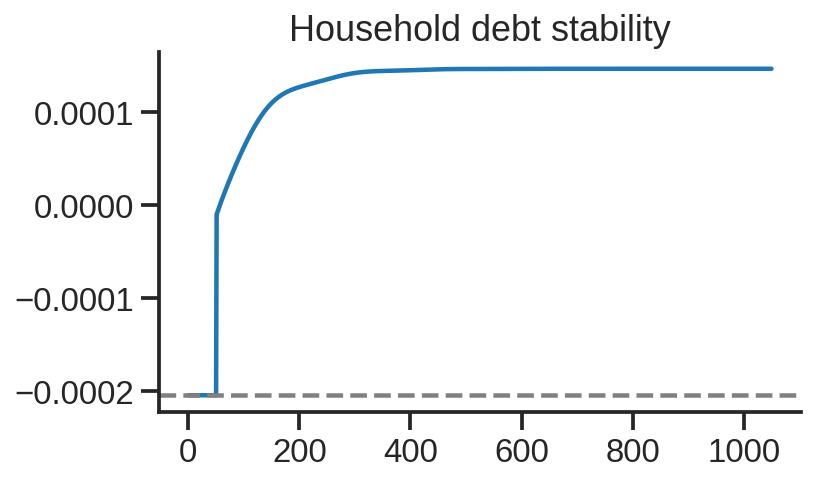

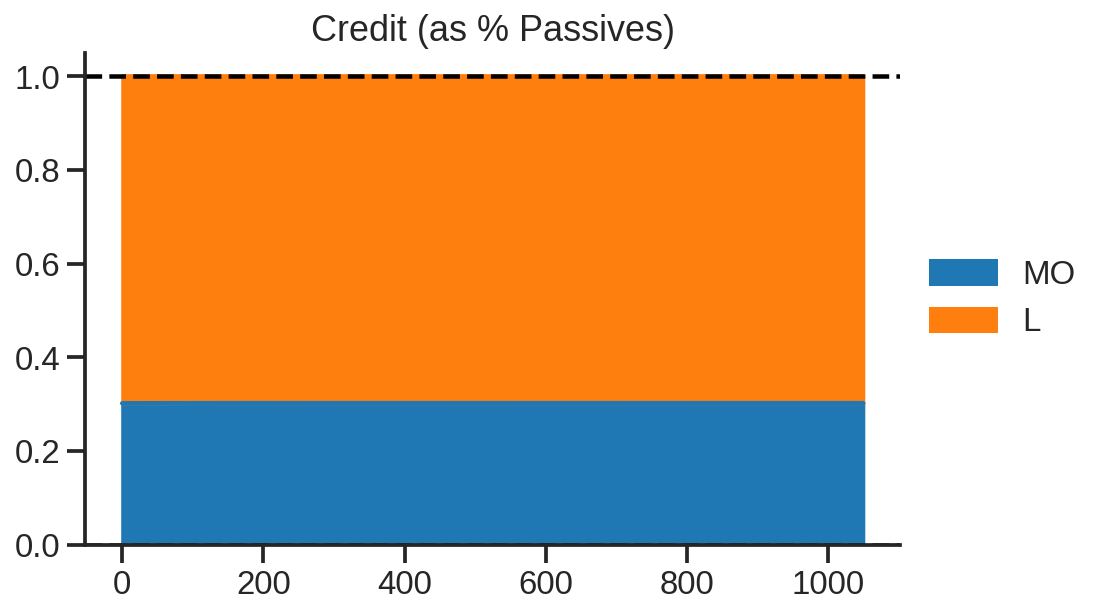

In [13]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='omega', increase=-0.01, time = 1000)
df1=shock
clock_plots(shock = shock, filename = 'Clock_2.svg', variable='omega')
plot_shock(shock = shock, filename = 'Shock_2.svg', df=df)
plot_norms(shock = shock, filename = 'Shock_2Norms.svg', df=df)
other_plots(shock, df)
shock2 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock2.columns = ['$\Delta \omega$']

## Increase in mortgage rates

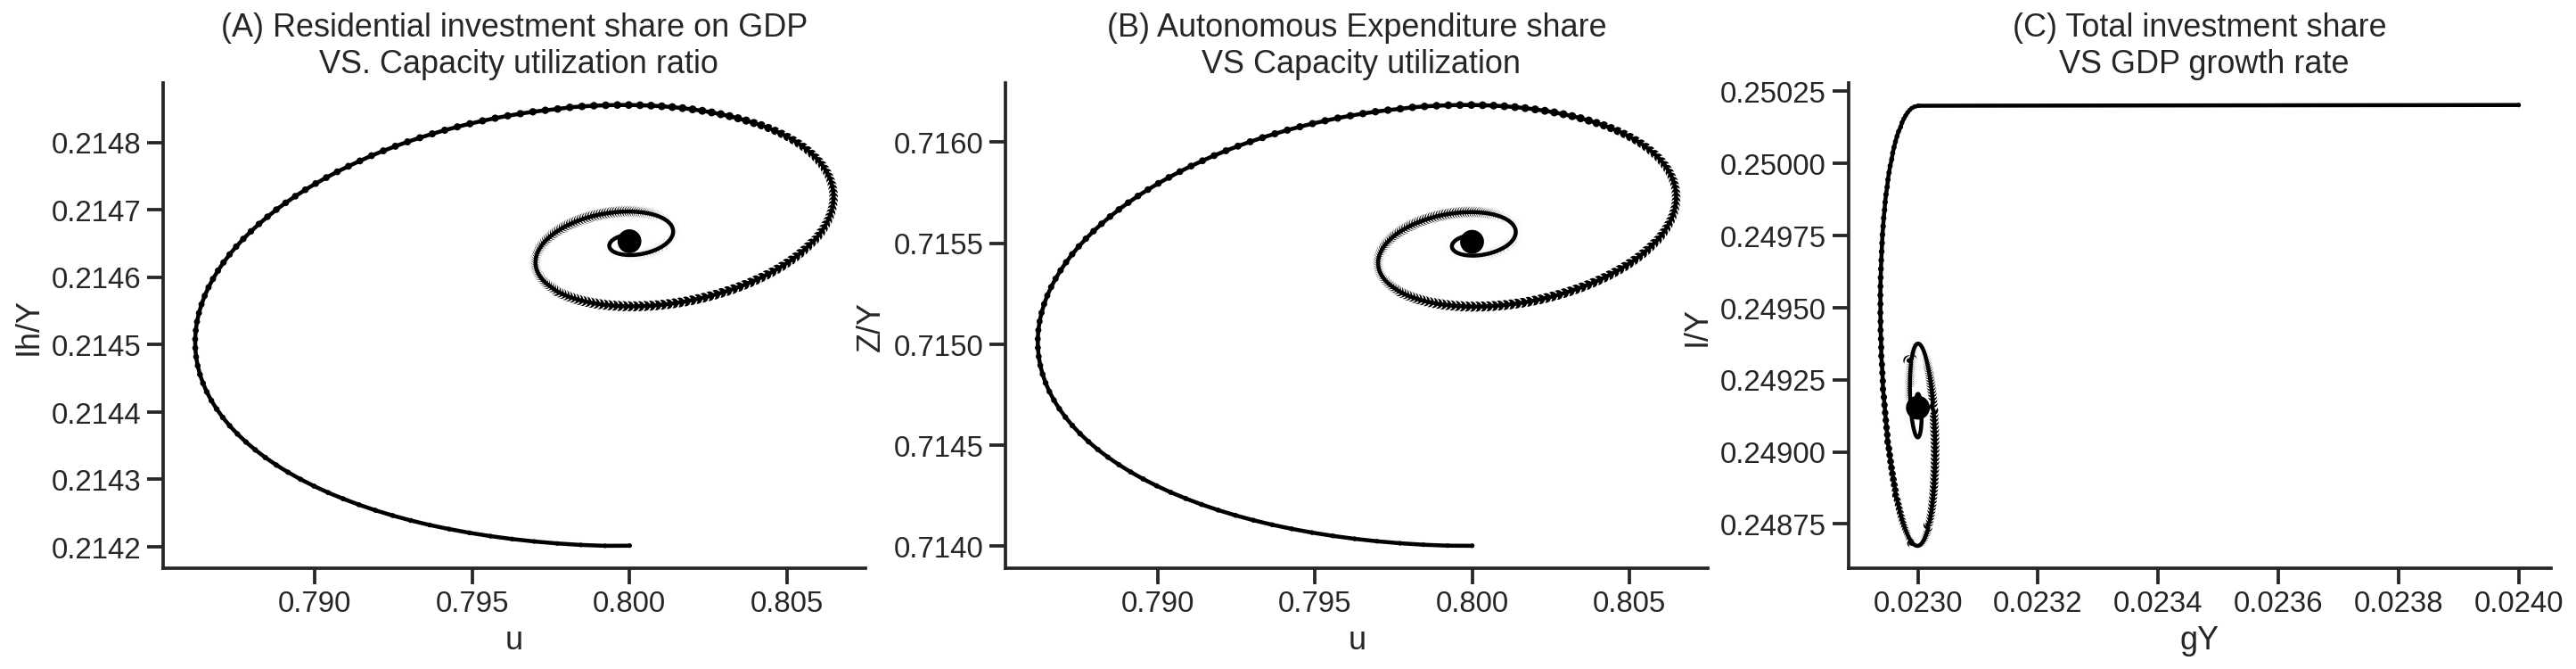

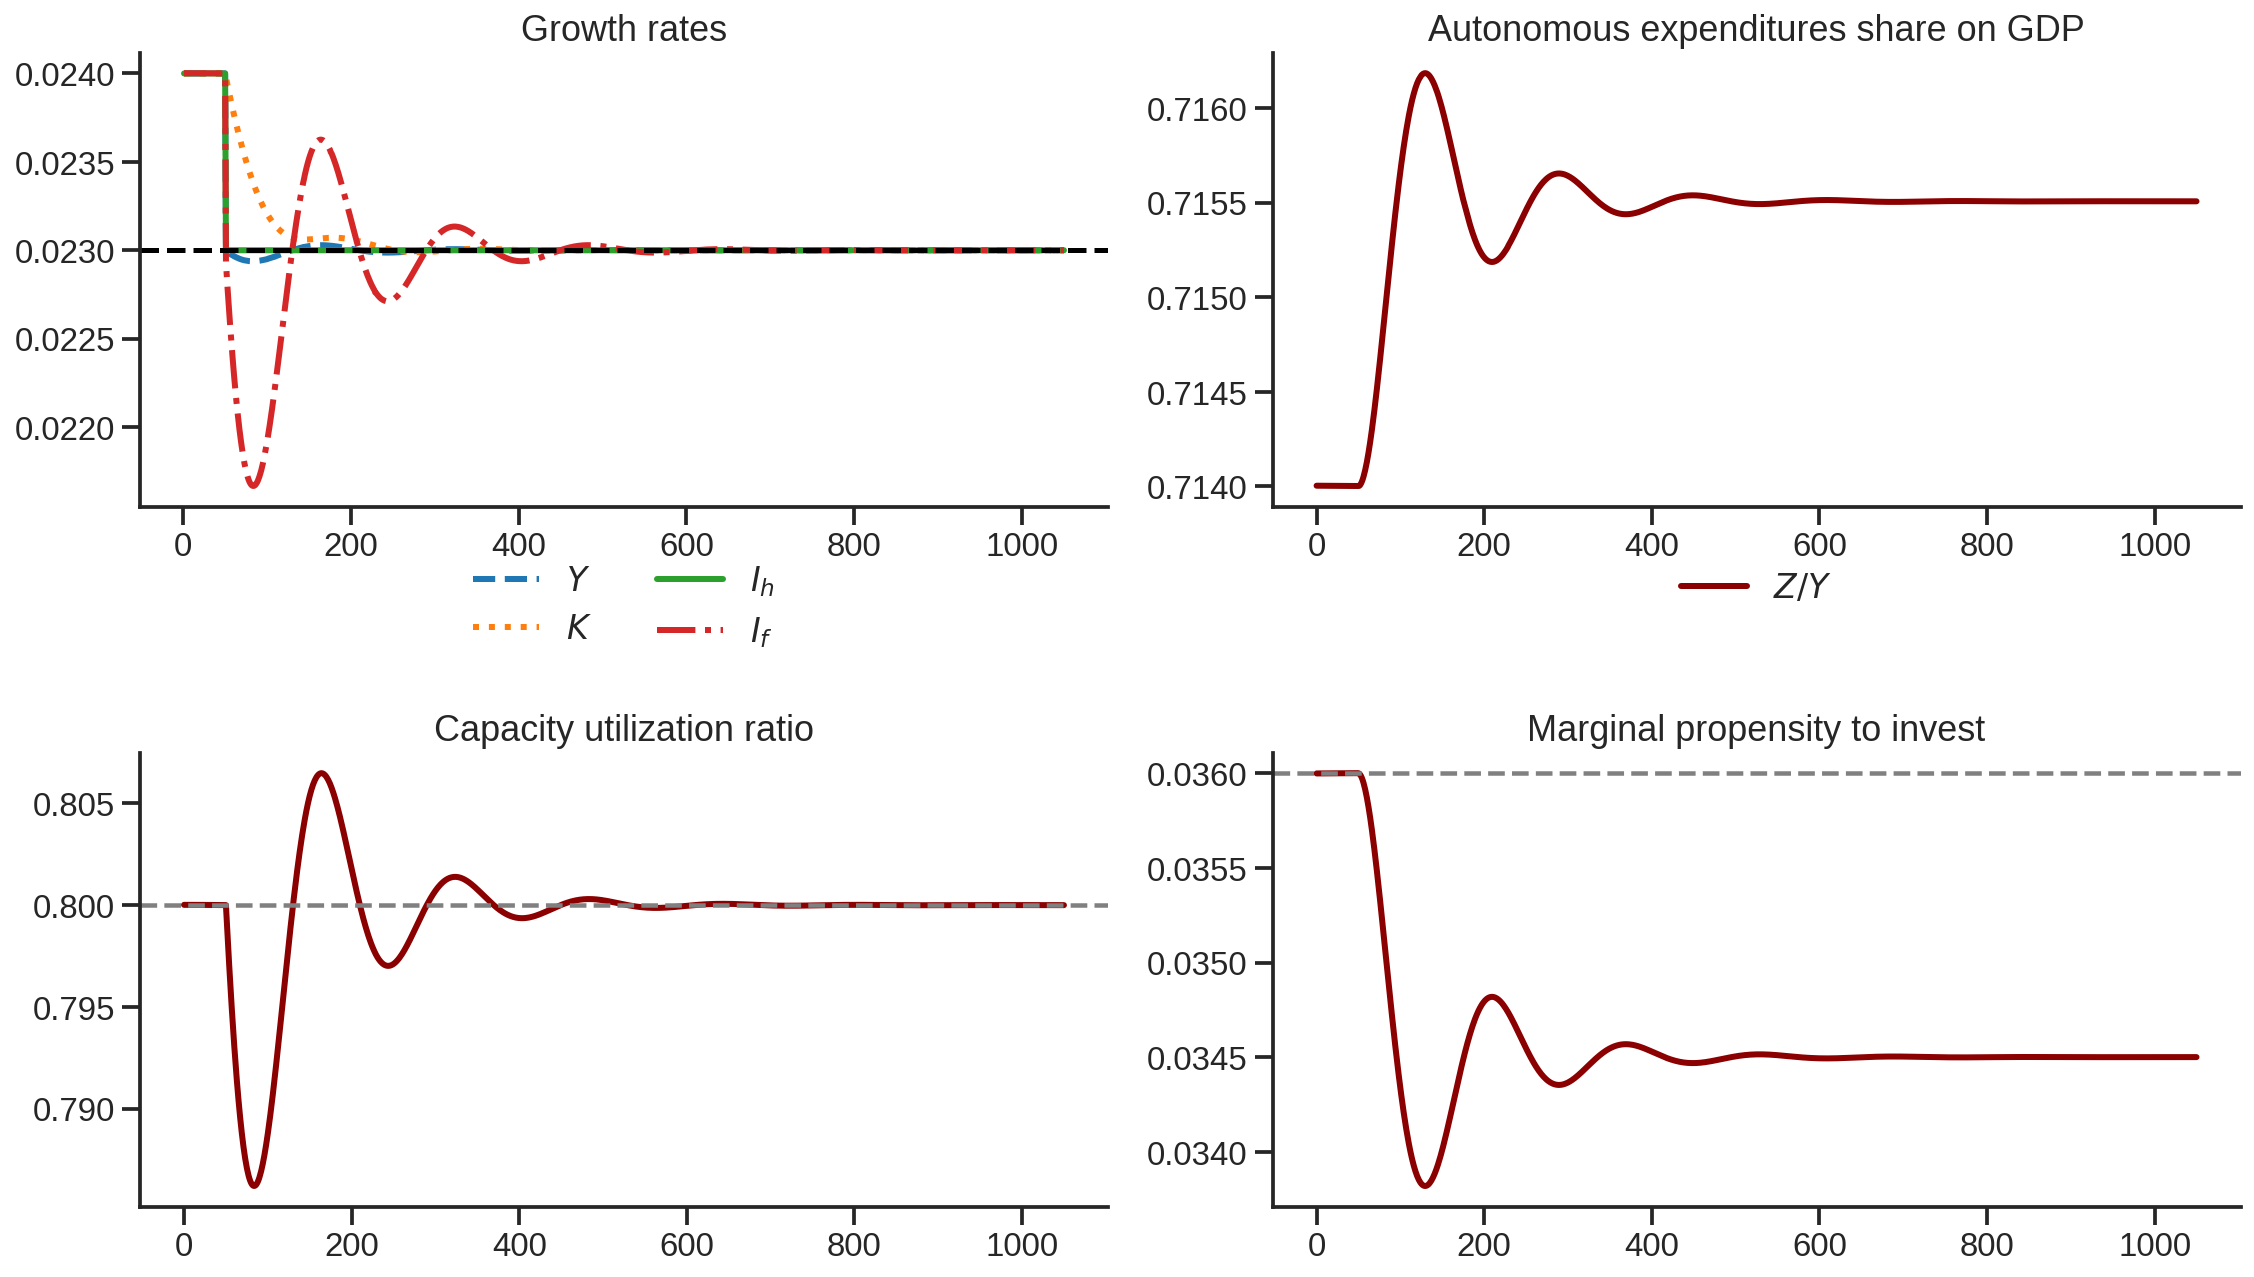

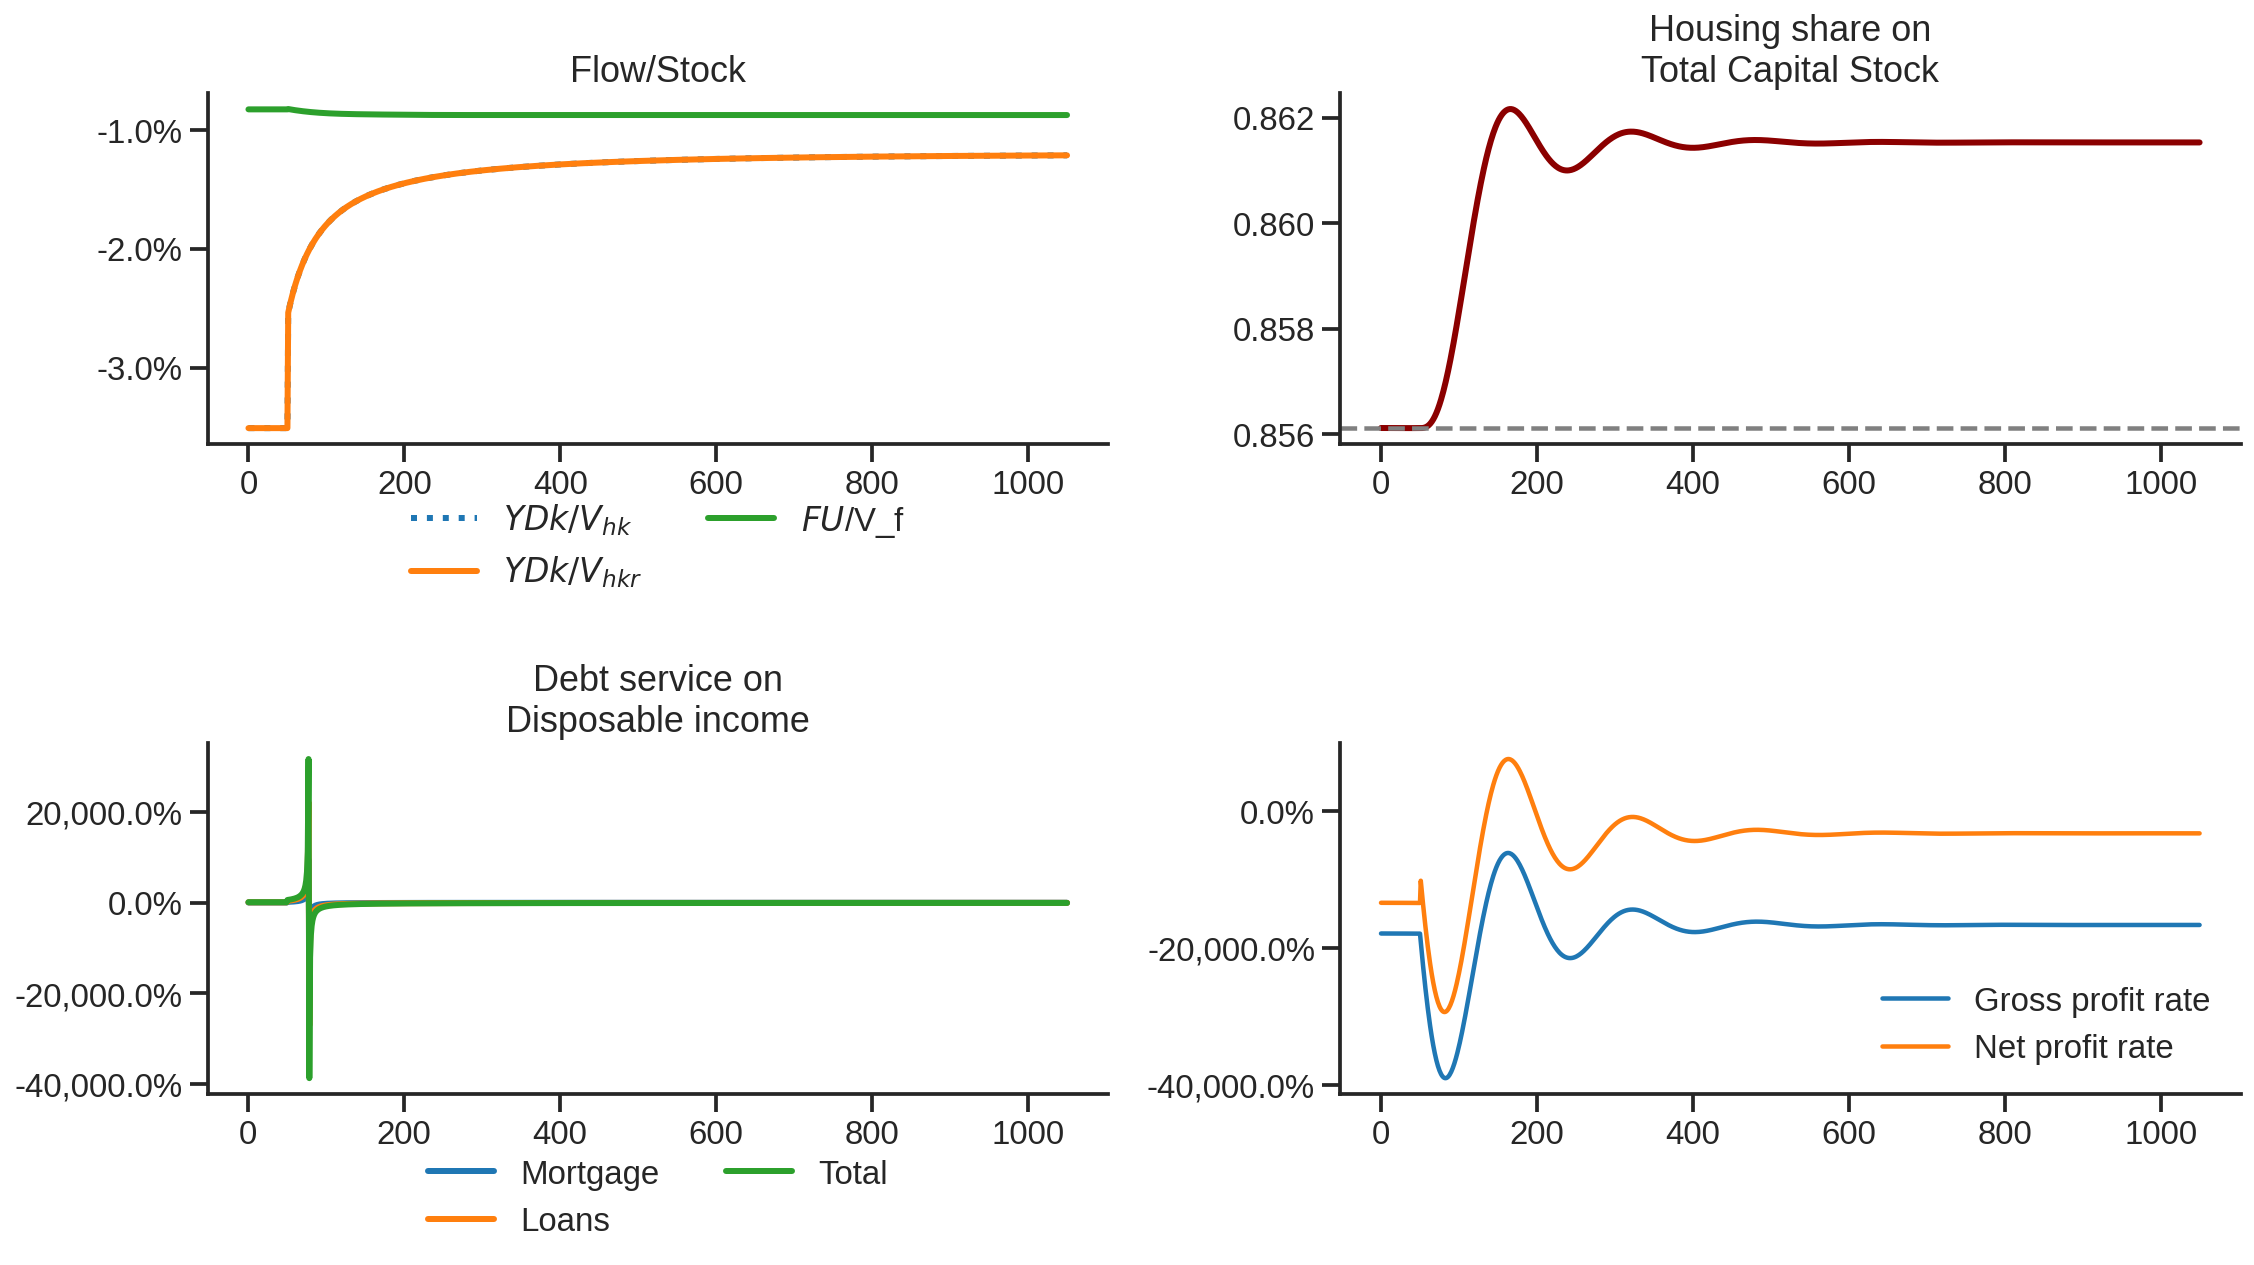

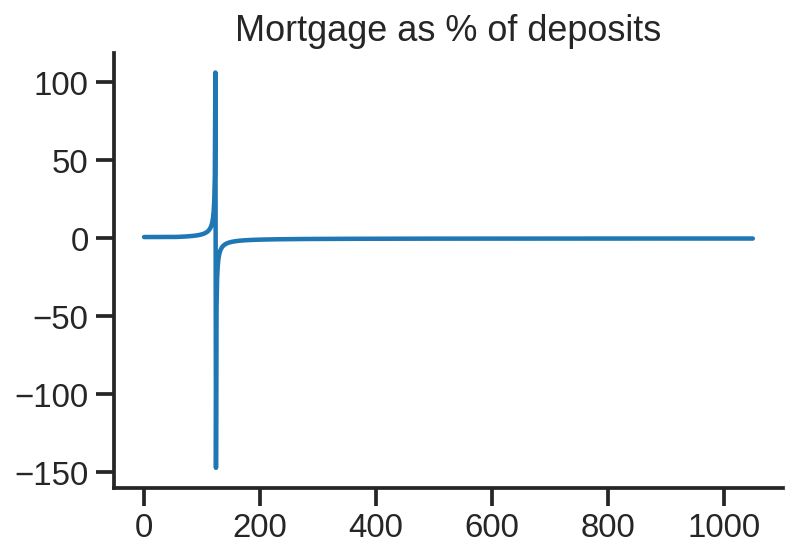

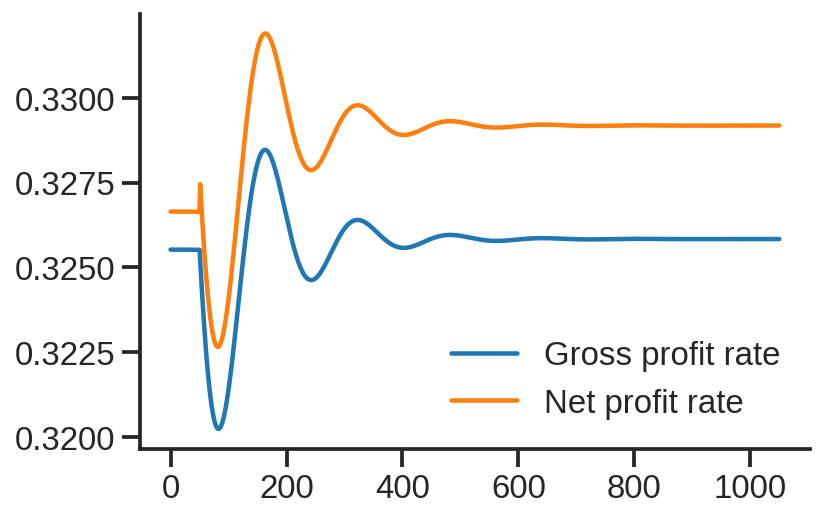

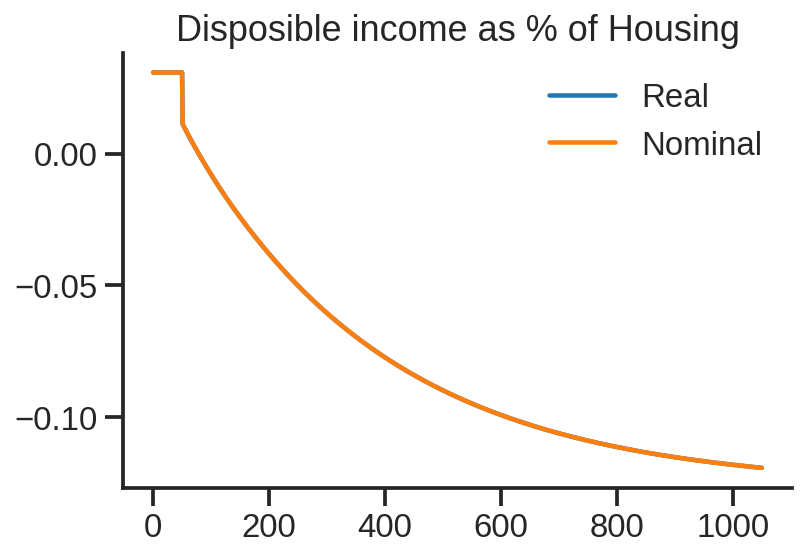

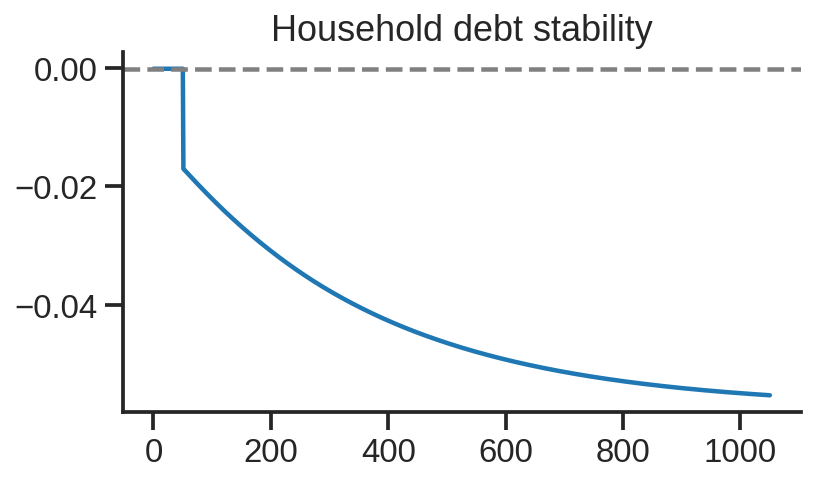

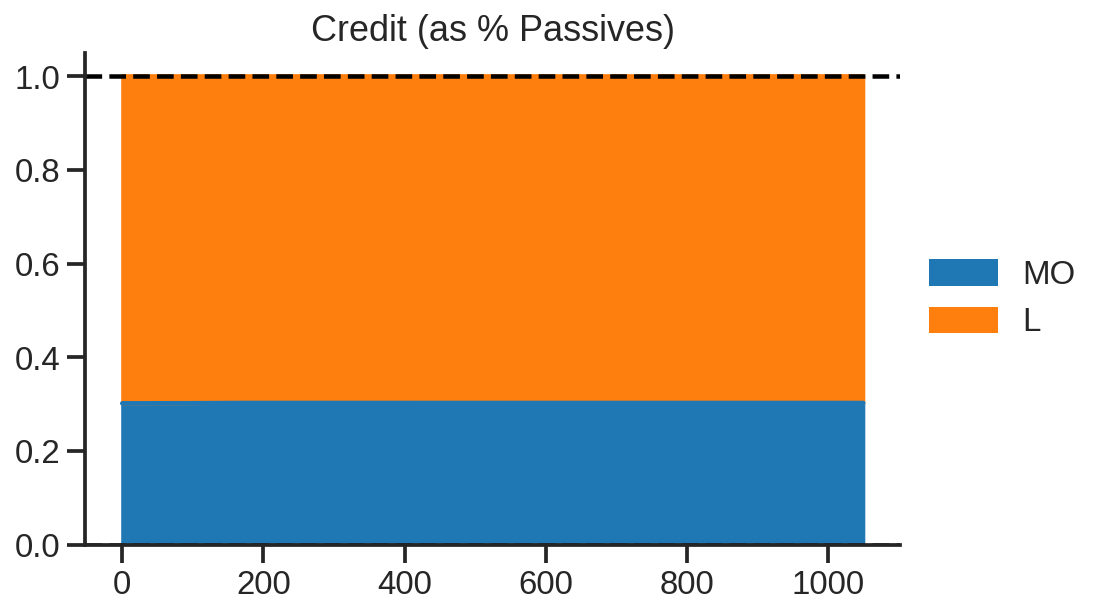

In [14]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='rm', increase=0.01, time = 1000)
df3=shock
shock3 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock3.columns = ['$\Delta rm$']
clock_plots(shock = shock, filename = 'Clock_3.svg', variable='rmo')
plot_shock(shock = shock, filename = 'Shock_3.svg', df=df)
plot_norms(shock = shock, filename = 'Shock_3Norms.svg', df=df)
other_plots(shock, df=df)

## Increase in inflation

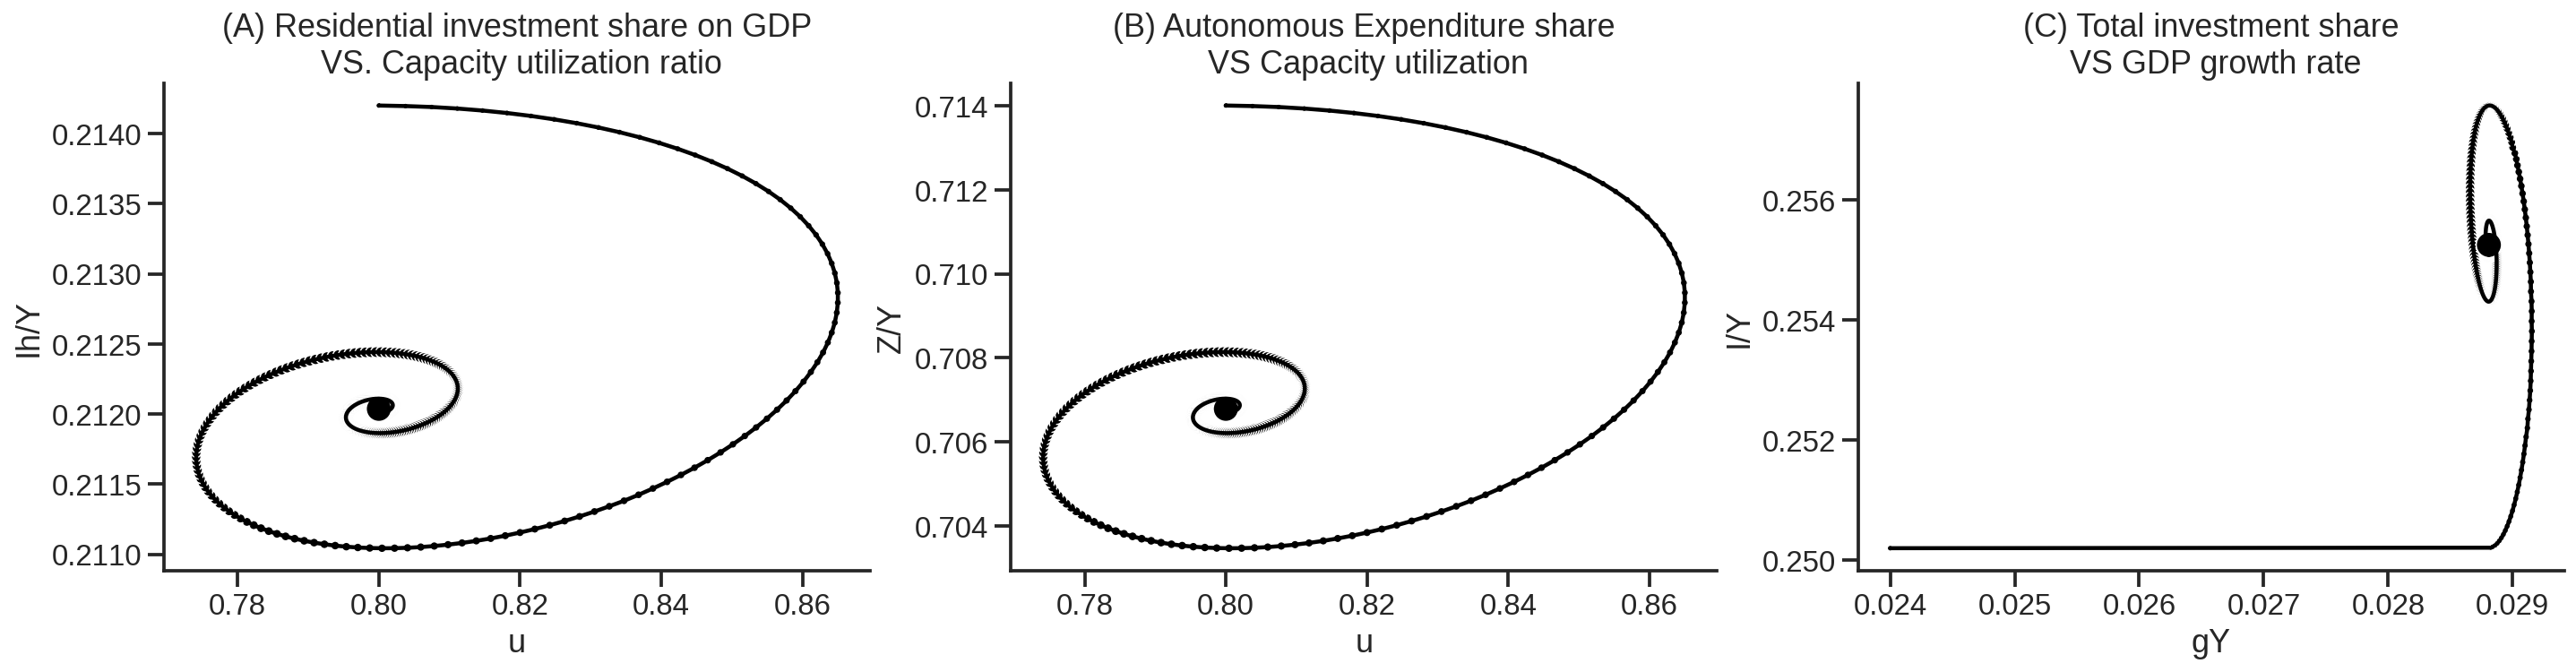

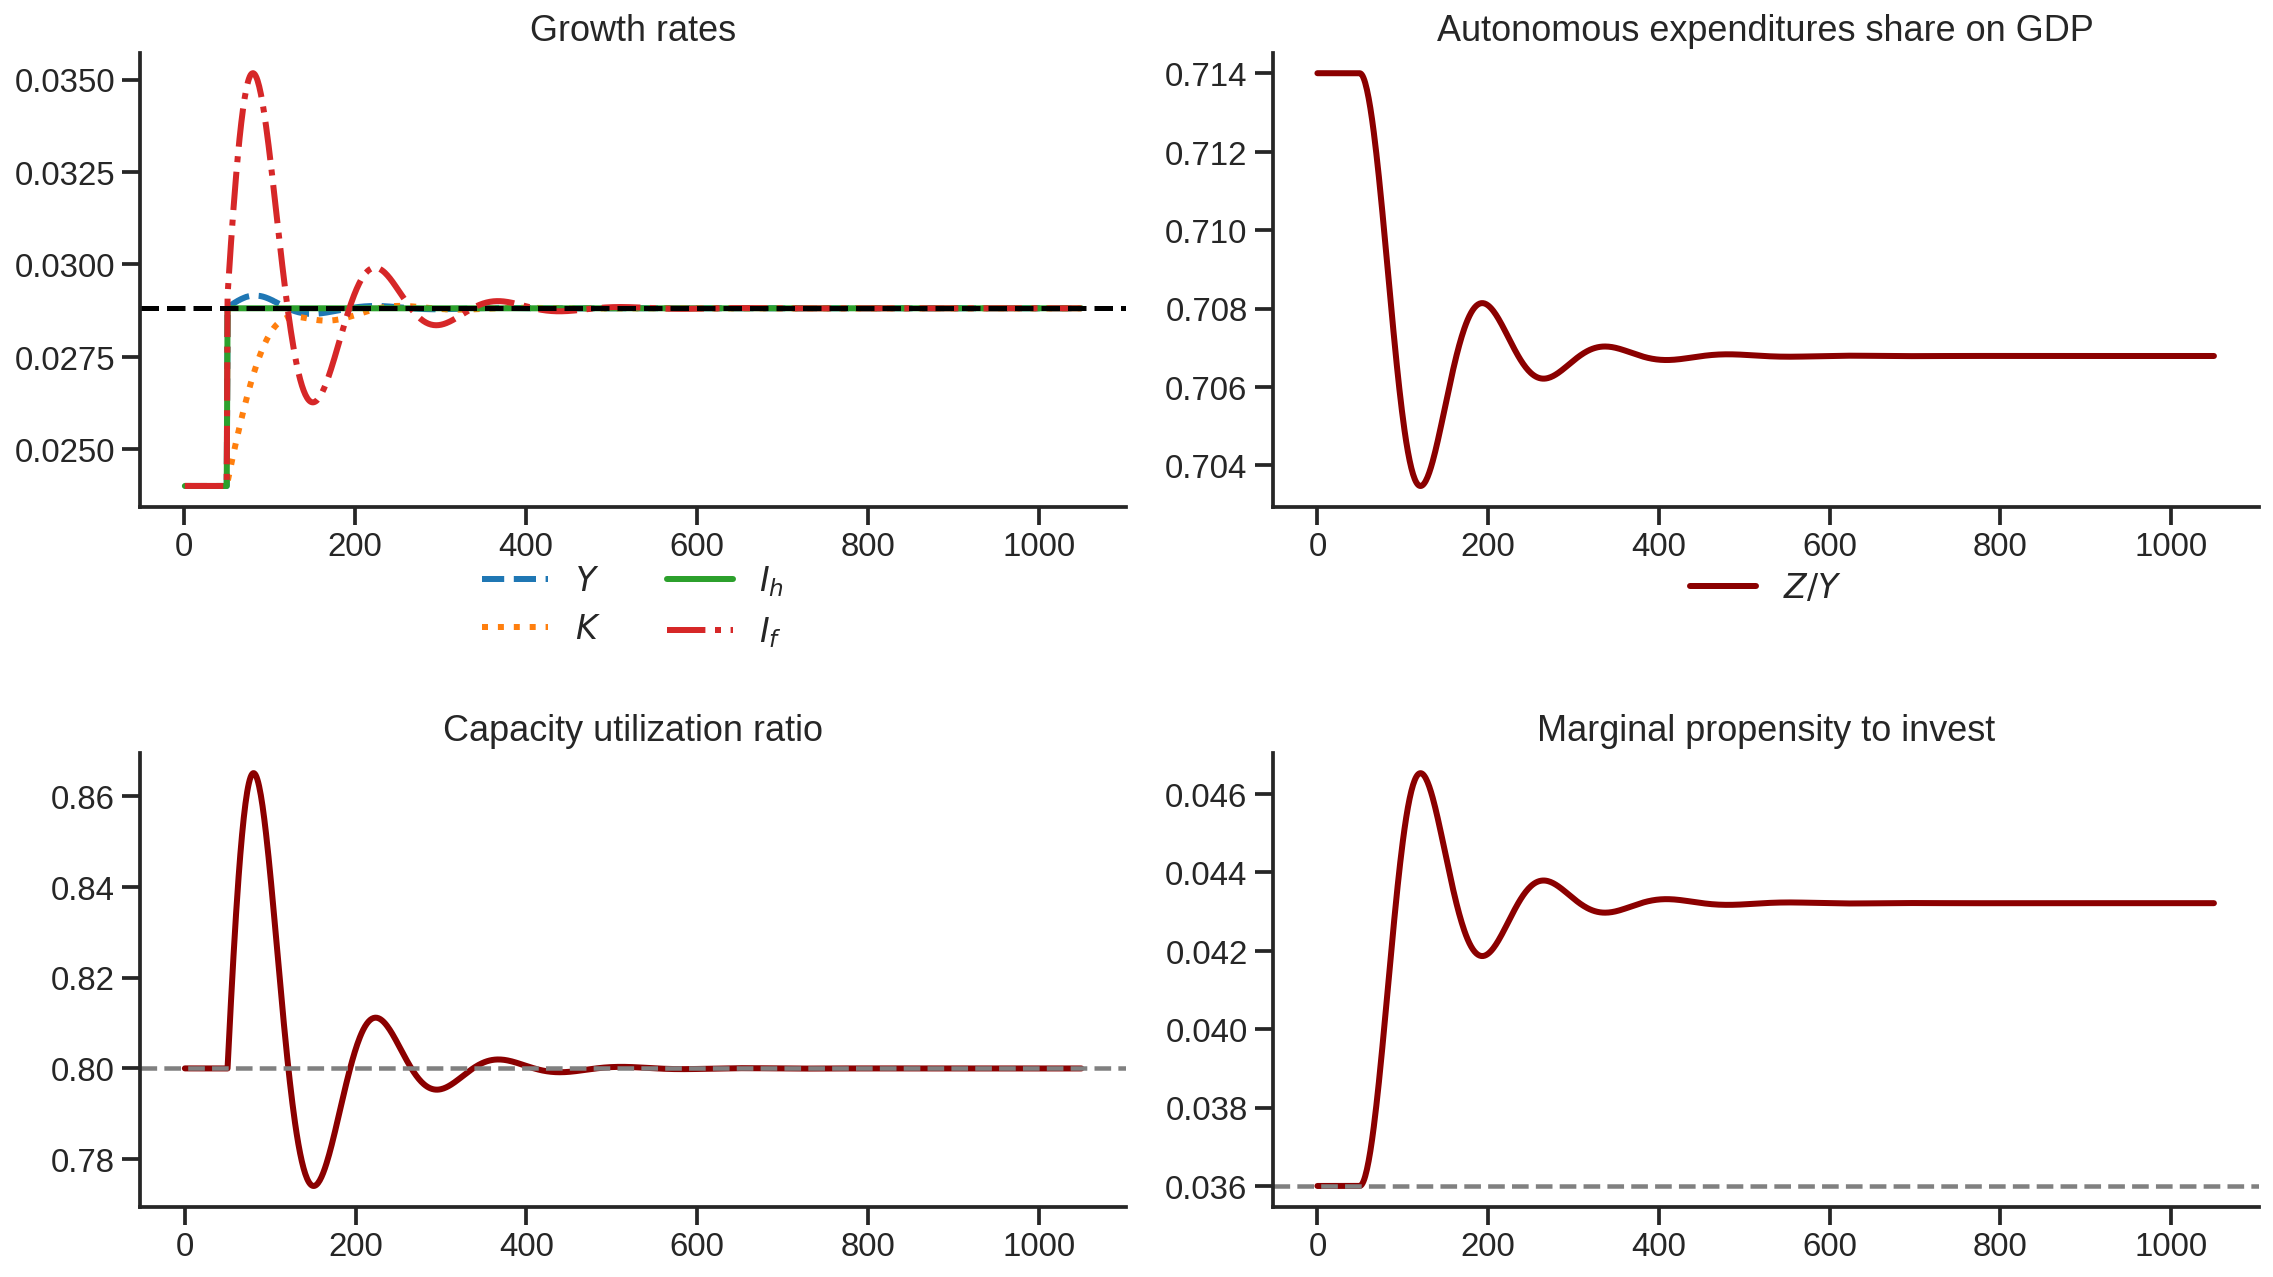

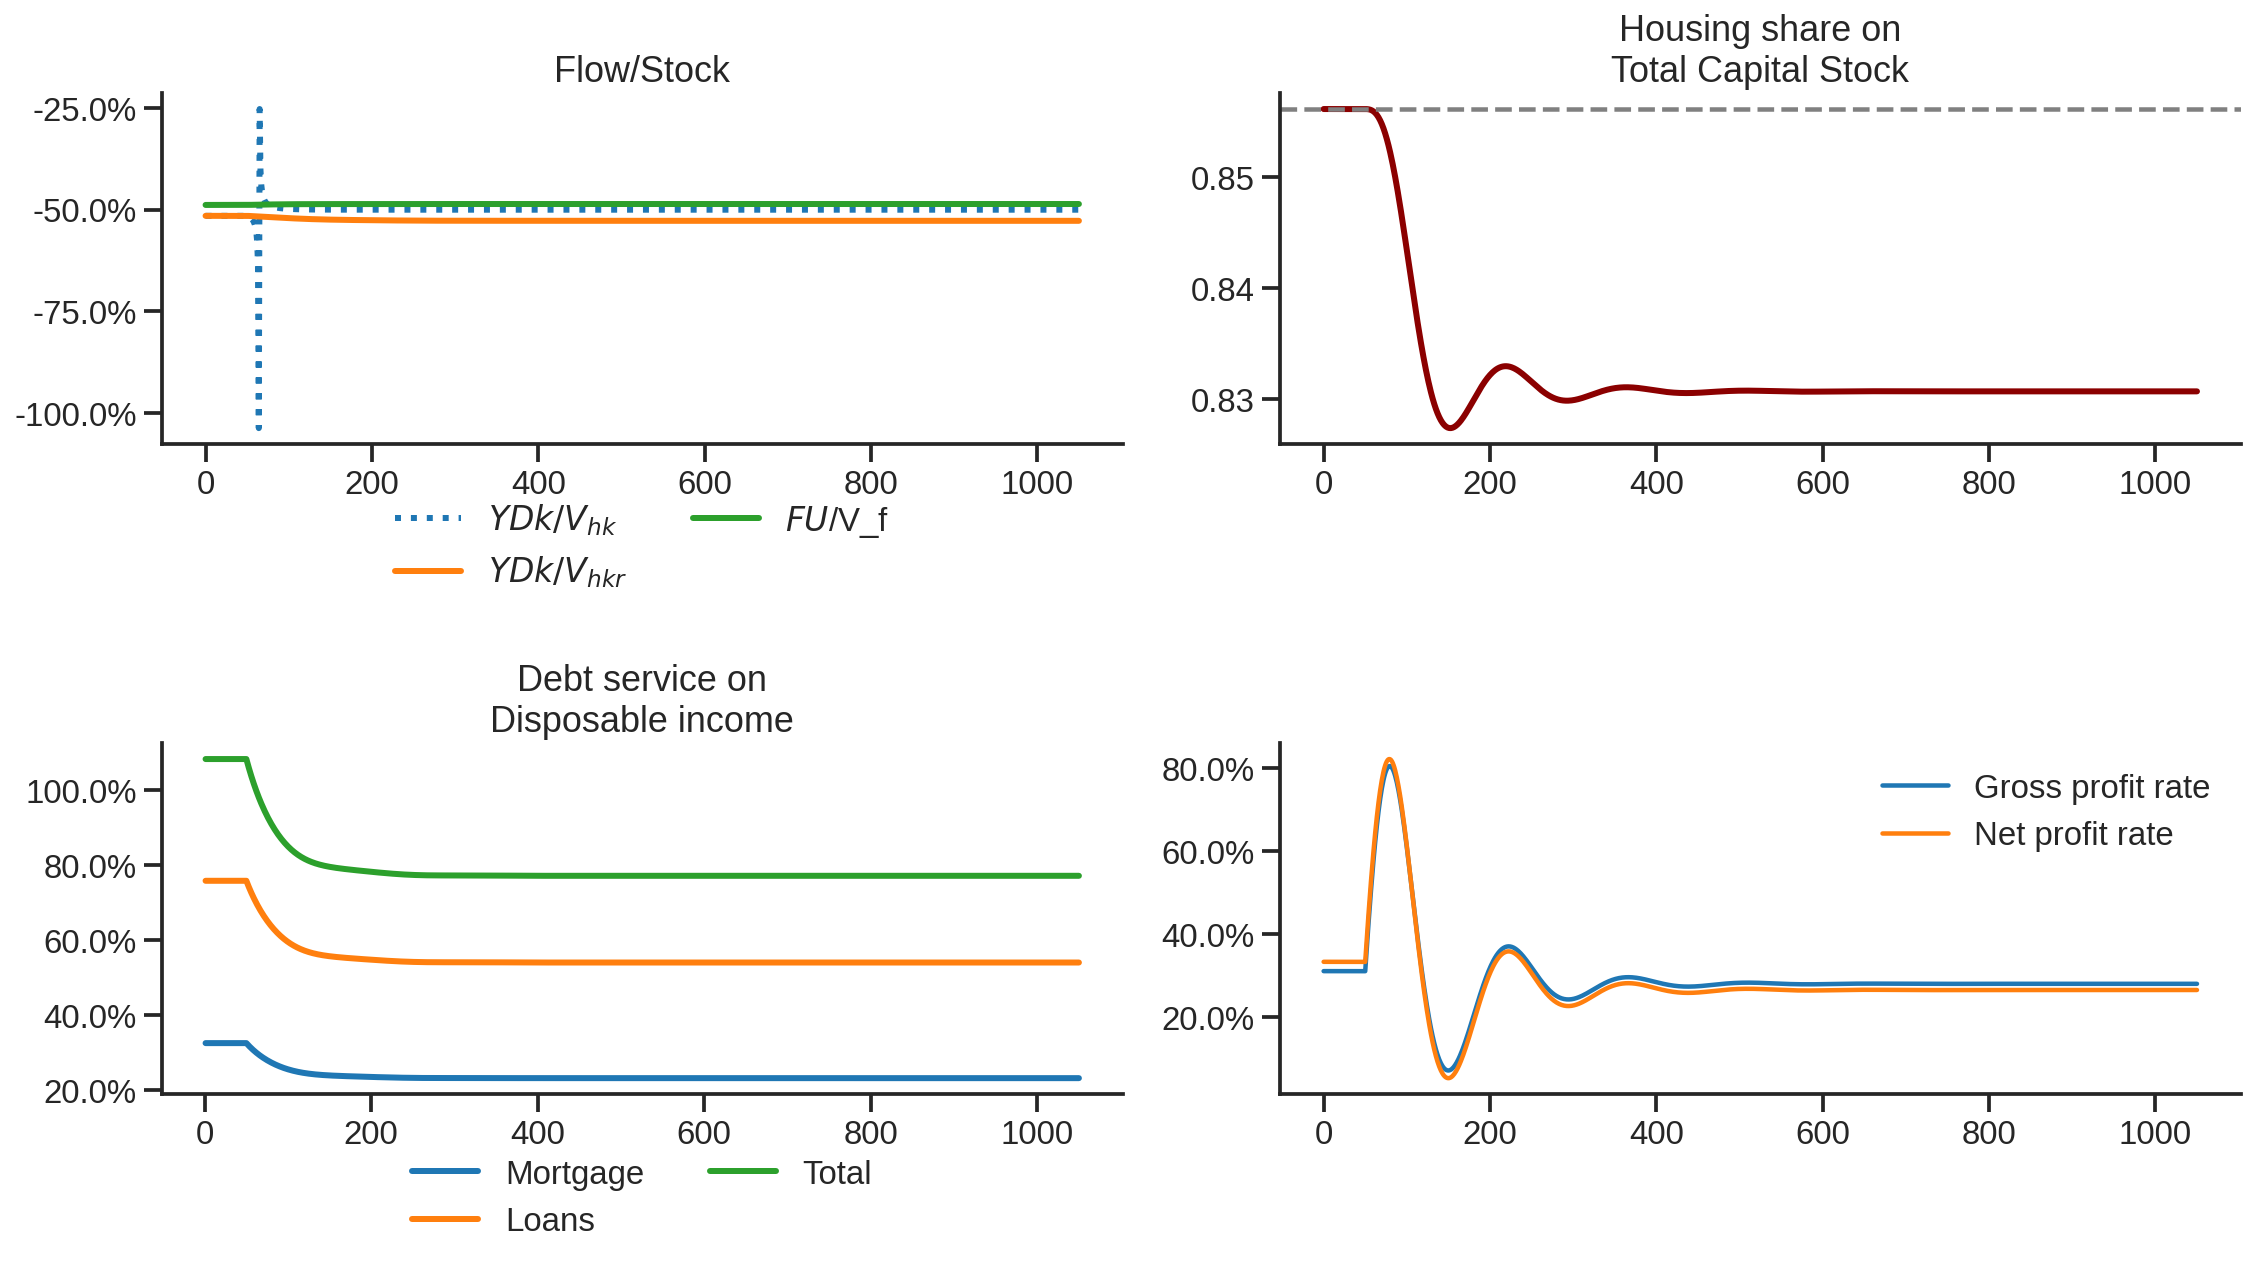

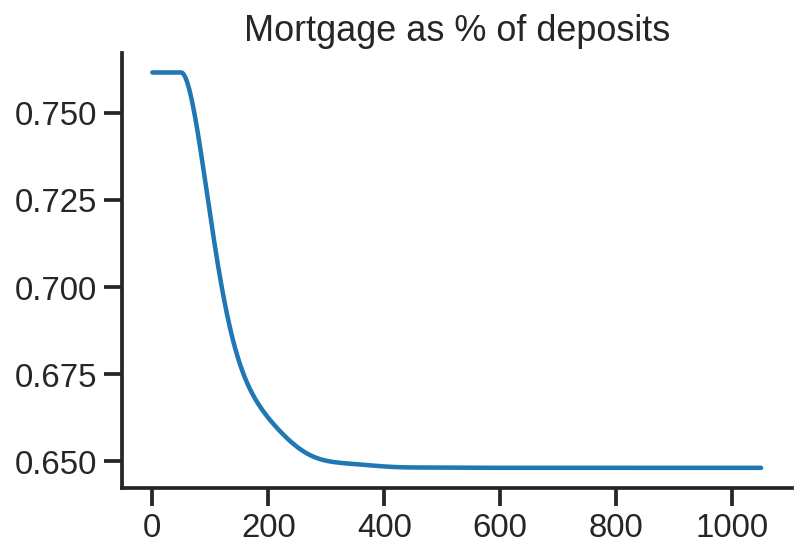

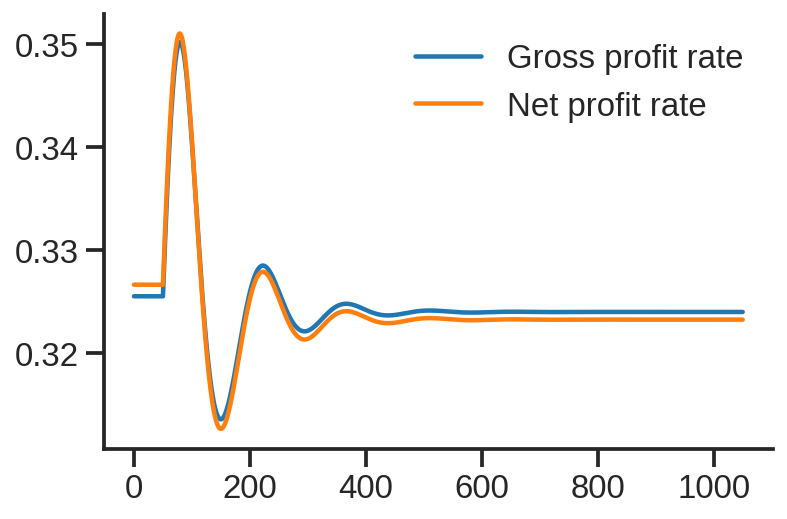

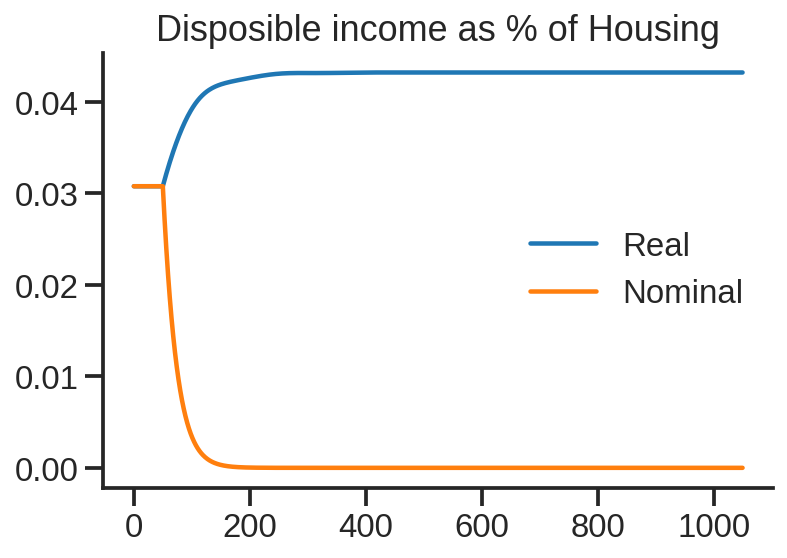

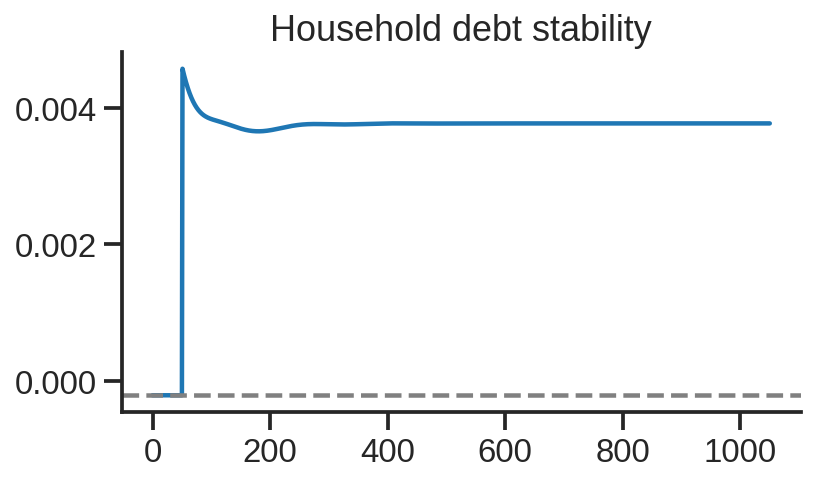

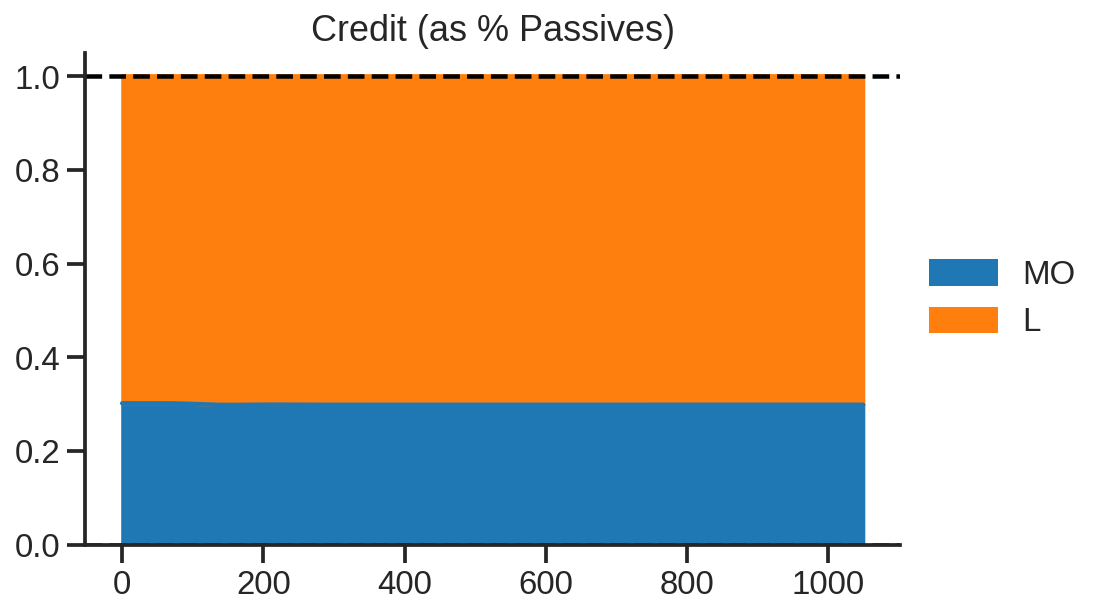

In [15]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='infla', increase=0.05, time = 1000)
df2=shock
clock_plots(shock = shock, filename = 'Clock_4.svg', variable='infla')
plot_shock(shock = shock, filename = 'Shock_4.svg', df=df)
plot_norms(shock = shock, filename = 'Shock_4Norms.svg', df=df)
other_plots(shock, df=df)

shock4 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock4.columns = ['$\pi$']

## Increase in Loans interest rates

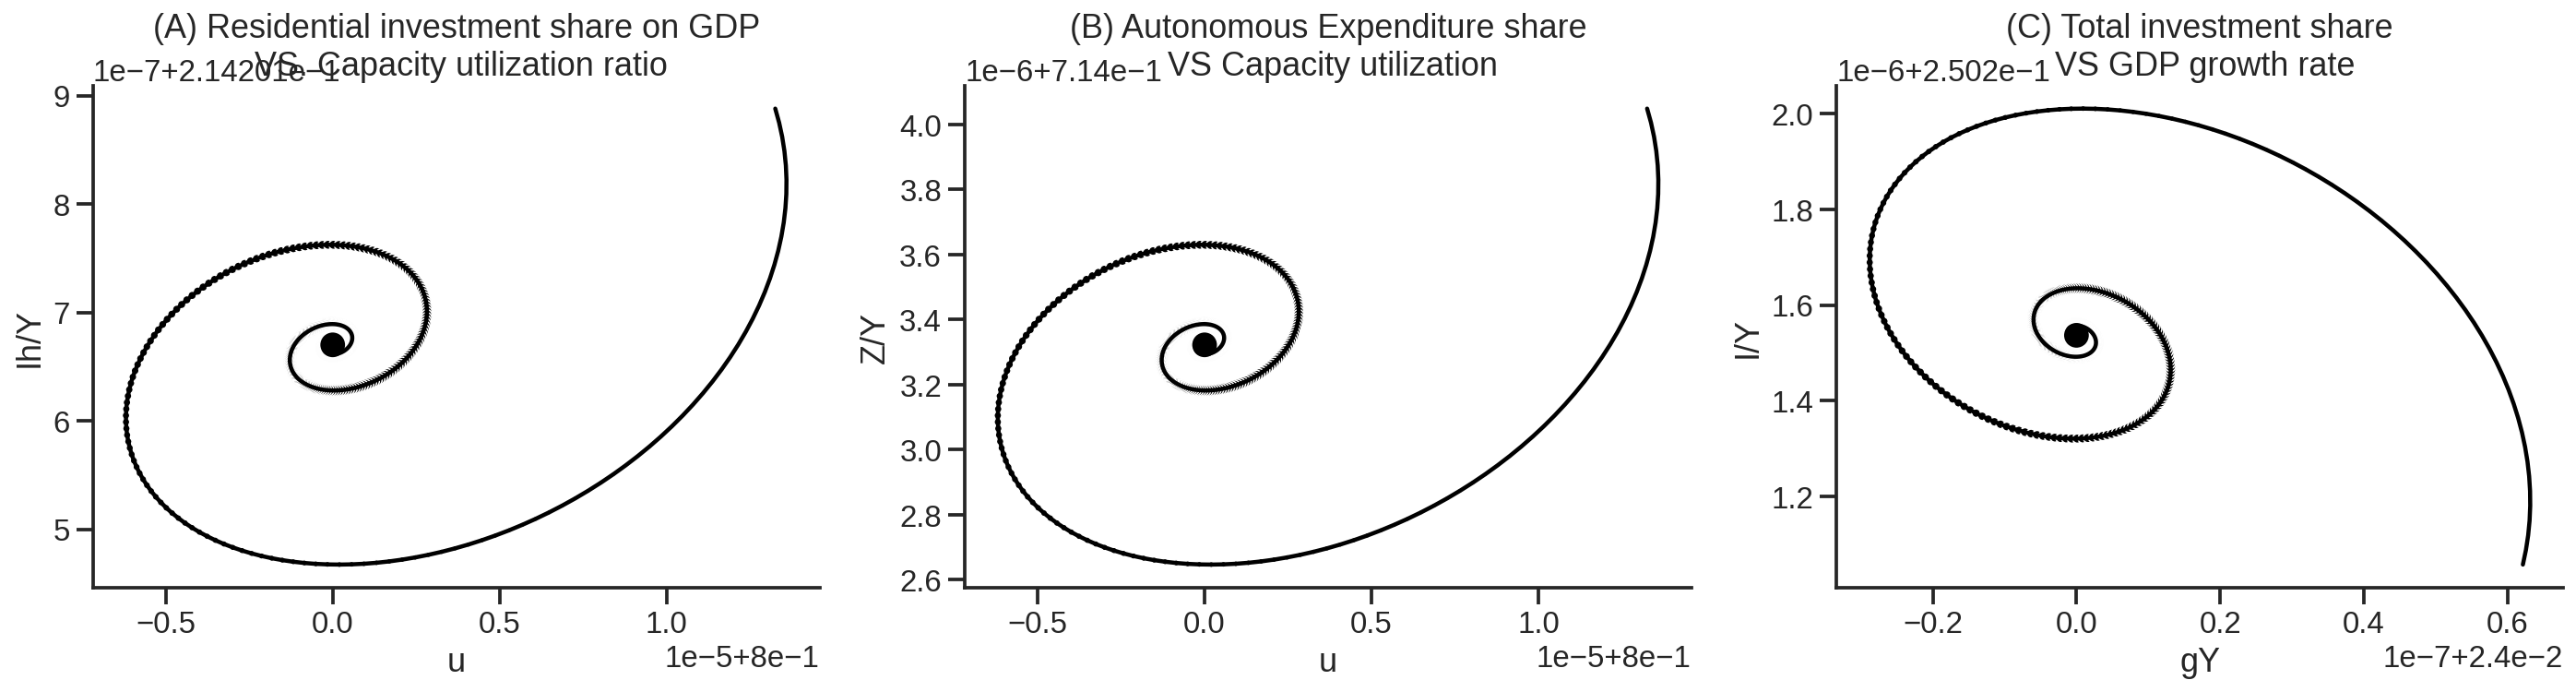

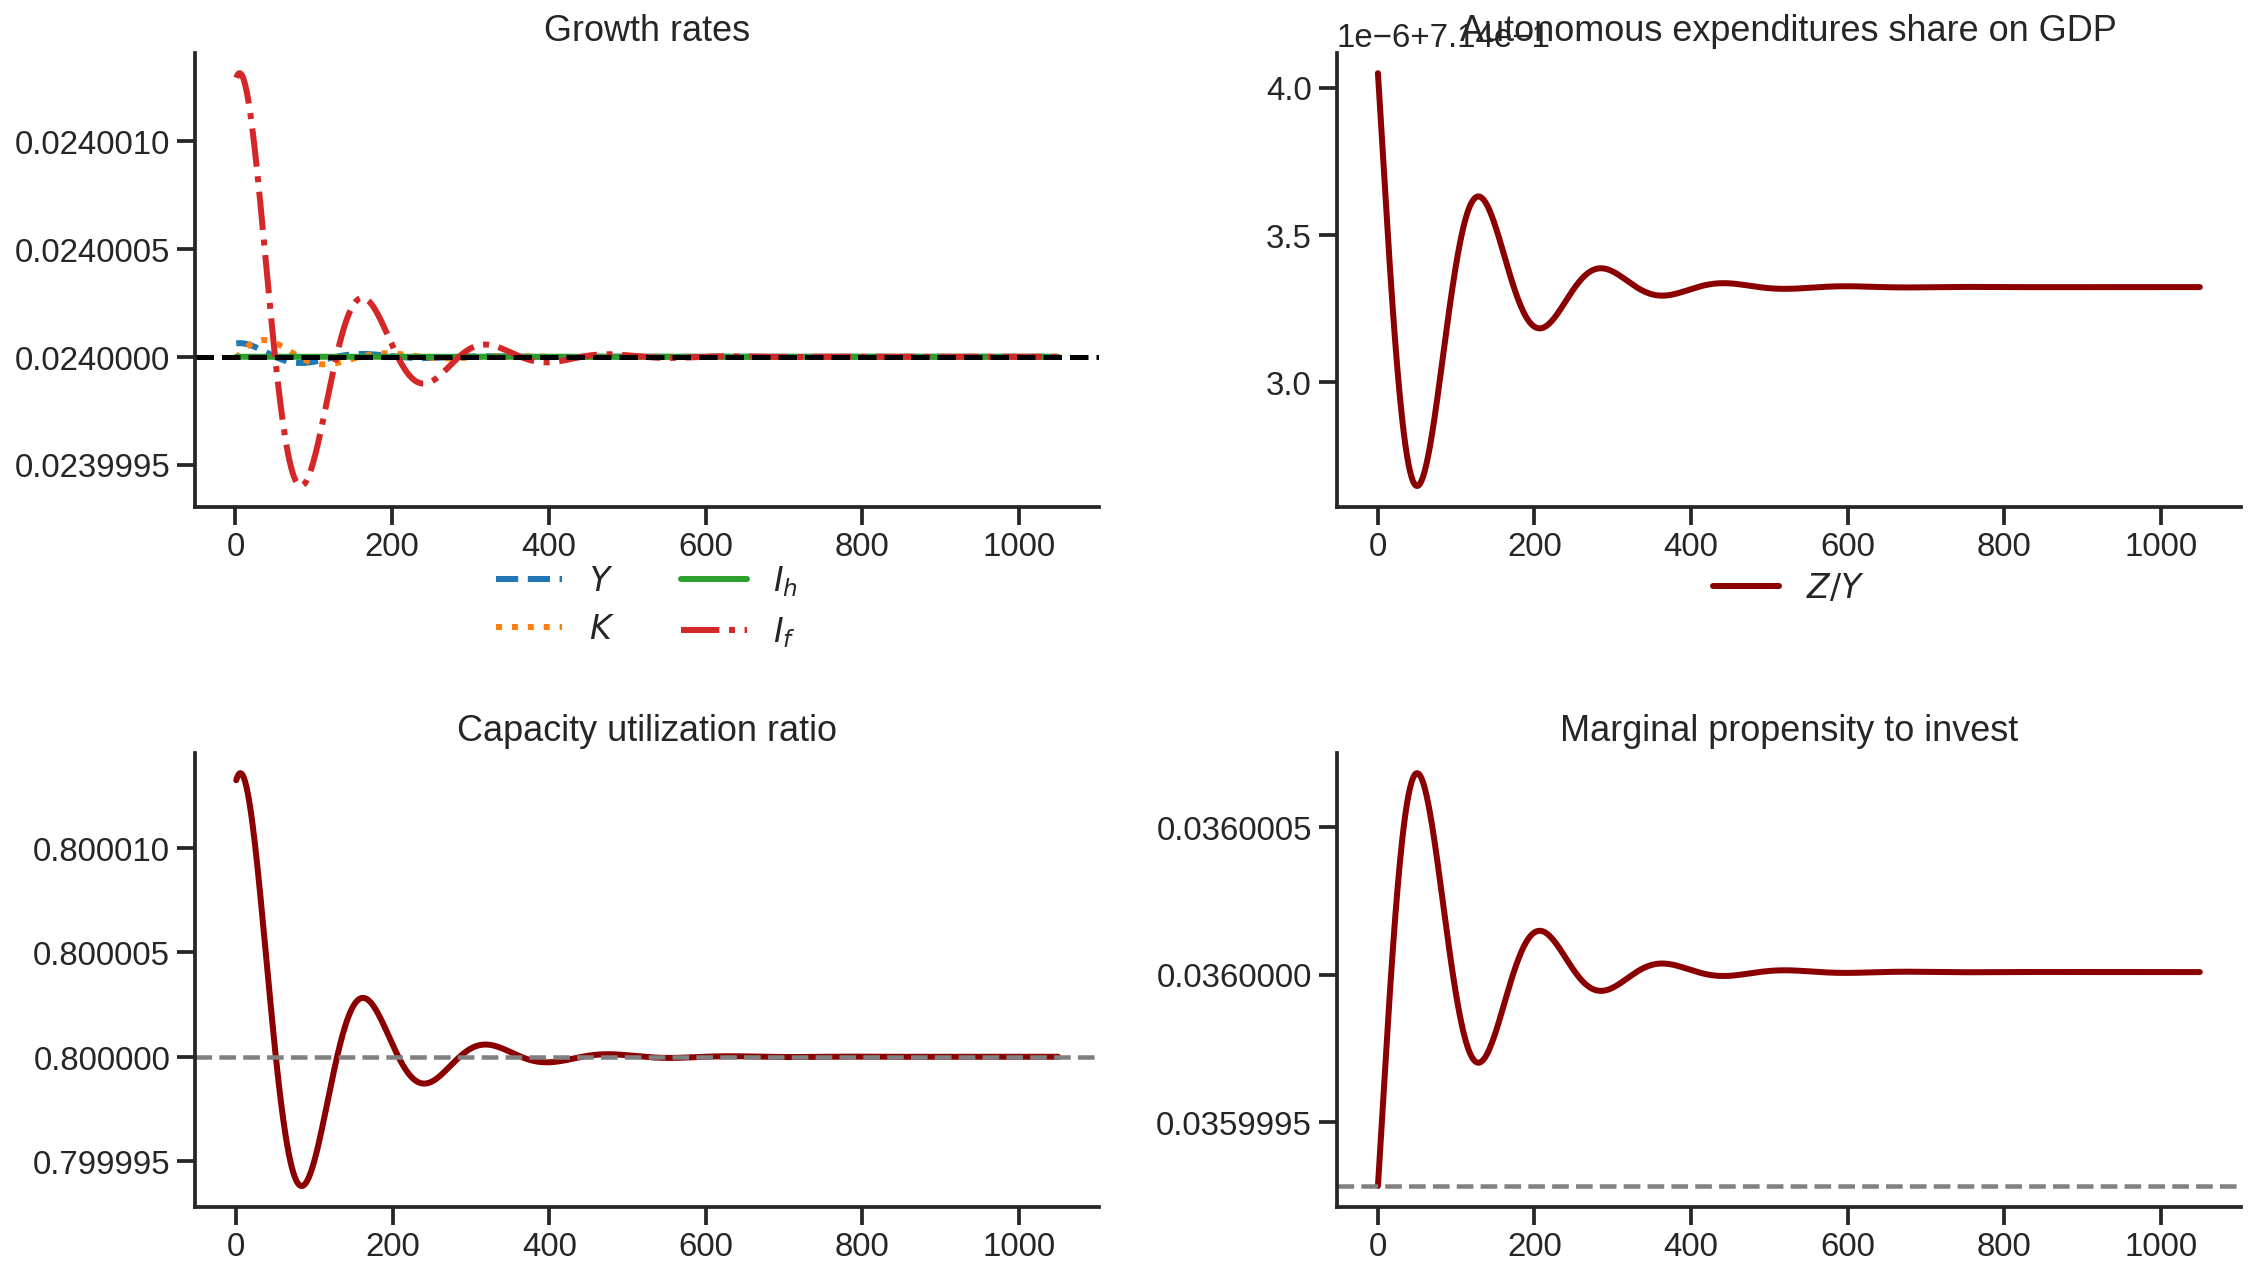

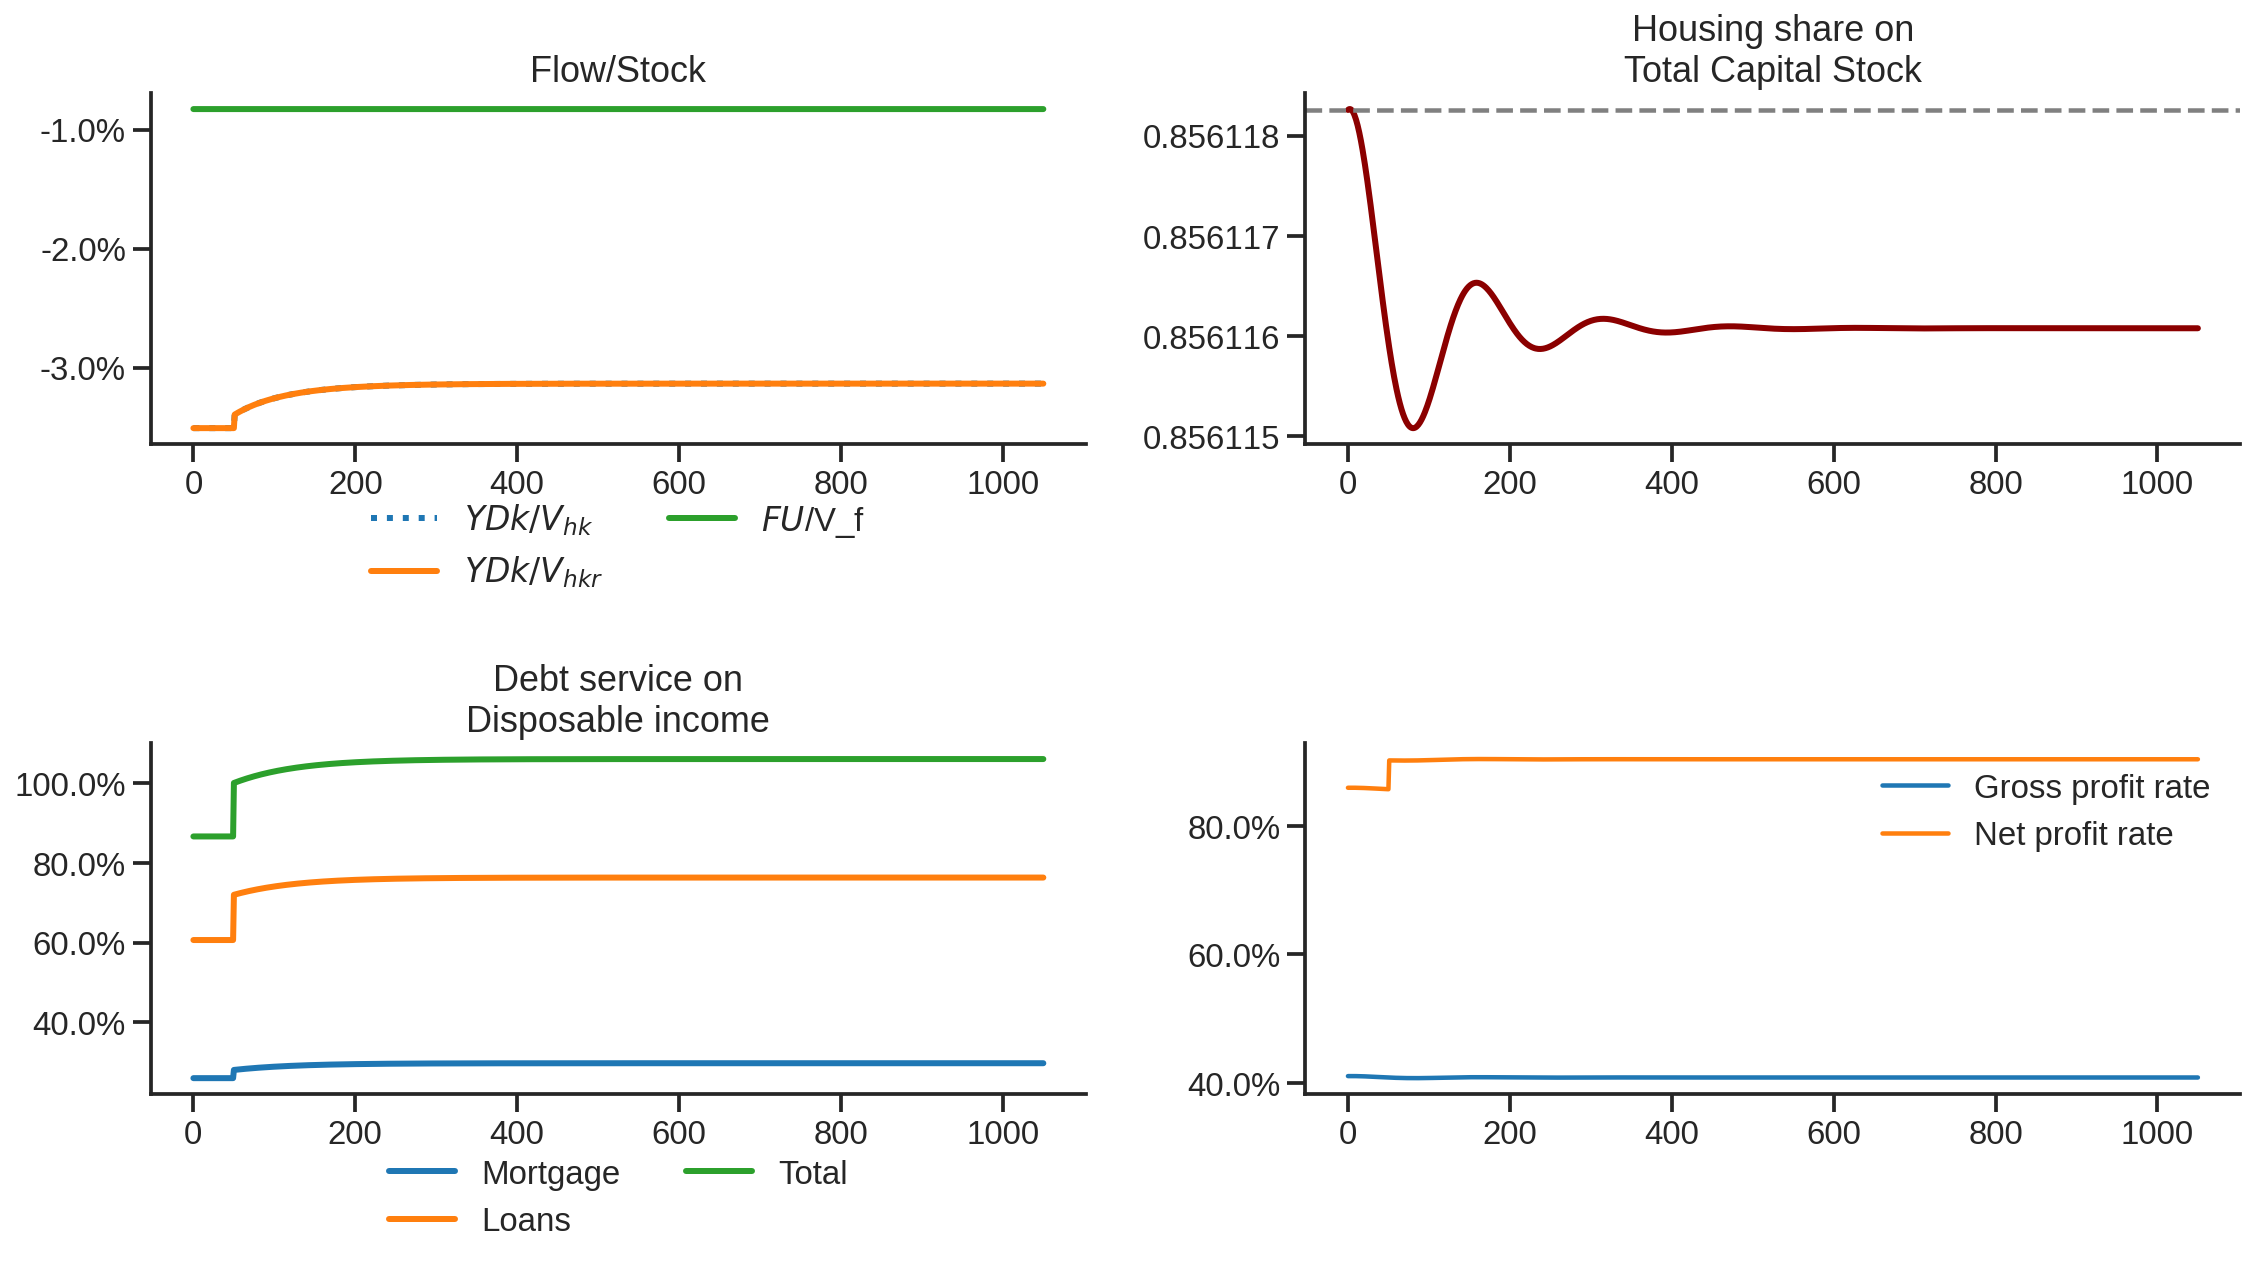

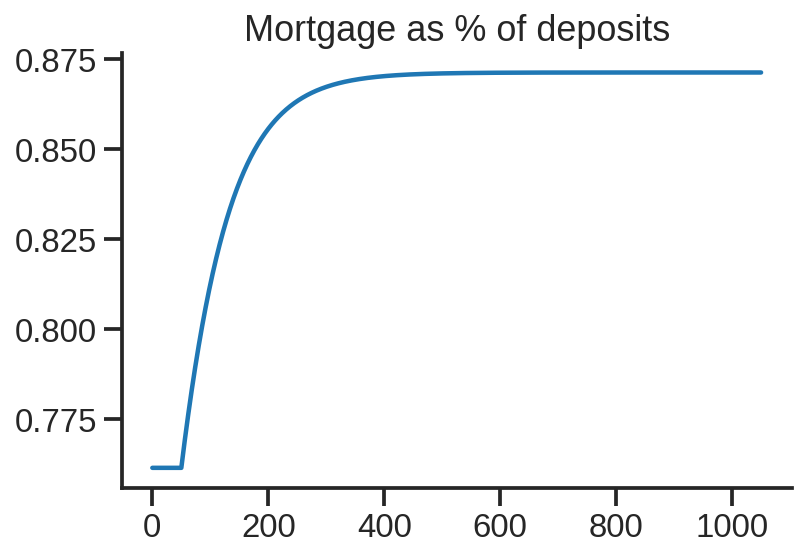

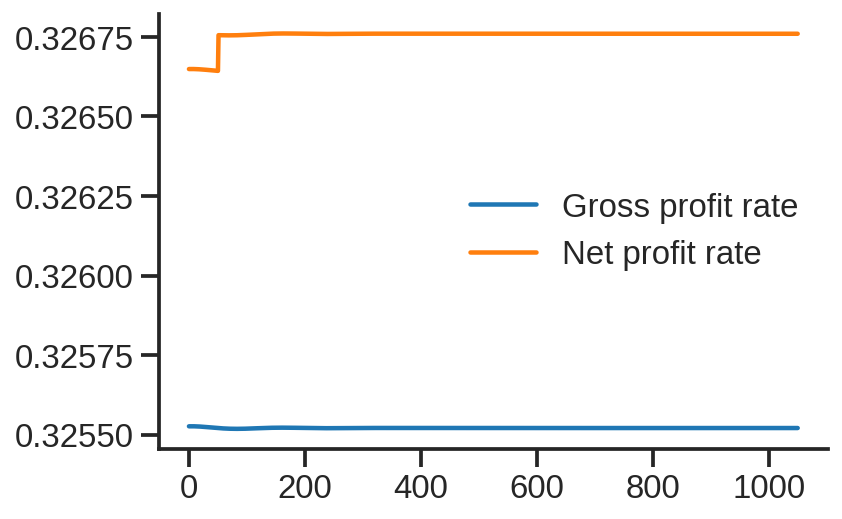

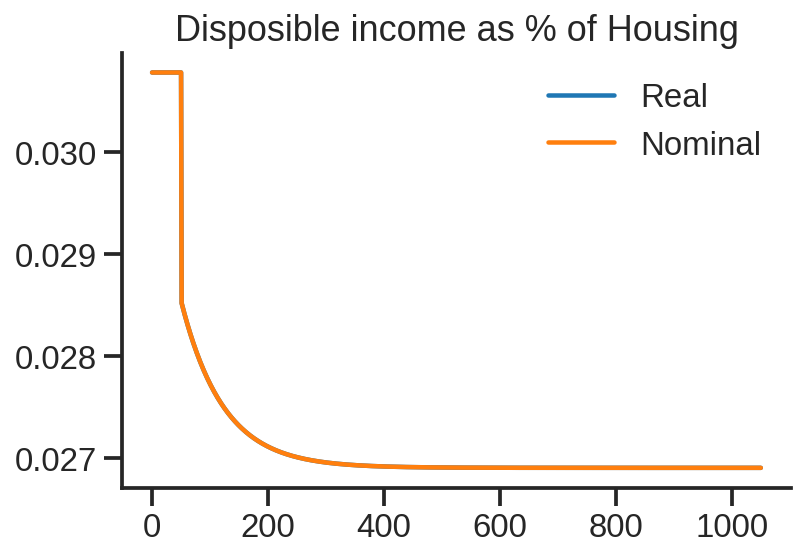

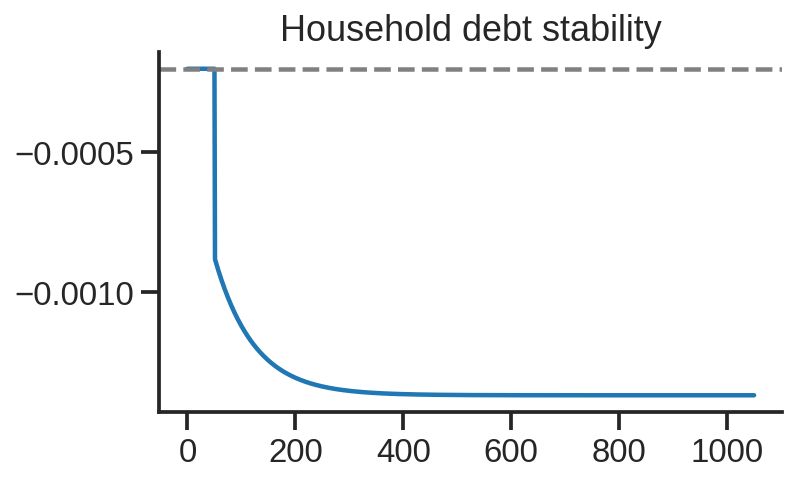

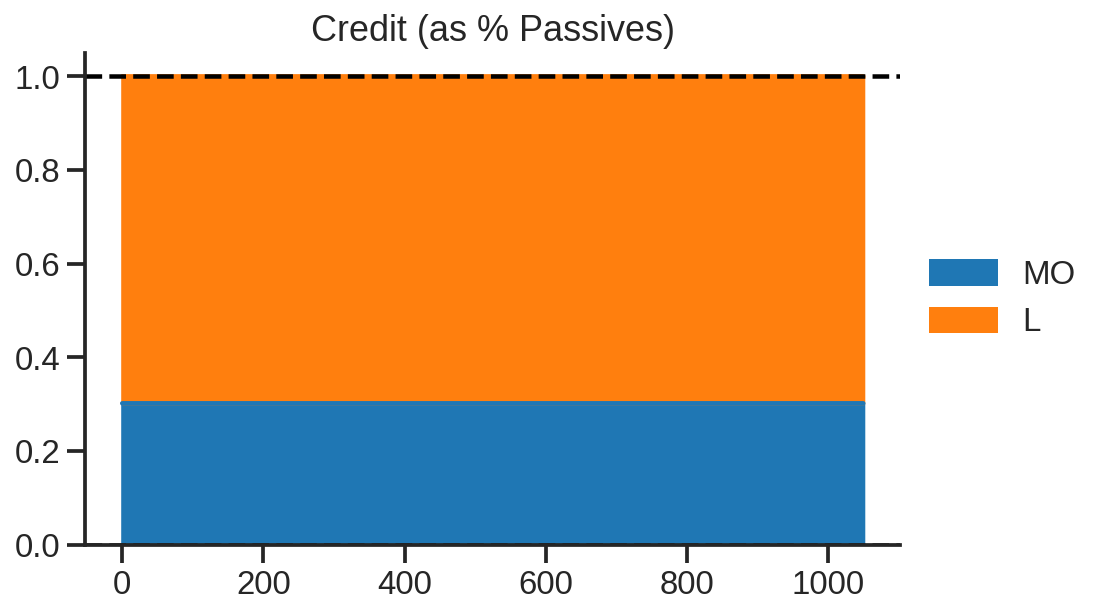

In [17]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='spread_l', increase=0.1, time = 1000)
shock5 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock5.columns = ['$\Delta rl$']
clock_plots(shock = shock, filename = 'Clock_5.svg', variable='rmo')
plot_shock(shock = shock, filename = 'Shock_5.svg', df=df)
plot_norms(shock = shock, filename = 'Shock_5Norms.svg', df=df)
other_plots(shock, df=df)

# Merging tables

In [18]:
base = model()
df = SolveSFC(base, time=1000)
df = df.round(decimals = 4).tail(1).transpose().loc['alpha':,:]
df.columns = ['Base scenario']

table = pd.merge(left = df, right = shock1, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock2, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock3, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock4, left_index = True, right_index = True)
table = table.loc[:"infla",:] ######### Warning
table.index = [ ######### Warning
    '$\\alpha$',
    '$\gamma_F$',
    '$\gamma_u$',
    '$\omega$',
    '$rm$',
    '$\sigma_{l}$',
    '$\sigma_{mo}$',
    '$u_N$',
    '$v$',
    '$\phi_0$',
    '$\phi_1$',
    '$R$',
    '$\pi$'
]
table.to_latex(
    "../tabs/parameters.tex", bold_rows = True, 
    column_format = 'cccccc', decimal = ',', escape=False, 
    float_format="{:0.4f}".format,
)
table


Base scenario  $\Delta \phi_0$  $\Delta \omega$  $\Delta rm$  \
$\alpha$               0.500             0.50            0.500        0.500   
$\gamma_F$             0.080             0.08            0.080        0.080   
$\gamma_u$             0.090             0.09            0.090        0.090   
$\omega$               0.500             0.50            0.490        0.500   
$rm$                   0.010             0.01            0.010        0.020   
$\sigma_{l}$           0.000             0.00            0.000        0.000   
$\sigma_{mo}$          0.000             0.00            0.000        0.000   
$u_N$                  0.800             0.80            0.800        0.800   
$v$                    1.200             1.20            1.200        1.200   
$\phi_0$               0.025             0.03            0.025        0.025   
$\phi_1$               0.100             0.10            0.100        0.100   
$R$                    0.700             0.70            0.700        0.700   
$\pi$                  0.000             0.00            0.000        0.000   

               $\pi$  
$\alpha$       0.500  
$\gamma_F$     0.080  
$\gamma_u$     0.090  
$\omega$       0.500  
$rm$           0.010  
$\sigma_{l}$   0.000  
$\sigma_{mo}$  0.000  
$u_N$          0.800  
$v$            1.200  
$\phi_0$       0.025  
$\phi_1$       0.100  
$R$            0.700  
$\pi$          0.050

## Compared plot

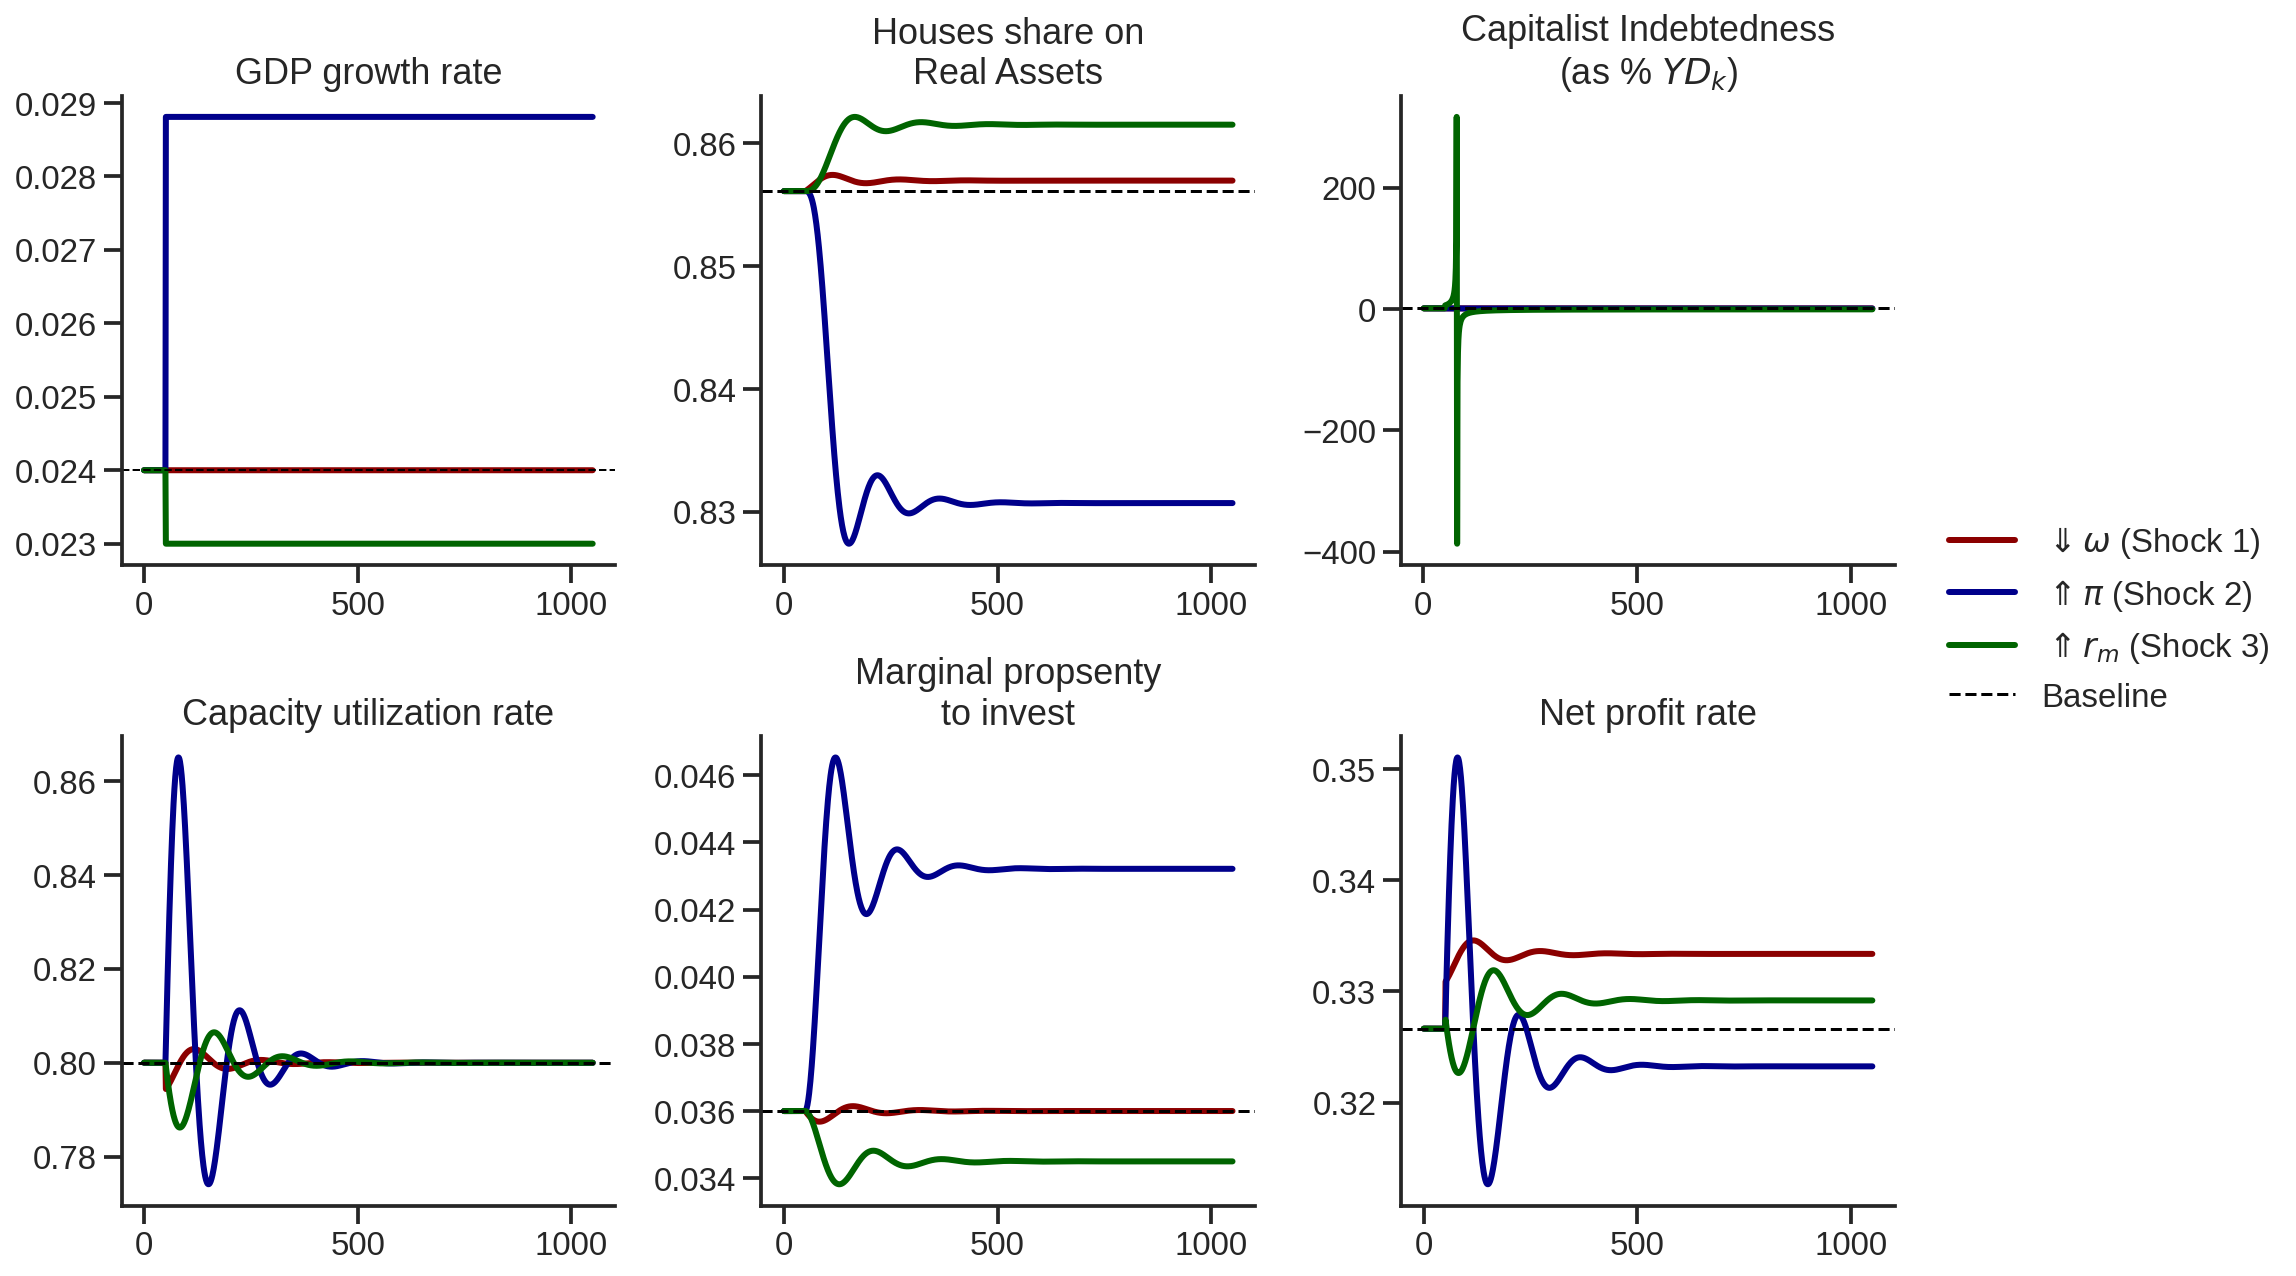

In [19]:
fig, ax = plt.subplots(2,3, figsize=(16,10))

df1['g_Z'].plot(ls ='-', lw=3, color = "darkred", label = "$\\Downarrow \omega$ (Shock 1)", ax = ax[0,0])
df2['g_Z'].plot(ls ='-', lw=3, color = "darkblue", label = "$\\Uparrow \pi$ (Shock 2)", ax = ax[0,0])
df3['g_Z'].plot(ls ='-', lw=3, color = "darkgreen", label = "$\\Uparrow r_m$ (Shock 3)", ax = ax[0,0])
ax[0,0].axhline(y = df_base['g_Z'].iloc[-1], ls ='--', lw=1, color = "black", label = "Baseline")
ax[0,0].ticklabel_format(useOffset=False)
ax[0,0].set_title('GDP growth rate')

df1['K_k'].plot(ls ='-', lw=3, color = "darkred", label = "$\\Downarrow \omega$ (Shock 1)", ax = ax[0,1])
df2['K_k'].plot(ls ='-', lw=3, color = "darkblue", label = "$\\Uparrow \pi$ (Shock 2)", ax = ax[0,1])
df3['K_k'].plot(ls ='-', lw=3, color = "darkgreen", label = "$\\Uparrow r_m$ (Shock 3)", ax = ax[0,1])
ax[0,1].axhline(y = df_base['K_k'].iloc[-1], ls ='--', lw=1.5, color = "black", label = "Baseline")
ax[0,1].ticklabel_format(useOffset=False)
ax[0,1].set_title('Houses share on\nReal Assets')

df1['u'].plot(ls ='-', lw=3, color = "darkred", label = "$\\Downarrow \omega$ (Shock 3)", ax = ax[1,0])
df2['u'].plot(ls ='-', lw=3, color = "darkblue", label = "$\\Uparrow \pi$ (Shock 2)", ax = ax[1,0])
df3['u'].plot(ls ='-', lw=3, color = "darkgreen", label = "$\\Uparrow r_m$ (Shock 4)", ax = ax[1,0])
ax[1,0].axhline(y = df_base['u'].iloc[-1], ls ='--', lw=1.5, color = "black", label = "Baseline")
ax[1,0].ticklabel_format(useOffset=False)
ax[1,0].set_title('Capacity utilization rate')

df1['h'].plot(ls ='-', lw=3, color = "darkred", label = "$\\Downarrow \omega$ (Shock 1)", ax = ax[1,1])
df2['h'].plot(ls ='-', lw=3, color = "darkblue", label = "$\\Uparrow \pi$ (Shock 2)", ax = ax[1,1])
df3['h'].plot(ls ='-', lw=3, color = "darkgreen", label = "$\\Uparrow r_m$ (Shock 3)", ax = ax[1,1])
ax[1,1].axhline(y = df_base['h'].iloc[-1], ls ='--', lw=1.5, color = "black", label = "Baseline")
ax[1,1].ticklabel_format(useOffset=False)
ax[1,1].set_title('Marginal propsenty\nto invest')

((df1["MO"]*df1["rmo"][1:] + df1["Lk"]*df1["rl"][1:])/df1['YDk'][1:]).plot(ls ='-', lw=3, color = "darkred", label = "$\\Downarrow \omega$ (Shock 1)", ax = ax[0,2])
((df2["MO"]*df2["rmo"][1:] + df2["Lk"]*df2["rl"][1:])/df2['YDk'][1:]).plot(ls ='-', lw=3, color = "darkblue", label = "$\\Uparrow \pi$ (Shock 2)", ax = ax[0,2])
((df3["MO"]*df3["rmo"][1:] + df3["Lk"]*df3["rl"][1:])/df3['YDk'][1:]).plot(ls ='-', lw=3, color = "darkgreen", label = "$\\Uparrow r_m$ (Shock 3)", ax = ax[0,2])
ax[0,2].axhline(y = ((df_base["MO"].iloc[-2]*df_base["rmo"].iloc[-1] + df_base["Lk"].iloc[-2]*df_base["rl"].iloc[-1])/df_base['YDk'].iloc[-1]), ls ='--', lw=1.5, color = "black", label = "Baseline")
ax[0,2].ticklabel_format(useOffset=False)
ax[0,2].set_title('Capitalist Indebtedness\n(as % $YD_k$)')

(df1['Fn']/df1['K_f']).plot(ls ='-', lw=3, color = "darkred", label = "$\\Downarrow \omega$ (Shock 1)", ax = ax[1,2])
(df2['Fn']/df2['K_f']).plot(ls ='-', lw=3, color = "darkblue", label = "$\\Uparrow \pi$ (Shock 2)", ax = ax[1,2])
(df3['Fn']/df3['K_f']).plot(ls ='-', lw=3, color = "darkgreen", label = "$\\Uparrow r_m$ (Shock 3)", ax = ax[1,2])
ax[1,2].axhline(y = (df_base['Fn']/df_base['K_f']).iloc[-1], ls ='--', lw=1.5, color = "black", label = "Baseline")
ax[1,2].ticklabel_format(useOffset=False)
ax[1,2].set_title('Net profit rate')


sns.despine()
plt.tight_layout(rect=[0, 0.03, .85, 0.95])
ax[1,2].legend(loc='center left', bbox_to_anchor=(1.05, 1.25))
plt.show()
fig.savefig("../figs/Shocks.svg", dpi = 600)

# Dag

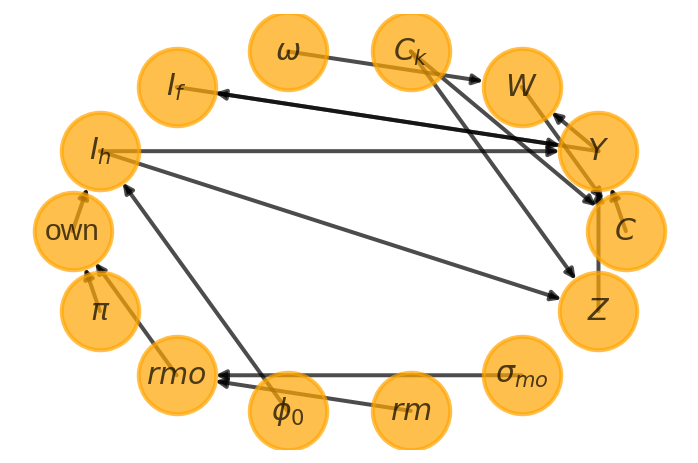

In [20]:
df = pd.DataFrame(
    {
        'Determined' : [
            '$Y$', # 1
            #'$Y$', # 2
            '$C$','$C$', # 3
            '$W$', # 5
            '$Y$', # 7
            '$Y$', # 8
            '$I_h$', # 9
            'own', # 10
            'own', # 11
            '$I_f$', # 12
            '$I_h$', # 13
            '$rmo$', # 14
            '$rmo$', # 15,
            '$W$', # 16,
            '$Z$',
            '$Z$', 
            '$Y$',
        ], 
        'Determines' : [
            '$C$',  # 1
            #'$It$', # 2
            '$W$', '$C_k$', # 3
            '$\omega$', # 5
            '$I_f$', # 7
            '$I_h$', # 8
            'own', # 9
            '$\pi$', # 10
            '$rmo$', # 11
            '$Y$', # 12,
            '$\phi_0$', # 13
            '$rm$', # 14
            '$\sigma_{mo}$', # 15
            '$Y$', # 16
            '$C_k$',
            "$I_h$",
            '$Z$',
        ]
}
)
 
# Build your graph
G=nx.from_pandas_edgelist(
    df, 
    'Determines', 
    'Determined', 
    create_using=nx.DiGraph() # To use with arrows
)
 
    
fig, ax = plt.subplots()
    
# Plot it
nx.draw(
    G, 
    with_labels=True, 
    node_color='orange', 
    node_size=1500, 
    edge_color='black', 
    linewidths=2,
    width=2,
    arrows=True,
    font_size=15,
    alpha=.7, 
    ax = ax,
    #pos=nx.spring_layout(G),
    #pos=nx.fruchterman_reingold_layout(G),
    pos=nx.shell_layout(G),
)

plt.show()
fig.savefig('../figs/Dag.svg', dpi = 600)